In [29]:
import numpy as np
import pandas as pd
import scipy.io as mat
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import seaborn as sns


# .................................................reading files......................................................

In [30]:
def load_cat_mat_modif(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns it as a pandas DataFrame.

    Parameters:
        file_path (str): The path to the .mat file.

    Returns:
        df (pd.DataFrame): DataFrame containing the catalog with labeled columns.
    """
    # Load the .mat file
    mat_data = mat.loadmat(file_path)
    
    # Extract catalog data and labels
    catalog = mat_data['Catalog']
    labels = [entry[0][0] for entry in mat_data['CatalogInfo']]
    
    # Print basic info
#     print(f"Catalog shape: {catalog.shape}")  # (11, N) shape expected
#     print(f"Labels: {labels}")
    
    # Convert to DataFrame and transpose to get events as rows
    df = pd.DataFrame(catalog.T, columns=labels)
#     print(df.head())
    cat = df['magnitude'].values
    
    
    
    return cat

In [3]:
cat_mag1_mdl1_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof")
cat_mag1_mdl2_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof")
cat_mag1_mdl3_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof")
cat_mag1_mdl4_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof")
cat_mag1_mdl5_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof")
cat_mag1_mdl6_2cut= load_cat_mat_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof")

In [31]:
def load_cat_mat_RA_modif(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns it as a pandas DataFrame.

    Parameters:
        file_path (str): The path to the .mat file.

    Returns:
        df (pd.DataFrame): DataFrame containing the catalog with labeled columns.
    """
    # Load the .mat file
    mat_data = mat.loadmat(file_path)
    
    # Extract catalog data and labels
    catalog = mat_data['Catalog']
    labels = [entry[0][0] for entry in mat_data['CatalogInfo']]
    
    # Print basic info
#     print(f"Catalog shape: {catalog.shape}")  # (11, N) shape expected
#     print(f"Labels: {labels}")
    
    # Convert to DataFrame and transpose to get events as rows
    df = pd.DataFrame(catalog.T, columns=labels)
#     print(df.head())
    cat = df['rupture area'].values
    
    
    
    return cat

In [5]:
cat_RA1_mdl1_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof")
cat_RA1_mdl2_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof")
cat_RA1_mdl3_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof")
cat_RA1_mdl4_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof")
cat_RA1_mdl5_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof")
cat_RA1_mdl6_2cut= load_cat_mat_RA_modif("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof")

In [32]:
def load_cat_mat_time_mag(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns a DataFrame with 'time' and 'magnitude' columns.

    Parameters:
        file_path (str): Path to the .mat file.

    Returns:
        df (pd.DataFrame): Catalog with time and magnitude columns.
    """
    mat_data = mat.loadmat(file_path)
    catalog = mat_data['Catalog']
    labels = [entry[0][0] for entry in mat_data['CatalogInfo']]
    
    df = pd.DataFrame(catalog.T, columns=labels)
    
    cat = df[['time', 'magnitude']]
    
    return cat 

In [7]:
cat_magtme1_mdl1= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof")
cat_magtme1_mdl2= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof")
cat_magtme1_mdl3= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof")
cat_magtme1_mdl4= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof")
cat_magtme1_mdl5= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof")
cat_magtme1_mdl6= load_cat_mat_time_mag("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof")

# ........................................functions..................................................

In [33]:
#########with magnitude filter################
def RAvsM_fltrd(magnitudes, rupture_areas, color, label):
    
    mask = magnitudes >= 5.4
    magnitudes = magnitudes[mask]
    rupture_areas = rupture_areas[mask]
    
    
    plt.scatter(magnitudes, rupture_areas, color=color, alpha=0.6, edgecolor='k', label=f'{label}', zorder=2)

    # Fit line: log10(RA) = intercept + slope * M
    slope, intercept = np.polyfit(magnitudes, np.log10(rupture_areas), 1)

    # Print fitted equation
    print(f"{label} fitted relation: log10(A) = {intercept:.2f} + {slope:.2f} * M")

    # Generate fit line
#     x_fit = np.linspace(min(magnitudes), max(magnitudes), 100)
    y_fit = 10**(intercept + slope * magnitudes)
    plt.plot(magnitudes, y_fit, color=color, linestyle='--', label=f'{label} fit', zorder=6)

    # Plot Wells & Coppersmith (1994) empirical lines
#     wc_all = 10**(-3.49 + 0.91 * magnitudes)
#     wc_ss  = 10**(-3.42 + 0.90 * magnitudes)

    Thinbjm_2017 = 10**(-3.49 + 0.90 * magnitudes)
    
#     log10_RA_empirical_all = -3.49 + 0.91 * magnitudes
#     log10_RA_empirical_ss = -3.42 + 0.90 * magnitudes
    log10_RA_empirical_Thinbjm = -3.49 + 0.90 * magnitudes
#     residuals_all = np.log10(rupture_areas) - log10_RA_empirical_all
#     residuals_ss = np.log10(rupture_areas) - log10_RA_empirical_ss
    residuals_Thinbjm = np.log10(rupture_areas) - log10_RA_empirical_Thinbjm

# Print summary stats
#     print(f"\nResiduals vs Wells & Coppersmith (1994):")
#     print(f"All fault types: mean = {np.mean(residuals_all):.2f}, std = {np.std(residuals_all):.2f}")
#     print(f"Strike-slip    : mean = {np.mean(residuals_ss):.2f}, std = {np.std(residuals_ss):.2f}")
#     print("Individual residuals (log10(RA_obs) - log10(RA_pred_all)):")

    print(f"\nResiduals vs Thingbaijam et al. (2017):")
    print(f"Strike-slip    : mean = {np.mean(residuals_Thinbjm):.2f}, std = {np.std(residuals_Thinbjm):.2f}")
    
    
    

#     plt.plot(magnitudes, wc_all, 'k-', label='W&C (1994) - All faults', zorder=3)
#     plt.plot(magnitudes, wc_ss, 'k:', label='W&C (1994) - Strike-slip', zorder=4)

    # Axis labels
    plt.xlabel("Magnitude", fontsize=12)
    plt.ylabel("Rupture Area (km²)", fontsize=12)
    plt.yscale("log")
    plt.grid(True, which="both", linestyle="--")
    plt.legend()


In [9]:
######with empirical lines#########
def RAvsM2(magnitudes, rupture_areas, color, label):
    # Plot data points
    plt.scatter(magnitudes, rupture_areas, color=color, alpha=0.6, edgecolor='k', label=f'{label}', zorder=2)

    # Fit line: log10(RA) = intercept + slope * M
    slope, intercept = np.polyfit(magnitudes, np.log10(rupture_areas), 1)

    # Print fitted equation
    print(f"{label} fitted relation: log10(A) = {intercept:.2f} + {slope:.2f} * M")

    # Generate fit line
#     x_fit = np.linspace(min(magnitudes), max(magnitudes), 100)
    y_fit = 10**(intercept + slope * magnitudes)
    plt.plot(magnitudes, y_fit, color=color, linestyle='--', label=f'{label} fit', zorder=6)

    # Plot Wells & Coppersmith (1994) empirical lines
#     wc_all = 10**(-3.49 + 0.91 * magnitudes)
#     wc_ss  = 10**(-3.42 + 0.90 * magnitudes)

    Thinbjm_2017 = 10**(-3.49 + 0.90 * magnitudes)
    
#     log10_RA_empirical_all = -3.49 + 0.91 * magnitudes
#     log10_RA_empirical_ss = -3.42 + 0.90 * magnitudes
    log10_RA_empirical_Thinbjm = -3.49 + 0.90 * magnitudes
#     residuals_all = np.log10(rupture_areas) - log10_RA_empirical_all
#     residuals_ss = np.log10(rupture_areas) - log10_RA_empirical_ss
    residuals_Thinbjm = np.log10(rupture_areas) - log10_RA_empirical_Thinbjm

# Print summary stats
#     print(f"\nResiduals vs Wells & Coppersmith (1994):")
#     print(f"All fault types: mean = {np.mean(residuals_all):.2f}, std = {np.std(residuals_all):.2f}")
#     print(f"Strike-slip    : mean = {np.mean(residuals_ss):.2f}, std = {np.std(residuals_ss):.2f}")
#     print("Individual residuals (log10(RA_obs) - log10(RA_pred_all)):")

    print(f"\nResiduals vs Thingbaijam et al. (2017):")
    print(f"Strike-slip    : mean = {np.mean(residuals_Thinbjm):.2f}, std = {np.std(residuals_Thinbjm):.2f}")
    
    
    

#     plt.plot(magnitudes, wc_all, 'k-', label='W&C (1994) - All faults', zorder=3)
#     plt.plot(magnitudes, wc_ss, 'k:', label='W&C (1994) - Strike-slip', zorder=4)

    # Axis labels
    plt.xlabel("Magnitude", fontsize=12)
    plt.ylabel("Rupture Area (km²)", fontsize=12)
    plt.yscale("log")
    plt.grid(True, which="both", linestyle="--")
    plt.legend()


In [34]:
###### for subplots ######

def RAvsM3(magnitudes, rupture_areas, color, label, ax):
    # Plot data points
    ax.scatter(magnitudes, rupture_areas, color=color, alpha=0.6, edgecolor='k', label=f'{label}', zorder=2)

    # Fit line: log10(RA) = intercept + slope * M
    slope, intercept = np.polyfit(magnitudes, np.log10(rupture_areas), 1)
    print(f"{label} fitted relation: log10(RA) = {intercept:.2f} + {slope:.2f} * M")

    # Fitted line
    y_fit = 10**(intercept + slope * magnitudes)
    ax.plot(magnitudes, y_fit, color=color, linestyle='--', label=f'{label} fit', zorder=6)

    # Residuals vs Thingbaijam (2017)
    log10_RA_empirical = -3.49 + 0.90 * magnitudes
    residuals = np.log10(rupture_areas) - log10_RA_empirical
    print(f"\nResiduals vs Thingbaijam et al. (2017) for {label}:")
    print(f"Mean = {np.mean(residuals):.2f}, Std = {np.std(residuals):.2f}")

    # Axis formatting (optional, leave to main script if repeating)
    ax.set_yscale("log")
    ax.grid(True, which="both", linestyle="--")
    ax.set_ylabel("Rupture Area (km²)", fontsize=11)
    ax.legend(loc='upper left', fontsize=9)

In [35]:
def process_catalog2(magnitudes, color, label, bin_width=0.1):
    # Bin the magnitudes (e.g., round to nearest 0.1)
    binned_mags = np.round(magnitudes / bin_width) * bin_width

    # Define bin edges based on min/max
    min_mag = np.floor(np.min(binned_mags))
    max_mag = np.ceil(np.max(binned_mags))
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    # Compute histogram
    incremental_freq, edges = np.histogram(binned_mags, bins=bins)
    bin_centers = edges[:-1] + bin_width / 2

    # Compute cumulative frequencies
    cumulative_freq = np.cumsum(incremental_freq[::-1])[::-1]  # N(M ≥ m)

    # Estimate Mc as the magnitude bin with the highest incremental count (max curvature method)
    Mc_index = np.argmax(incremental_freq)
    Mc = bin_centers[Mc_index]

    # Filter data for M ≥ Mc
    mags_above_mc = bin_centers[bin_centers >= Mc]
    cumulative_above_mc = cumulative_freq[bin_centers >= Mc]

    # Perform linear regression on log10(cumulative frequency) vs. magnitude
    valid = cumulative_above_mc > 0
    mags_above_mc = mags_above_mc[valid]
    cumulative_above_mc = cumulative_above_mc[valid]
    
    log_cumulative_freq = np.log10(cumulative_above_mc)
    slope, intercept, r_value, p_value, std_err = stats.linregress(mags_above_mc, log_cumulative_freq)

    # Compute b-value
    b_value_ls = -slope

    # Fitted line
#     fitted_log_cumulative_freq = intercept + slope * mags_above_mc
#     fitted_cumulative_freq = 10**fitted_log_cumulative_freq

    # Plot full cumulative distribution
#     plt.plot(bin_centers, cumulative_freq, linestyle="--", marker="o", color=color,
#              label=f"{label} (b = {b_value_ls:.2f}, Mc = {Mc:.2f})")
    plt.plot(bin_centers, cumulative_freq, linestyle="--", marker="o", color=color,
              label=f"{label}, b = {b_value_ls:.2f}")
    
    plt.axvline(x=Mc, color=color, linestyle="--", linewidth=1.5, label=f"Mc = {Mc:.2f}")
    

    # Plot fitted line (only for M ≥ Mc)
#     plt.plot(mags_above_mc, fitted_cumulative_freq, linestyle="-", color=color)

    print(f"{label}: Estimated b-value = {b_value_ls:.2f}, Mc = {Mc:.2f}")
    print(f"{label} Gutenberg–Richter relation:")
    print(f"  log10(N) = {intercept:.2f} - {b_value_ls:.2f} * M")

In [12]:
def process_catalog3(magnitudes, color, label, bin_width=0.1, show_mc_legend=False):
    # Bin the magnitudes (e.g., round to nearest 0.1)
    binned_mags = np.round(magnitudes / bin_width) * bin_width

    # Define bin edges based on min/max
    min_mag = np.floor(np.min(binned_mags))
    max_mag = np.ceil(np.max(binned_mags))
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    # Compute histogram
    incremental_freq, edges = np.histogram(binned_mags, bins=bins)
    bin_centers = edges[:-1] + bin_width / 2

    # Compute cumulative frequencies
    cumulative_freq = np.cumsum(incremental_freq[::-1])[::-1]  # N(M ≥ m)

    # Estimate Mc as the magnitude bin with the highest incremental count (max curvature method)
    Mc_index = np.argmax(incremental_freq)
    Mc = bin_centers[Mc_index]

    # Filter data for M ≥ Mc
    mags_above_mc = bin_centers[bin_centers >= Mc]
    cumulative_above_mc = cumulative_freq[bin_centers >= Mc]

    # Perform linear regression on log10(cumulative frequency) vs. magnitude
    valid = cumulative_above_mc > 0
    mags_above_mc = mags_above_mc[valid]
    cumulative_above_mc = cumulative_above_mc[valid]
    
    log_cumulative_freq = np.log10(cumulative_above_mc)
    slope, intercept, r_value, p_value, std_err = stats.linregress(mags_above_mc, log_cumulative_freq)

    # Compute b-value
    b_value_ls = -slope

    # Fitted line
#     fitted_log_cumulative_freq = intercept + slope * mags_above_mc
#     fitted_cumulative_freq = 10**fitted_log_cumulative_freq

    # Plot full cumulative distribution
    plt.plot(bin_centers, cumulative_freq, linestyle="--", marker="o", color=color,
             label=f"{label}, b = {b_value_ls:.2f}")
    
    if show_mc_legend:
        plt.axvline(x=Mc, color='black', linestyle='--', linewidth=1.5, label=f"Mc = {Mc:.2f}", zorder=0)
    else:
        plt.axvline(x=Mc, color='black', linestyle='--', linewidth=1.5, zorder=0)
    

    # Plot fitted line (only for M ≥ Mc)
#     plt.plot(mags_above_mc, fitted_cumulative_freq, linestyle="-", color=color)

    print(f"{label}: Estimated b-value = {b_value_ls:.2f}, Mc = {Mc:.2f}")
    print(f"{label} Gutenberg–Richter relation:")
    print(f"  log10(N) = {intercept:.2f} - {b_value_ls:.2f} * M")

In [36]:
def process_catalog4(magnitudes, color, label, bin_width=0.1, ax=None):
    # Bin the magnitudes (e.g., round to nearest 0.1)
    binned_mags = np.round(magnitudes / bin_width) * bin_width

    # Define bin edges based on min/max
    min_mag = np.floor(np.min(binned_mags))
    max_mag = np.ceil(np.max(binned_mags))
    bins = np.arange(min_mag, max_mag + bin_width, bin_width)

    # Compute histogram
    incremental_freq, edges = np.histogram(binned_mags, bins=bins)
    bin_centers = edges[:-1] + bin_width / 2

    # Compute cumulative frequencies
    cumulative_freq = np.cumsum(incremental_freq[::-1])[::-1]  # N(M ≥ m)

    # Estimate Mc as the magnitude bin with the highest incremental count (max curvature method)
    Mc_index = np.argmax(incremental_freq)
    Mc = bin_centers[Mc_index]

    # Filter data for M ≥ Mc
    mags_above_mc = bin_centers[bin_centers >= Mc]
    cumulative_above_mc = cumulative_freq[bin_centers >= Mc]

    # Perform linear regression on log10(cumulative frequency) vs. magnitude
    valid = cumulative_above_mc > 0
    mags_above_mc = mags_above_mc[valid]
    cumulative_above_mc = cumulative_above_mc[valid]
    
    log_cumulative_freq = np.log10(cumulative_above_mc)
    slope, intercept, r_value, p_value, std_err = stats.linregress(mags_above_mc, log_cumulative_freq)

    # Compute b-value
    b_value_ls = -slope

    # Fitted line
#     fitted_log_cumulative_freq = intercept + slope * mags_above_mc
#     fitted_cumulative_freq = 10**fitted_log_cumulative_freq

    # Plot full cumulative distribution
#     plt.plot(bin_centers, cumulative_freq, linestyle="--", marker="o", color=color,
#              label=f"{label} (b = {b_value_ls:.2f}, Mc = {Mc:.2f})")
    ax.plot(bin_centers, cumulative_freq, linestyle="--", marker="o", color=color,
              label=f"{label}, b = {b_value_ls:.2f}")
    
    ax.axvline(x=Mc, color=color, linestyle="--", linewidth=1.5, label=f"Mc = {Mc:.2f}")
    

    # Plot fitted line (only for M ≥ Mc)
#     plt.plot(mags_above_mc, fitted_cumulative_freq, linestyle="-", color=color)

    print(f"{label}: Estimated b-value = {b_value_ls:.2f}, Mc = {Mc:.2f}")
    print(f"{label} Gutenberg–Richter relation:")
    print(f"  log10(N) = {intercept:.2f} - {b_value_ls:.2f} * M")

In [37]:
def get_event_dots_discrete_colors(df, mag_min=7.0, mag_max=7.8, bin_width=0.1):
    """
    Groups events into 1000-year bins and assigns fixed color bins by magnitude.
    """
    filtered = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)].copy()

    # Time binning
    filtered['period'] = (filtered['time'] // 1000).astype(int)
    filtered['period_label'] = filtered['period'] * 1000

    # Y stacking for count per bin
    filtered['y_stack'] = filtered.groupby('period').cumcount() + 1

    # Assign discrete color group by magnitude range
    filtered['mag_bin'] = (np.floor(filtered['magnitude'] / bin_width) * bin_width).round(2)
    
    df_comp=filtered[['period_label', 'y_stack', 'mag_bin']]

    return df_comp

In [38]:
def get_event_dots_discrete_colors2(df, mag_min=7.0, mag_max=7.8, bin_width=0.1):
    """
    Groups events into 1000-year bins and assigns fixed color bins by magnitude.
    """
    filtered = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)].copy()

    # Time binning
    filtered['period'] = (filtered['time'] // 1000).astype(int)
    filtered['period_label'] = filtered['period'] * 1000

    # Assign discrete color group by magnitude range
    filtered['mag_bin'] = (np.floor(filtered['magnitude'] / bin_width) * bin_width).round(2)

    # 📌 Sort by period then magnitude
    filtered = filtered.sort_values(['period', 'mag_bin']).reset_index(drop=True)

    # Y stacking for count per bin (after sorting!)
    filtered['y_stack'] = filtered.groupby('period').cumcount() + 1

    df_comp = filtered[['period_label', 'y_stack', 'mag_bin']]
    
    return df_comp


In [39]:
####function to read the mat files####
def load_cat_mat(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns it as a pandas DataFrame.

    Parameters:
        file_path (str): The path to the .mat file.

    Returns:
        df (pd.DataFrame): DataFrame containing the catalog with labeled columns.
    """
    # Load the .mat file
    mat_data = mat.loadmat(file_path)
    
    # Extract catalog data and labels
    catalog = mat_data['TheCatalog']
    labels = [entry[0][0] for entry in mat_data['whatiswhat']]
    
    # Print basic info
#     print(f"Catalog shape: {catalog.shape}")  # (11, N) shape expected
#     print(f"Labels: {labels}")
    
    # Convert to DataFrame and transpose to get events as rows
    df = pd.DataFrame(catalog.T, columns=labels)
#     print(df.head())
    cat = df['magnitude'].values
    # Show preview
    
    
    return cat

In [40]:
def load_cat_mat_RA(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns it as a pandas DataFrame.

    Parameters:
        file_path (str): The path to the .mat file.

    Returns:
        df (pd.DataFrame): DataFrame containing the catalog with labeled columns.
    """
    # Load the .mat file
    mat_data = mat.loadmat(file_path)
    
    # Extract catalog data and labels
    catalog = mat_data['TheCatalog']
    labels = [entry[0][0] for entry in mat_data['whatiswhat']]
    
    # Print basic info
#     print(f"Catalog shape: {catalog.shape}")  # (11, N) shape expected
#     print(f"Labels: {labels}")
    
    # Convert to DataFrame and transpose to get events as rows
    df = pd.DataFrame(catalog.T, columns=labels)
#     print(df.head())
    cat = df['rupture area'].values
    # Show preview
    
    
    return cat

In [ ]:



cat_mag1_mdl6= load_cat_mat("C:/Users/saram/MCQsim cat anlyss/fnl1_mdl6.mat")
cat_RA1_mdl6= load_cat_mat_RA("C:/Users/saram/MCQsim cat anlyss/fnl1_mdl6.mat")

# ........................................results..................................................

# <<<<<<<<<<<<<<<<<<for full cat with 0.2 slip cut>>>>>>>>>>>>>>>>>>>>>

Geometry 1: Estimated b-value = 0.95, Mc = 3.45
Geometry 1 Gutenberg–Richter relation:
  log10(N) = 8.87 - 0.95 * M
Geometry 2: Estimated b-value = 0.93, Mc = 3.45
Geometry 2 Gutenberg–Richter relation:
  log10(N) = 8.76 - 0.93 * M
Geometry 3: Estimated b-value = 0.92, Mc = 3.45
Geometry 3 Gutenberg–Richter relation:
  log10(N) = 8.65 - 0.92 * M
Geometry 6: Estimated b-value = 0.88, Mc = 3.85
Geometry 6 Gutenberg–Richter relation:
  log10(N) = 8.75 - 0.88 * M


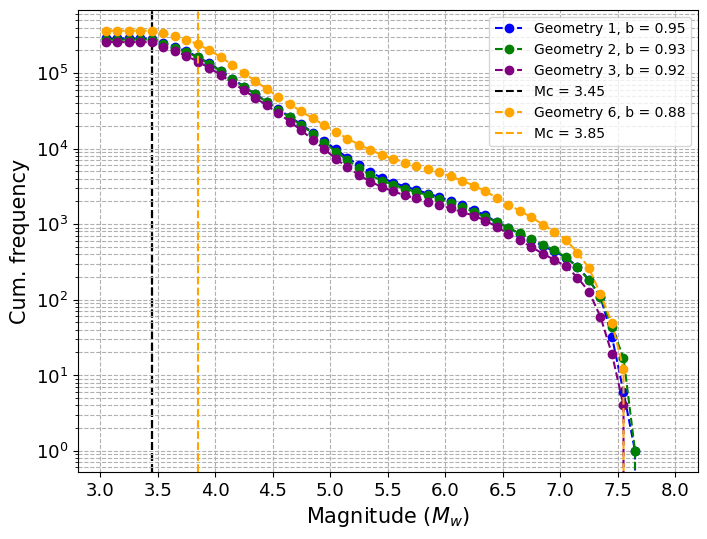

In [86]:
plt.figure(figsize=(8, 6))

# Process each catalog with distinct colors
fmd_g1= process_catalog3(cat_mag1_mdl1_2cut, color='blue', label='Geometry 1', bin_width=0.1)
fmd_g2= process_catalog3(cat_mag1_mdl2_2cut, color='green', label='Geometry 2', bin_width=0.1)
fmd_g3= process_catalog3(cat_mag1_mdl3_2cut, color='purple', label='Geometry 3', bin_width=0.1, show_mc_legend=True)
# fmd_g4= process_catalog3(cat_mag1_mdl4_2cut, color='orange', label='geometry 4', bin_width=0.1)
# fmd_g5= process_catalog3(cat_mag1_mdl5_2cut, color='brown', label='geometry 5', bin_width=0.1)
fmd_g6= process_catalog2(cat_mag1_mdl6_2cut, color='orange', label='Geometry 6', bin_width=0.1)


plt.xlabel("Magnitude ($M_{w}$)", fontsize=15)
plt.ylabel("Cum. frequency", fontsize=15)
plt.xticks(np.arange(3, 8.5, 0.5), fontsize=13) 
plt.yticks(fontsize=13)
plt.yscale("log")
plt.grid(True, which="both", linestyle="--")
# plt.title("model1")
plt.legend(loc="best")
plt.show()

geometry 1: Estimated b-value = 0.95, Mc = 3.45
geometry 1 Gutenberg–Richter relation:
  log10(N) = 8.87 - 0.95 * M
geometry 2: Estimated b-value = 0.93, Mc = 3.45
geometry 2 Gutenberg–Richter relation:
  log10(N) = 8.76 - 0.93 * M
geometry 3: Estimated b-value = 0.92, Mc = 3.45
geometry 3 Gutenberg–Richter relation:
  log10(N) = 8.65 - 0.92 * M
geometry 4: Estimated b-value = 1.00, Mc = 3.45
geometry 4 Gutenberg–Richter relation:
  log10(N) = 8.61 - 1.00 * M
geometry 5: Estimated b-value = 0.95, Mc = 3.45
geometry 5 Gutenberg–Richter relation:
  log10(N) = 8.72 - 0.95 * M
geometry 6: Estimated b-value = 0.88, Mc = 3.85
geometry 6 Gutenberg–Richter relation:
  log10(N) = 8.75 - 0.88 * M


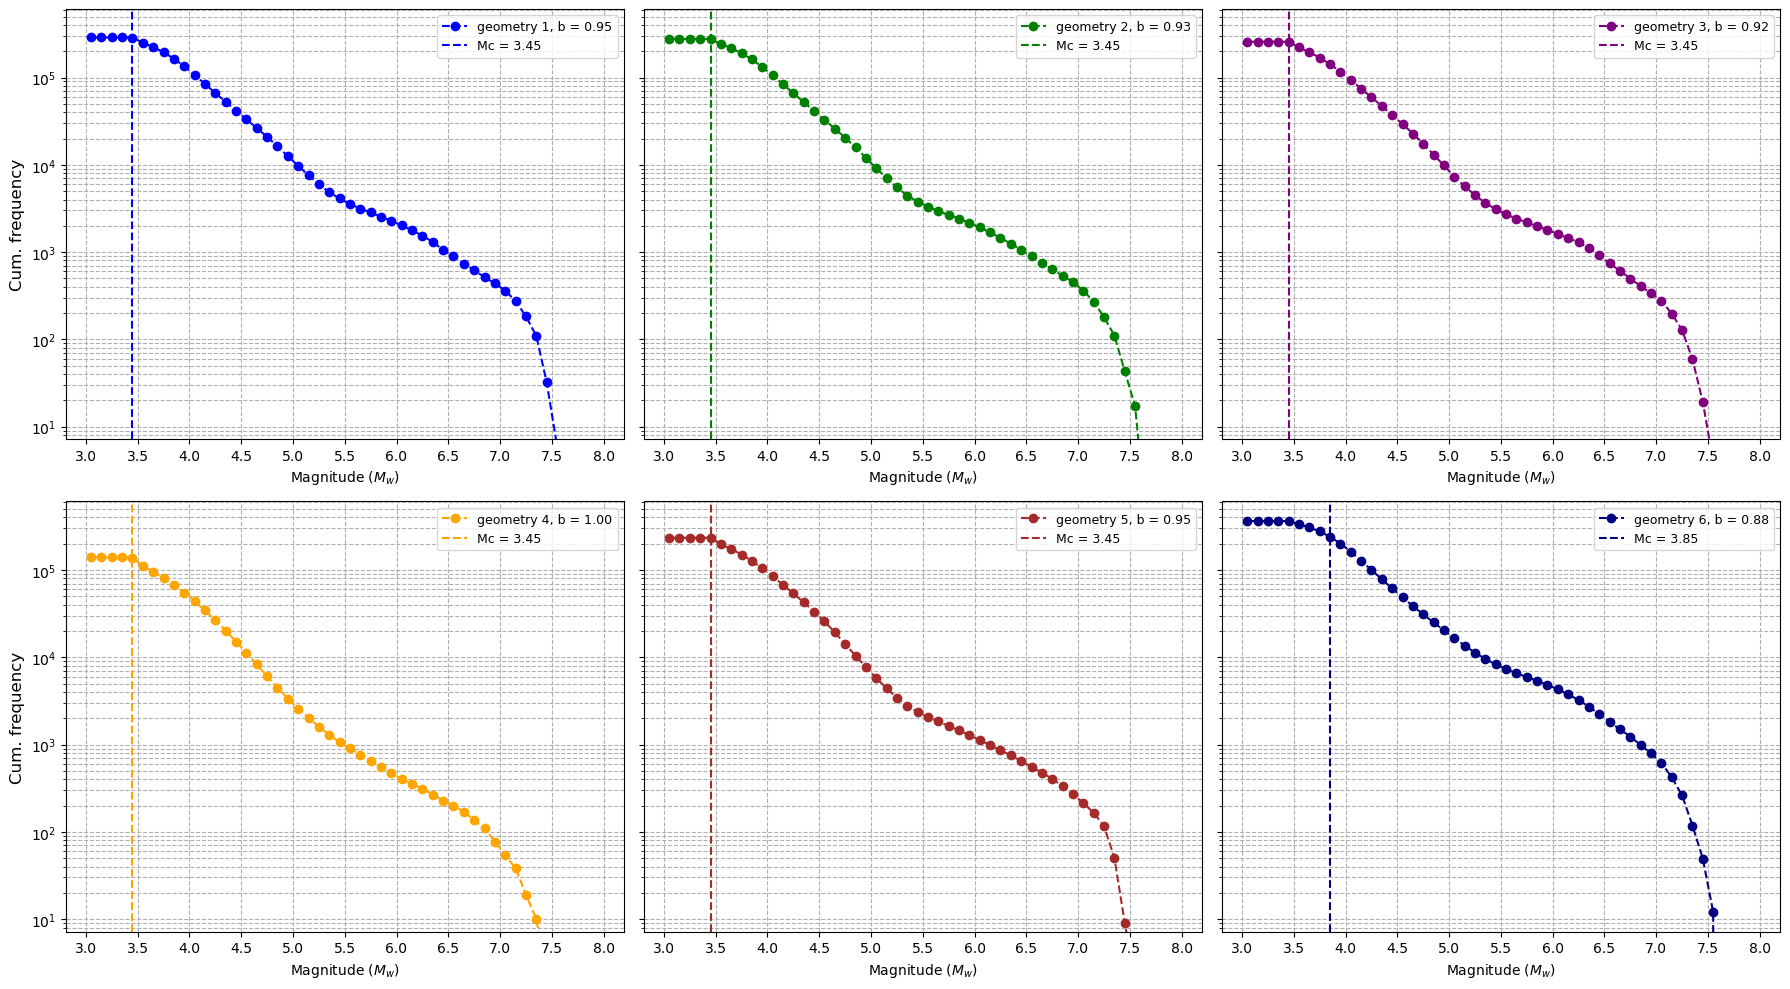

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

# One call per axis
process_catalog4(cat_mag1_mdl1_2cut, color='blue', label='geometry 1', bin_width=0.1, ax=axes[0])
process_catalog4(cat_mag1_mdl2_2cut, color='green', label='geometry 2', bin_width=0.1, ax=axes[1])
process_catalog4(cat_mag1_mdl3_2cut, color='purple', label='geometry 3', bin_width=0.1, ax=axes[2])
process_catalog4(cat_mag1_mdl4_2cut, color='orange', label='geometry 4', bin_width=0.1, ax=axes[3])
process_catalog4(cat_mag1_mdl5_2cut, color='brown', label='geometry 5', bin_width=0.1, ax=axes[4])
process_catalog4(cat_mag1_mdl6_2cut, color='navy', label='geometry 6', bin_width=0.1, ax=axes[5])

# Shared settings
for ax in axes:
    ax.set_xlabel("Magnitude ($M_{w}$)", fontsize=10)
    ax.set_yscale("log")
    ax.set_xticks(np.arange(3, 8.5, 0.5))
    ax.grid(True, which="both", linestyle="--")
    ax.legend(fontsize=9)

axes[0].set_ylabel("Cum. frequency", fontsize=12)
axes[3].set_ylabel("Cum. frequency", fontsize=12)

plt.tight_layout()
plt.show()

Geometry 1 fitted relation: log10(A) = -4.75 + 1.13 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.34, std = 0.18
Geometry 2 fitted relation: log10(A) = -4.72 + 1.12 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.33, std = 0.19
Geometry 3 fitted relation: log10(A) = -4.78 + 1.13 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.35, std = 0.19
Geometry 6 fitted relation: log10(A) = -4.57 + 1.09 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.28, std = 0.18


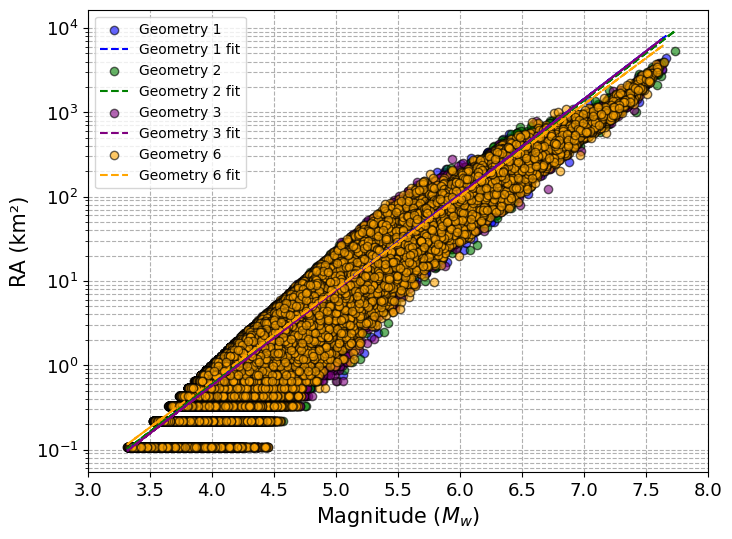

In [87]:
plt.figure(figsize=(8, 6))

RAvsM2(cat_mag1_mdl1_2cut, cat_RA1_mdl1_2cut, color='blue', label= 'Geometry 1')
RAvsM2(cat_mag1_mdl2_2cut, cat_RA1_mdl2_2cut, color='green', label='Geometry 2')
RAvsM2(cat_mag1_mdl3_2cut, cat_RA1_mdl3_2cut, color='purple', label='Geometry 3')
# RAvsM2(cat_mag1_mdl4_2cut, cat_RA1_mdl4_2cut, color='orange', label= 'geometry 4')
# RAvsM2(cat_mag1_mdl5_2cut, cat_RA1_mdl5_2cut, color='brown', label='geometry 5')
RAvsM2(cat_mag1_mdl6_2cut, cat_RA1_mdl6_2cut, color='orange', label='Geometry 6')

# mags_sorted = np.sort(cat_mag1_mdl2_2cut)
# RA_thingbaijam = 10**(-3.49 + 0.90 * mags_sorted)
# plt.plot(mags_sorted, RA_thingbaijam, color='red', linestyle='--', 
#          label='Thingbaijam et al. (2017)-SS\n$\\log_{10}(RA) = -3.49 + 0.90M$')


# RA_upper = 10**((-3.49 + 0.90 * mags_sorted) + 0.3)  # +1 std
# RA_lower = 10**((-3.49 + 0.90 * mags_sorted) - 0.3)  # -1 std
# plt.fill_between(mags_sorted, RA_lower, RA_upper, color='red', alpha=0.2, label='±1σ')


# Customize the plot
plt.xlabel('Magnitude ($M_{w}$)', fontsize=15)
plt.ylabel('RA (km²)', fontsize=15)
plt.xticks(np.arange(3, 8.5, 0.5), fontsize=13) 
plt.yticks(fontsize=13)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--')  # Grid behind data
# plt.title('model1')
plt.legend(loc='upper left')
plt.show()

geometry 1 fitted relation: log10(A) = -4.20 + 1.02 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = 0.02, std = 0.21
geometry 2 fitted relation: log10(A) = -4.27 + 1.03 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.00, std = 0.22
geometry 3 fitted relation: log10(A) = -4.22 + 1.02 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = 0.01, std = 0.22
geometry 4 fitted relation: log10(A) = -4.05 + 0.99 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.04, std = 0.20
geometry 5 fitted relation: log10(A) = -4.08 + 1.00 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = -0.00, std = 0.21
geometry 6 fitted relation: log10(A) = -4.13 + 1.01 * M

Residuals vs Thingbaijam et al. (2017):
Strike-slip    : mean = 0.01, std = 0.20


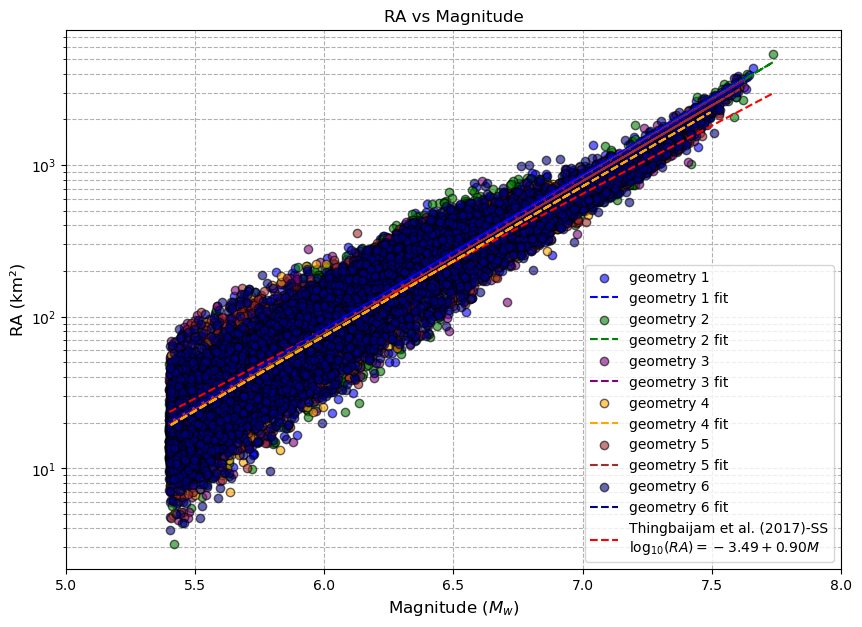

In [75]:
plt.figure(figsize=(10, 7))

RAvsM_fltrd(cat_mag1_mdl1_2cut, cat_RA1_mdl1_2cut, color='blue', label= 'geometry 1')
RAvsM_fltrd(cat_mag1_mdl2_2cut, cat_RA1_mdl2_2cut, color='green', label= 'geometry 2')
RAvsM_fltrd(cat_mag1_mdl3_2cut, cat_RA1_mdl3_2cut, color='purple', label='geometry 3')
RAvsM_fltrd(cat_mag1_mdl4_2cut, cat_RA1_mdl4_2cut, color='orange', label='geometry 4')
RAvsM_fltrd(cat_mag1_mdl5_2cut, cat_RA1_mdl5_2cut, color='brown', label='geometry 5')
RAvsM_fltrd(cat_mag1_mdl6_2cut, cat_RA1_mdl6_2cut, color='navy', label='geometry 6')


mask = cat_mag1_mdl2_2cut >= 5.4
filtered_mag1_mdl2 =cat_mag1_mdl2_2cut[mask]
mags_sorted = np.sort(filtered_mag1_mdl2)

# mags_sorted = np.sort(cat_mag_sd3)
RA_thingbaijam = 10**(-3.49 + 0.90 * mags_sorted)
plt.plot(mags_sorted, RA_thingbaijam, color='red', linestyle='--', 
         label='Thingbaijam et al. (2017)-SS\n$\\log_{10}(RA) = -3.49 + 0.90M$')


# RA_upper = 10**((-3.49 + 0.90 * mags_sorted) + 0.3)  # +1 std
# RA_lower = 10**((-3.49 + 0.90 * mags_sorted) - 0.3)  # -1 std
# plt.fill_between(mags_sorted, RA_lower, RA_upper, color='red', alpha=0.2, label='±1σ')


# Customize the plot
plt.xlabel('Magnitude ($M_{w}$)', fontsize=12)
plt.ylabel('RA (km²)', fontsize=12)
plt.xticks(np.arange(5, 8.5, 0.5)) 
plt.yscale('log')
plt.grid(True, which='both', linestyle='--')  # Grid behind data
plt.title('RA vs Magnitude')
plt.legend(loc='best')
plt.show()

geometry1 → Bin center: 5.55, Count: 442
geometry1 → Bin center: 5.64, Count: 326
geometry1 → Bin center: 5.74, Count: 307
geometry1 → Bin center: 5.84, Count: 261
geometry1 → Bin center: 5.93, Count: 251
geometry1 → Bin center: 6.03, Count: 267
geometry1 → Bin center: 6.12, Count: 221
geometry1 → Bin center: 6.22, Count: 211
geometry1 → Bin center: 6.31, Count: 245
geometry1 → Bin center: 6.41, Count: 214
geometry1 → Bin center: 6.51, Count: 168
geometry1 → Bin center: 6.60, Count: 149
geometry1 → Bin center: 6.70, Count: 113
geometry1 → Bin center: 6.79, Count: 101
geometry1 → Bin center: 6.89, Count: 78
geometry1 → Bin center: 6.99, Count: 72
geometry1 → Bin center: 7.08, Count: 85
geometry1 → Bin center: 7.18, Count: 81
geometry1 → Bin center: 7.27, Count: 80
geometry1 → Bin center: 7.37, Count: 77
geometry1 → Bin center: 7.46, Count: 40
geometry1 → Bin center: 7.56, Count: 6
geometry1 → Bin center: 7.66, Count: 3
geometry2 → Bin center: 5.55, Count: 381
geometry2 → Bin center: 5.6

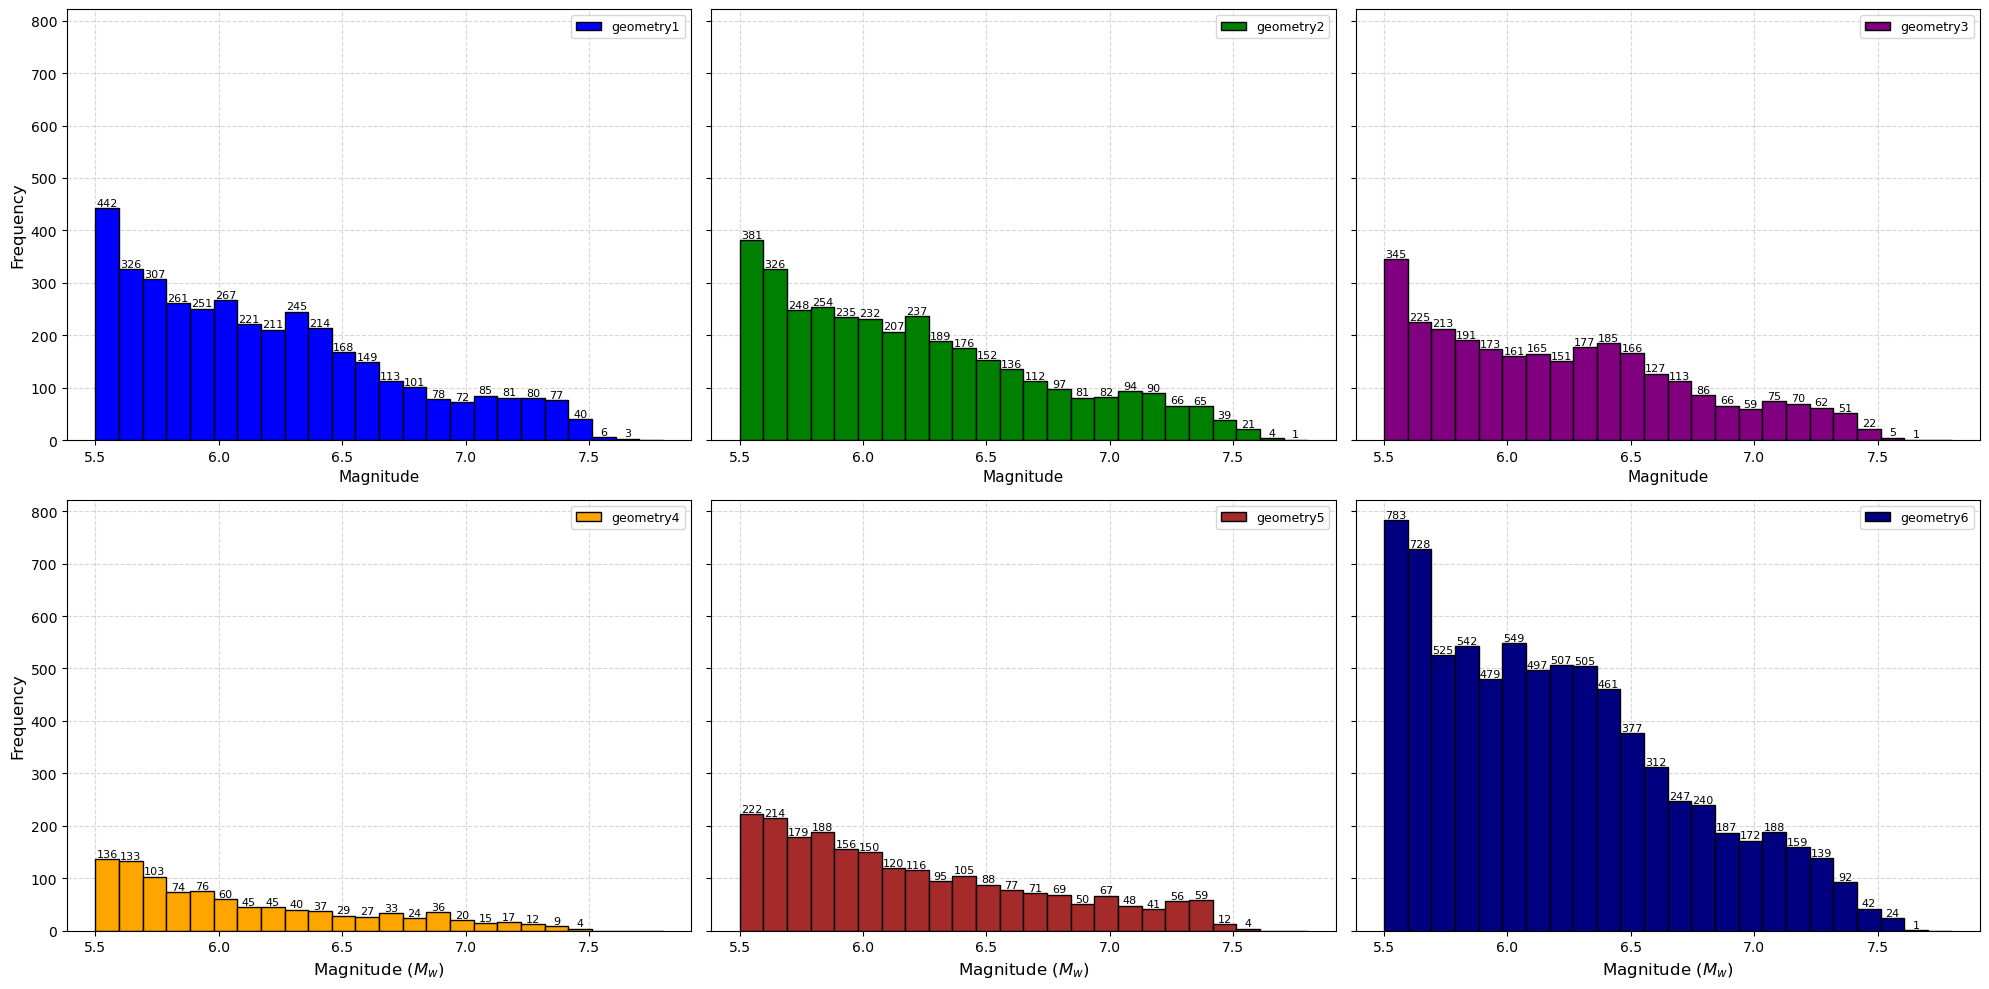

In [76]:
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs2 = [
    (cat_mag1_mdl1_2cut, 'geometry1', 'blue'),
    (cat_mag1_mdl2_2cut, 'geometry2', 'green'),
    (cat_mag1_mdl3_2cut, 'geometry3', 'purple'),
    (cat_mag1_mdl4_2cut, 'geometry4', 'orange'),
    (cat_mag1_mdl5_2cut, 'geometry5', 'brown'),
    (cat_mag1_mdl6_2cut, 'geometry6', 'navy')
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs2):
    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data, bins=bins, edgecolor='black', color=color, label=label)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars and print
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")
    

#     ax.set_title('model6', fontsize=12)
    ax.set_xlabel('Magnitude', fontsize=11)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', fontsize=9)

axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[-3].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


geometry1 → Bin center: 7.02, Count: 28
geometry1 → Bin center: 7.05, Count: 19
geometry1 → Bin center: 7.08, Count: 33
geometry1 → Bin center: 7.12, Count: 36
geometry1 → Bin center: 7.15, Count: 24
geometry1 → Bin center: 7.18, Count: 35
geometry1 → Bin center: 7.22, Count: 29
geometry1 → Bin center: 7.25, Count: 31
geometry1 → Bin center: 7.28, Count: 21
geometry1 → Bin center: 7.32, Count: 24
geometry1 → Bin center: 7.35, Count: 31
geometry1 → Bin center: 7.38, Count: 27
geometry1 → Bin center: 7.42, Count: 23
geometry1 → Bin center: 7.45, Count: 15
geometry1 → Bin center: 7.48, Count: 14
geometry1 → Bin center: 7.52, Count: 4
geometry1 → Bin center: 7.58, Count: 1
geometry1 → Bin center: 7.62, Count: 3
geometry1 → Bin center: 7.65, Count: 2
geometry2 → Bin center: 7.02, Count: 27
geometry2 → Bin center: 7.05, Count: 32
geometry2 → Bin center: 7.08, Count: 25
geometry2 → Bin center: 7.12, Count: 41
geometry2 → Bin center: 7.15, Count: 30
geometry2 → Bin center: 7.18, Count: 36
geom

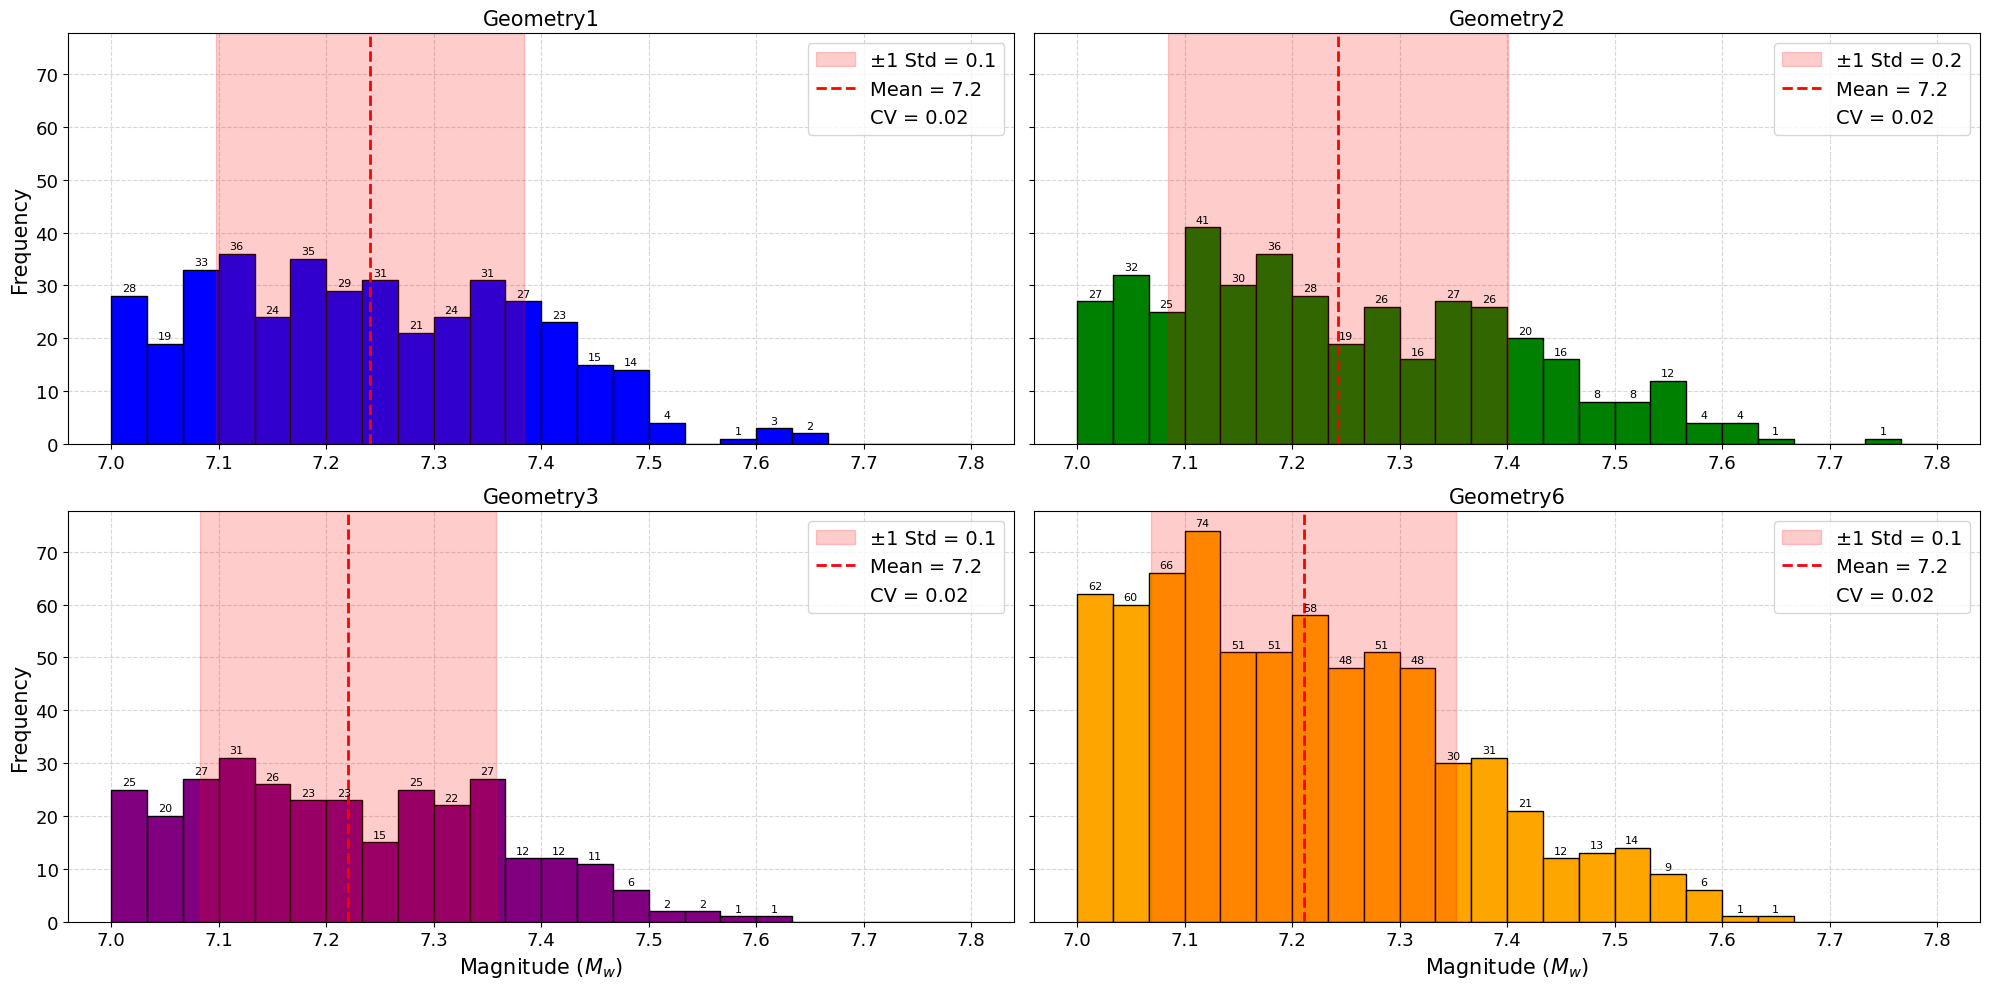

In [94]:
bin_min = 7
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs2 = [
    (cat_mag1_mdl1_2cut, 'geometry1', 'blue'),
    (cat_mag1_mdl2_2cut, 'geometry2', 'green'),
    (cat_mag1_mdl3_2cut, 'geometry3', 'purple'),
#     (cat_mag1_mdl4_2cut, 'geometry4', 'orange'),
#     (cat_mag1_mdl5_2cut, 'geometry5', 'brown'),
    (cat_mag1_mdl6_2cut, 'geometry6', 'orange')
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs2):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
    ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=14)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)

if len(catalogs2) < len(axes):
    for i in range(len(catalogs2), len(axes)):
        fig.delaxes(axes[i])
        
axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)
axes[2].set_ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.show()

In [11]:

catalog5555 = cat_mag1_mdl1_2cut

# Define magnitude range
mag_min = 5.5
mag_max = 7.8

# Filter catalog within magnitude range
filtered_data = catalog5555[(catalog5555 >= mag_min) & (catalog5555 <= mag_max)]

# Calculate statistics
mean_val = np.mean(filtered_data)
std_val = np.std(filtered_data)
cv_val = std_val / mean_val if mean_val != 0 else np.nan

# Print results
print("Filtered magnitude range:", f"{mag_min} ≤ Mw ≤ {mag_max}")
print(f"Number of events       : {len(filtered_data)}")
print(f"Mean magnitude         : {mean_val:.2f}")
print(f"Standard deviation     : {std_val:.2f}")
print(f"Coefficient of variation (CV): {cv_val:.2f}")


Filtered magnitude range: 5.5 ≤ Mw ≤ 7.8
Number of events       : 3798
Mean magnitude         : 6.19
Standard deviation     : 0.52
Coefficient of variation (CV): 0.08


In [29]:
cat_cntmags1_mdl1= get_event_dots_discrete_colors2(cat_magtme1_mdl1,  mag_min=7.3, mag_max=7.9)
cat_cntmags1_mdl2= get_event_dots_discrete_colors2(cat_magtme1_mdl2,  mag_min=7.3, mag_max=7.9)
cat_cntmags1_mdl3= get_event_dots_discrete_colors2(cat_magtme1_mdl3,  mag_min=7.3, mag_max=7.9)
cat_cntmags1_mdl4= get_event_dots_discrete_colors2(cat_magtme1_mdl4,  mag_min=7.3, mag_max=7.9)
cat_cntmags1_mdl5= get_event_dots_discrete_colors2(cat_magtme1_mdl5,  mag_min=7.3, mag_max=7.9)
cat_cntmags1_mdl6= get_event_dots_discrete_colors2(cat_magtme1_mdl6,  mag_min=7.3, mag_max=7.9)

C:\Users\saram\AppData\Local\Temp\ipykernel_13552\2958792422.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


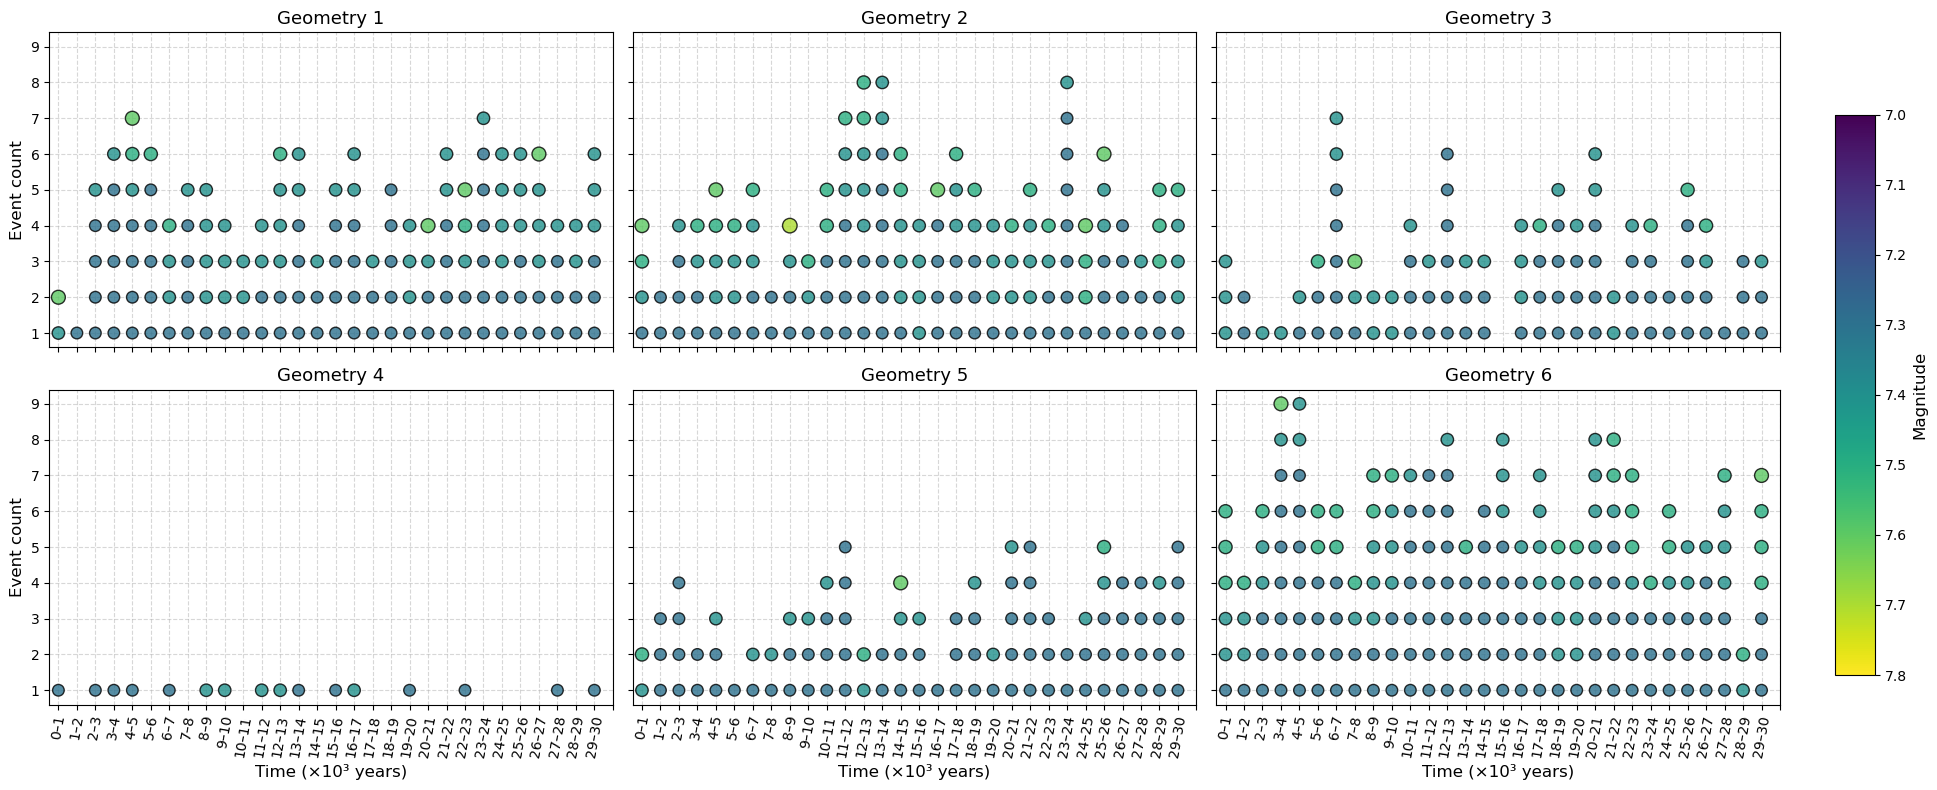

In [34]:

# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl4, "Geometry 4"),
    (cat_cntmags1_mdl5, "Geometry 5"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Create continuous colormap ===
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=7.0, vmax=7.8)  # Magnitude range

# === Dynamic size mapping function ===
def map_size(mag, mag_min=7.0, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to a marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for ax, (df, title) in zip(axes, datasets):
    # Color mapping
    colors = cmap(norm(df['mag_bin']))

    # Size mapping
    sizes = map_size(df['mag_bin'])  # Apply dynamic sizing

    sc = ax.scatter(
        df['period_label'], df['y_stack'],
        c=colors,
        s=sizes,  
        edgecolor='black', alpha=0.8
    )

    # X-ticks
    ax.set_xticks(full_periods)
    ax.set_xticklabels(full_tick_labels, rotation=80)
    ax.set_xlim(full_periods[0] - 500, full_periods[-1] + 1000)
    ax.xaxis.set_major_locator(MultipleLocator(1000))

    if ax in axes[:3]:  # Top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

    ax.set_title(title, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Axis labels ===
axes[0].set_ylabel("Event count", fontsize=12)
axes[3].set_ylabel("Event count", fontsize=12)

for ax in axes[3:]:
    ax.set_xlabel("Time (×10³ years)", fontsize=12)

# === Colorbar (vertical) ===
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    orientation='vertical'
)
cb.set_label('Magnitude', fontsize=12)
cb.ax.invert_yaxis()  
cb.ax.tick_params(labelsize=10)

# === Layout adjustment ===
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


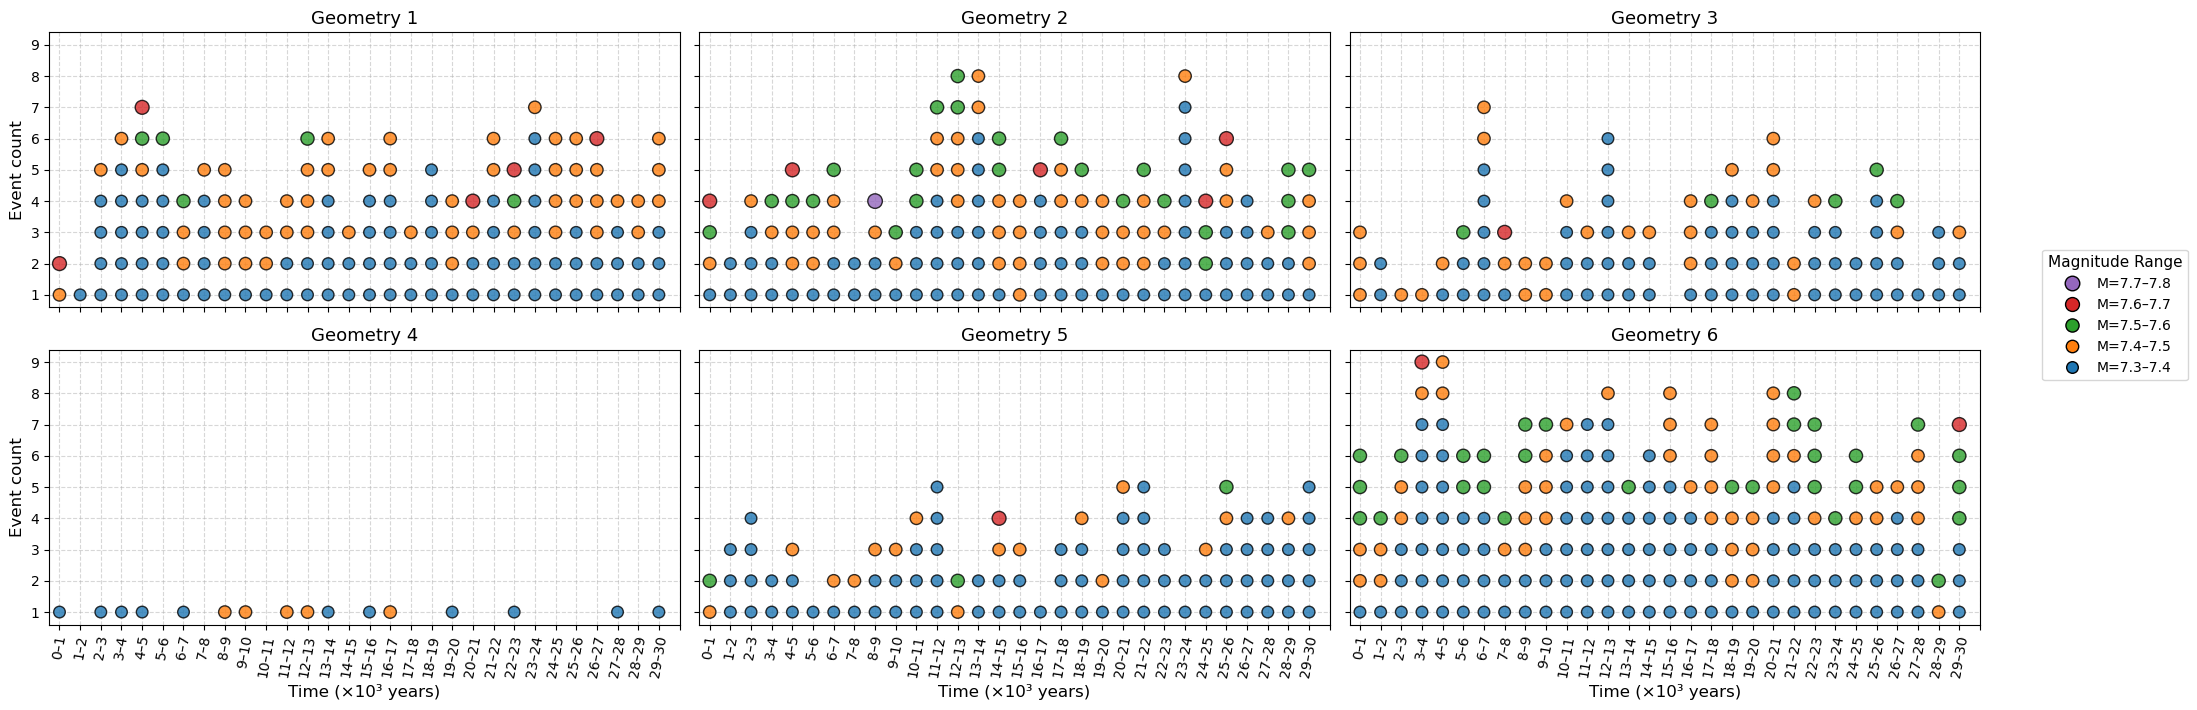

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator

# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl4, "Geometry 4"),
    (cat_cntmags1_mdl5, "Geometry 5"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Color map: use discrete tab10 colors ===
all_mag_bins = sorted(set().union(*[df['mag_bin'].unique() for df, _ in datasets]))
color_palette = sns.color_palette("tab10", len(all_mag_bins))
color_map = {bin_val: color for bin_val, color in zip(all_mag_bins, color_palette)}

# === Dynamic size mapping function ===
def map_size(mag, mag_min=7.0, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for ax, (df, title) in zip(axes, datasets):
    # Assign colors and sizes
    df['color'] = df['mag_bin'].map(color_map)
    sizes = map_size(df['mag_bin'])

    sc = ax.scatter(
        df['period_label'], df['y_stack'],
        c=df['color'].tolist(),   # Use tab10 mapped colors
        s=sizes,                  # Dynamic sizes
        edgecolor='black', alpha=0.8
    )

    # X-ticks
    ax.set_xticks(full_periods)
    ax.set_xticklabels(full_tick_labels, rotation=80)
    ax.set_xlim(full_periods[0] - 500, full_periods[-1] + 1000)
    ax.xaxis.set_major_locator(MultipleLocator(1000))

    if ax in axes[:3]:  # Top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

    ax.set_title(title, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Axis labels ===
axes[0].set_ylabel("Event count", fontsize=12)
axes[3].set_ylabel("Event count", fontsize=12)

for ax in axes[3:]:
    ax.set_xlabel("Time (×10³ years)", fontsize=12)

# === Build manual legend with circles (Line2D) ===
legend_elements = [
    mlines.Line2D(
        [], [],
        color=color_map[bin_val],
        marker='o',
        linestyle='None',
        markersize=np.sqrt(map_size(bin_val)),  # Match marker size
        markeredgecolor='black',
        label=f"M={bin_val:.1f}–{bin_val + 0.1:.1f}"
    )
    for bin_val in sorted(color_map.keys())
]

# Reverse so small magnitudes are at bottom
legend_elements = legend_elements[::-1]

# === Add the common vertical legend ===
fig.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    title="Magnitude Range", fontsize=10, title_fontsize=11
)

# === Layout adjustment ===
plt.tight_layout(rect=[0, 0, 1, 0.9]) 
plt.show()


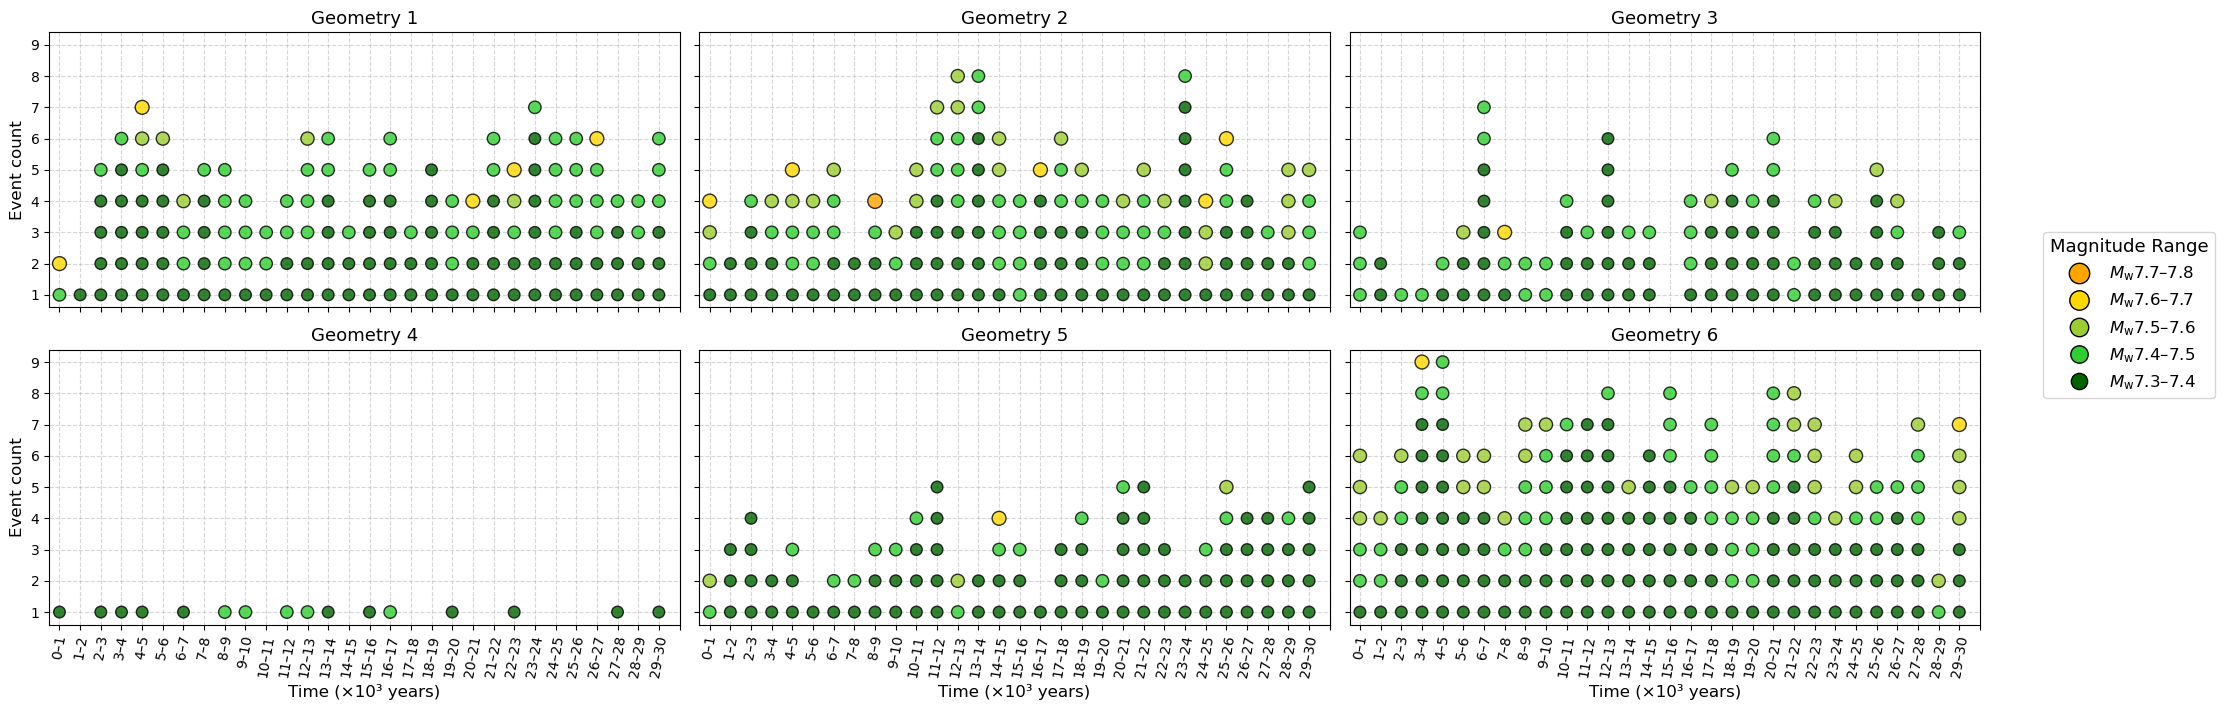

In [38]:

# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl4, "Geometry 4"),
    (cat_cntmags1_mdl5, "Geometry 5"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Custom color palette (8 colors for 8 bins) ===
color_palette = [
    "darkgreen",   # 7.0
    "limegreen",   # 7.1
    "yellowgreen", # 7.2
    "gold",        # 7.3
    "orange",      # 7.4
    "orangered",   # 7.5
    "red",         # 7.6
    "darkred"      # 7.7
]

# === Assign color map ===
all_mag_bins = sorted(set().union(*[df['mag_bin'].unique() for df, _ in datasets]))
color_map = {bin_val: color for bin_val, color in zip(all_mag_bins, color_palette)}

# === Dynamic size mapping function ===
def map_size(mag, mag_min=7.0, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for ax, (df, title) in zip(axes, datasets):
    # Assign colors and sizes
    df['color'] = df['mag_bin'].map(color_map)
    sizes = map_size(df['mag_bin'])

    sc = ax.scatter(
        df['period_label'], df['y_stack'],
        c=df['color'].tolist(),   # Use custom mapped colors
        s=sizes,                  # Dynamic sizes
        edgecolor='black', alpha=0.8
    )

    # X-ticks
    ax.set_xticks(full_periods)
    ax.set_xticklabels(full_tick_labels, rotation=80)
    ax.set_xlim(full_periods[0] - 500, full_periods[-1] + 1000)
    ax.xaxis.set_major_locator(MultipleLocator(1000))

    if ax in axes[:3]:  # Top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

    ax.set_title(title, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Axis labels ===
axes[0].set_ylabel("Event count", fontsize=12)
axes[3].set_ylabel("Event count", fontsize=12)

for ax in axes[3:]:
    ax.set_xlabel("Time (×10³ years)", fontsize=12)

# === Build manual legend with circles (Line2D) ===
legend_elements = [
    mlines.Line2D(
        [], [],
        color=color_map[bin_val],
        marker='o',
        linestyle='None',
        markersize=1.4 * np.sqrt(map_size(bin_val)),  # Slightly bigger for clarity
        markeredgecolor='black',
        label=r"$M_{\mathrm{w}}$" + f"{bin_val:.1f}–{bin_val + 0.1:.1f}"  # Mw with subscript w
    )
    for bin_val in sorted(color_map.keys())
]

# Reverse so small magnitudes at bottom
legend_elements = legend_elements[::-1]

# === Add the common vertical legend ===
fig.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    title="Magnitude Range", fontsize=12, title_fontsize=13
)

# === Layout adjustment ===
plt.tight_layout(rect=[0, 0, 1, 0.9])  #
plt.show()


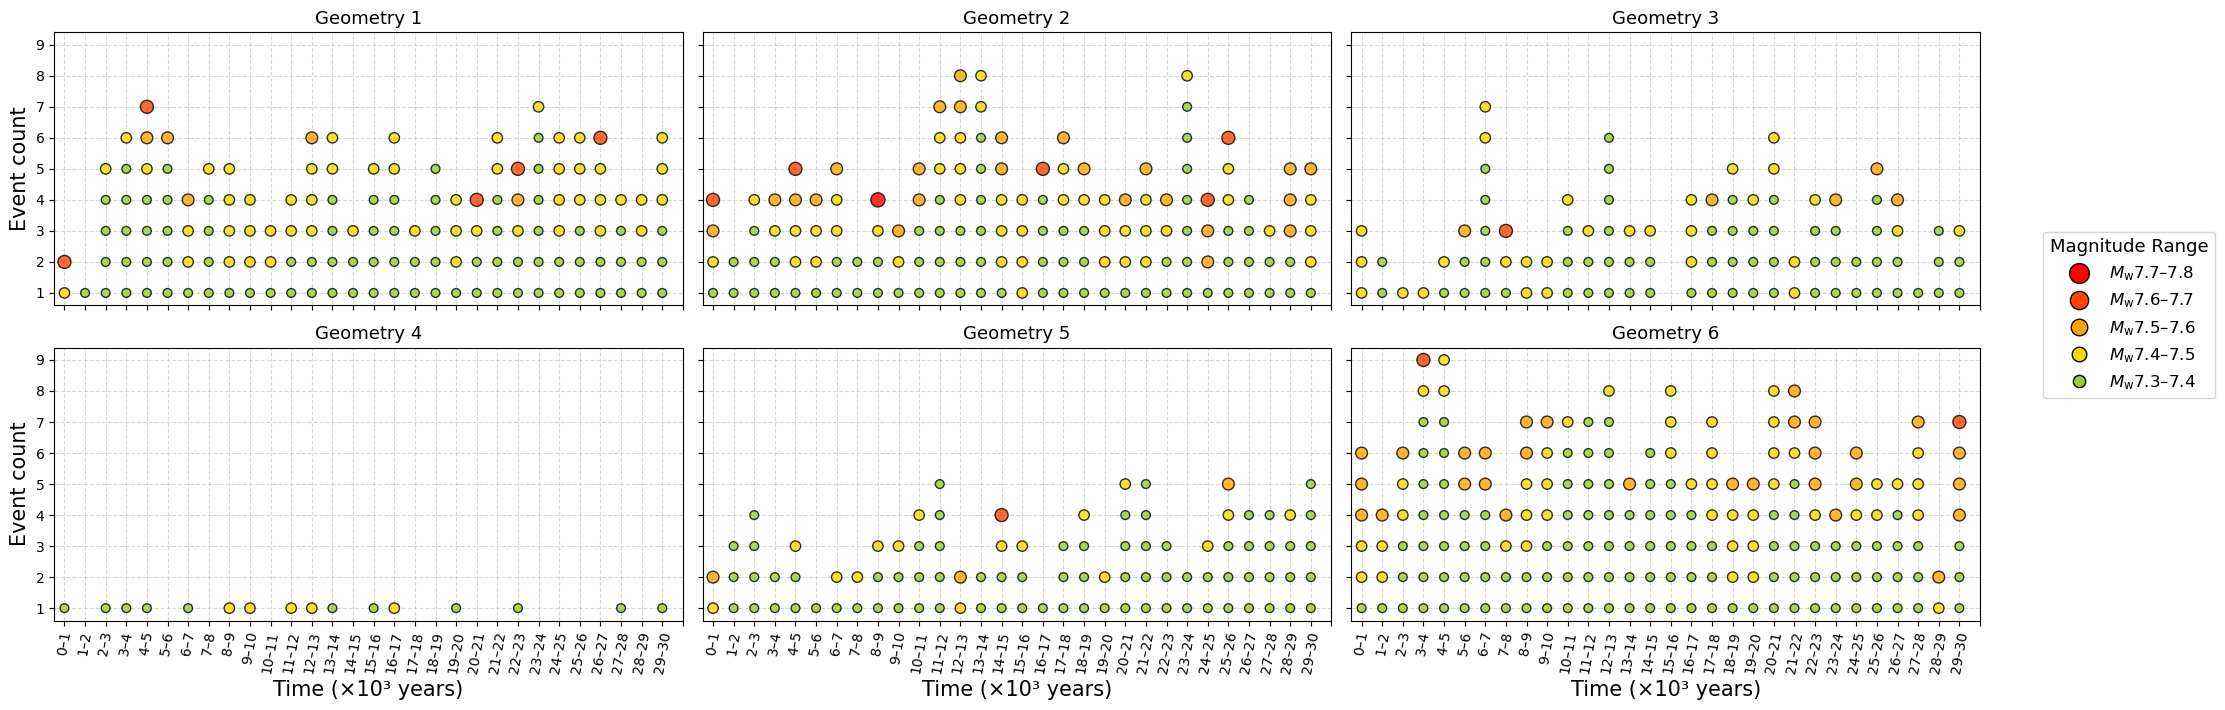

In [98]:
# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl4, "Geometry 4"),
    (cat_cntmags1_mdl5, "Geometry 5"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Custom color palette (5 colors for 5 bins) ===
color_palette = [
    "yellowgreen",  # 7.3
    "gold",         # 7.4
    "orange",       # 7.5
    "orangered",    # 7.6
    "red"           # 7.7
]

# === Assign color map ===
all_mag_bins = sorted(set().union(*[df['mag_bin'].unique() for df, _ in datasets]))
color_map = {bin_val: color for bin_val, color in zip(all_mag_bins, color_palette)}

# === Dynamic size mapping function
def map_size(mag, mag_min=7.3, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for ax, (df, title) in zip(axes, datasets):
    # Assign colors and sizes
    df['color'] = df['mag_bin'].map(color_map)
    sizes = map_size(df['mag_bin'])

    sc = ax.scatter(
        df['period_label'], df['y_stack'],
        c=df['color'].tolist(),   # Use custom mapped colors
        s=sizes,                  # Dynamic sizes
        edgecolor='black', alpha=0.8
    )

    # X-ticks
    ax.set_xticks(full_periods)
    ax.set_xticklabels(full_tick_labels, rotation=80)
    ax.set_xlim(full_periods[0] - 500, full_periods[-1] + 1000)
    ax.xaxis.set_major_locator(MultipleLocator(1000))

    if ax in axes[:3]:  # Top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

    ax.set_title(title, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Axis labels ===
axes[0].set_ylabel("Event count", fontsize=15)
axes[3].set_ylabel("Event count", fontsize=15)

for ax in axes[3:]:
    ax.set_xlabel("Time (×10³ years)", fontsize=15)

# === Build manual legend with circles (Line2D) ===
legend_elements = [
    mlines.Line2D(
        [], [],
        color=color_map[bin_val],
        marker='o',
        linestyle='None',
        markersize=1.4 * np.sqrt(map_size(bin_val)),  # Scale legend markers bigger
        markeredgecolor='black',
        label=r"$M_{\mathrm{w}}$" + f"{bin_val:.1f}–{bin_val + 0.1:.1f}"  # Mw with subscript w
    )
    for bin_val in sorted(color_map.keys())
]

# Reverse so small magnitudes at bottom
legend_elements = legend_elements[::-1]

# === Add the common vertical legend ===
fig.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    title="Magnitude Range", fontsize=12, title_fontsize=13
)

# === Layout adjustment ===
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for side legend
plt.show()


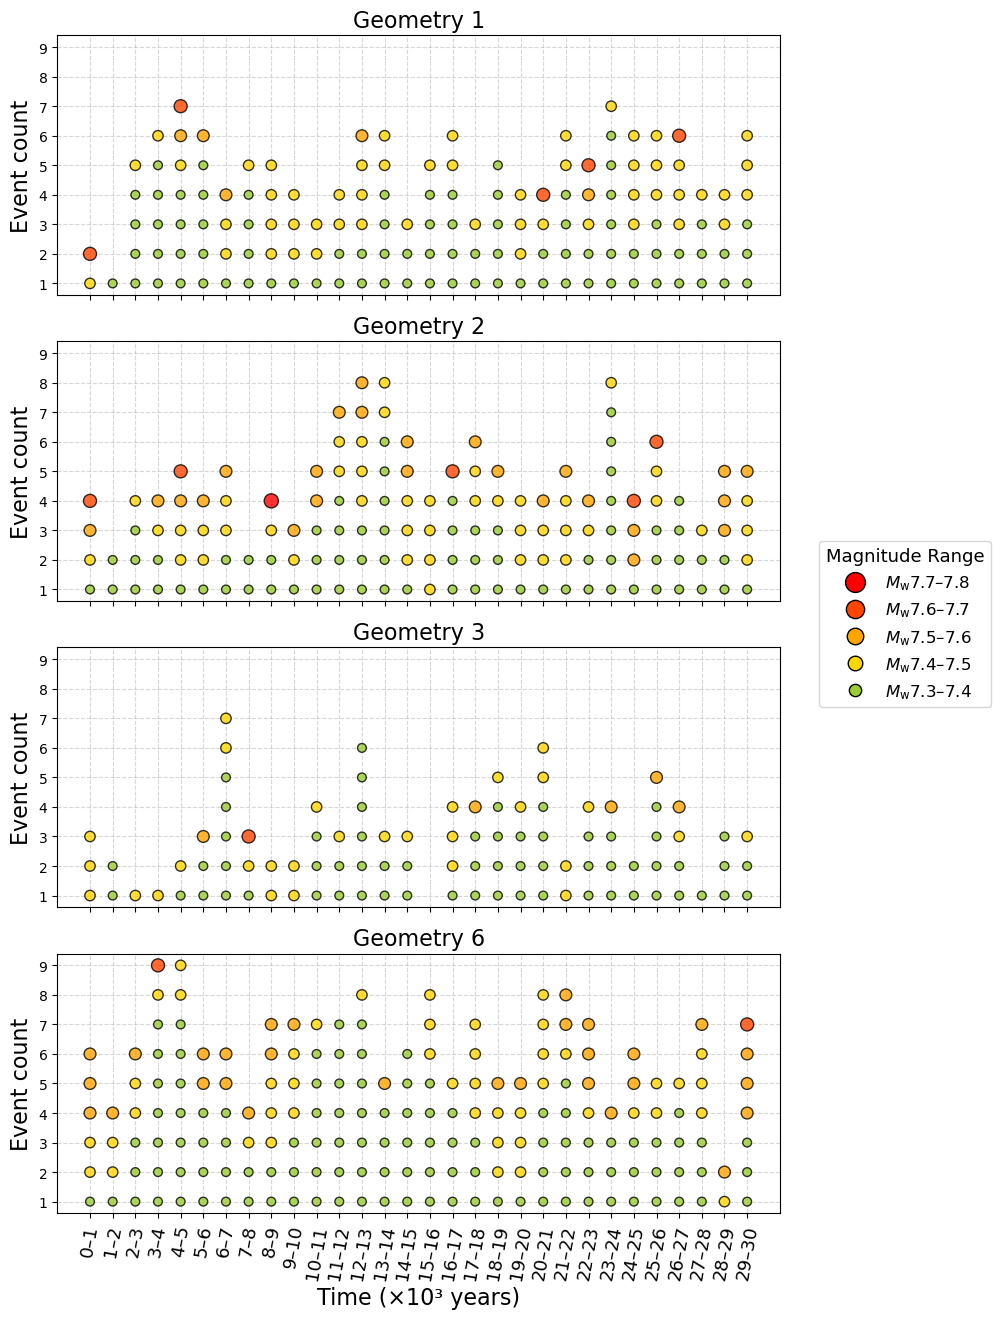

In [109]:
from matplotlib.ticker import FixedLocator

# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 14), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Custom color palette (5 colors for 5 bins) ===
color_palette = [
    "yellowgreen",  # 7.3
    "gold",         # 7.4
    "orange",       # 7.5
    "orangered",    # 7.6
    "red"           # 7.7
]

# === Assign color map ===
all_mag_bins = sorted(set().union(*[df['mag_bin'].unique() for df, _ in datasets]))
color_map = {bin_val: color for bin_val, color in zip(all_mag_bins, color_palette)}

# === Dynamic size mapping function ===
def map_size(mag, mag_min=7.3, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for i, (ax, (df, title)) in enumerate(zip(axes, datasets)):
    # Assign colors and sizes
    df['color'] = df['mag_bin'].map(color_map)
    sizes = map_size(df['mag_bin'])

    sc = ax.scatter(
        df['period_label'], df['y_stack'],
        c=df['color'].tolist(),
        s=sizes,
        edgecolor='black',
        alpha=0.8
    )

    # X-ticks
    ax.xaxis.set_major_locator(FixedLocator(full_periods))

    # Only bottom plot → show tick labels + xlabel
    if i == len(axes) - 1:
        ax.set_xticklabels(full_tick_labels, rotation=80, fontsize=13)
        ax.set_xlabel("Time (×10³ years)", fontsize=16)
    else:
        ax.set_xticklabels([])

    # All plots → add Y-label
    ax.set_ylabel("Event count", fontsize=16)

    ax.set_title(title, fontsize=16)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Build manual legend with circles ===
legend_elements = [
    mlines.Line2D(
        [], [],
        color=color_map[bin_val],
        marker='o',
        linestyle='None',
        markersize=1.4 * np.sqrt(map_size(bin_val)),
        markeredgecolor='black',
        label=r"$M_{\mathrm{w}}$" + f"{bin_val:.1f}–{bin_val + 0.1:.1f}"
    )
    for bin_val in sorted(color_map.keys())
]

# Reverse legend to show small magnitudes first
legend_elements = legend_elements[::-1]

fig.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    title="Magnitude Range", fontsize=12, title_fontsize=13
)

# === Final layout adjustment ===
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


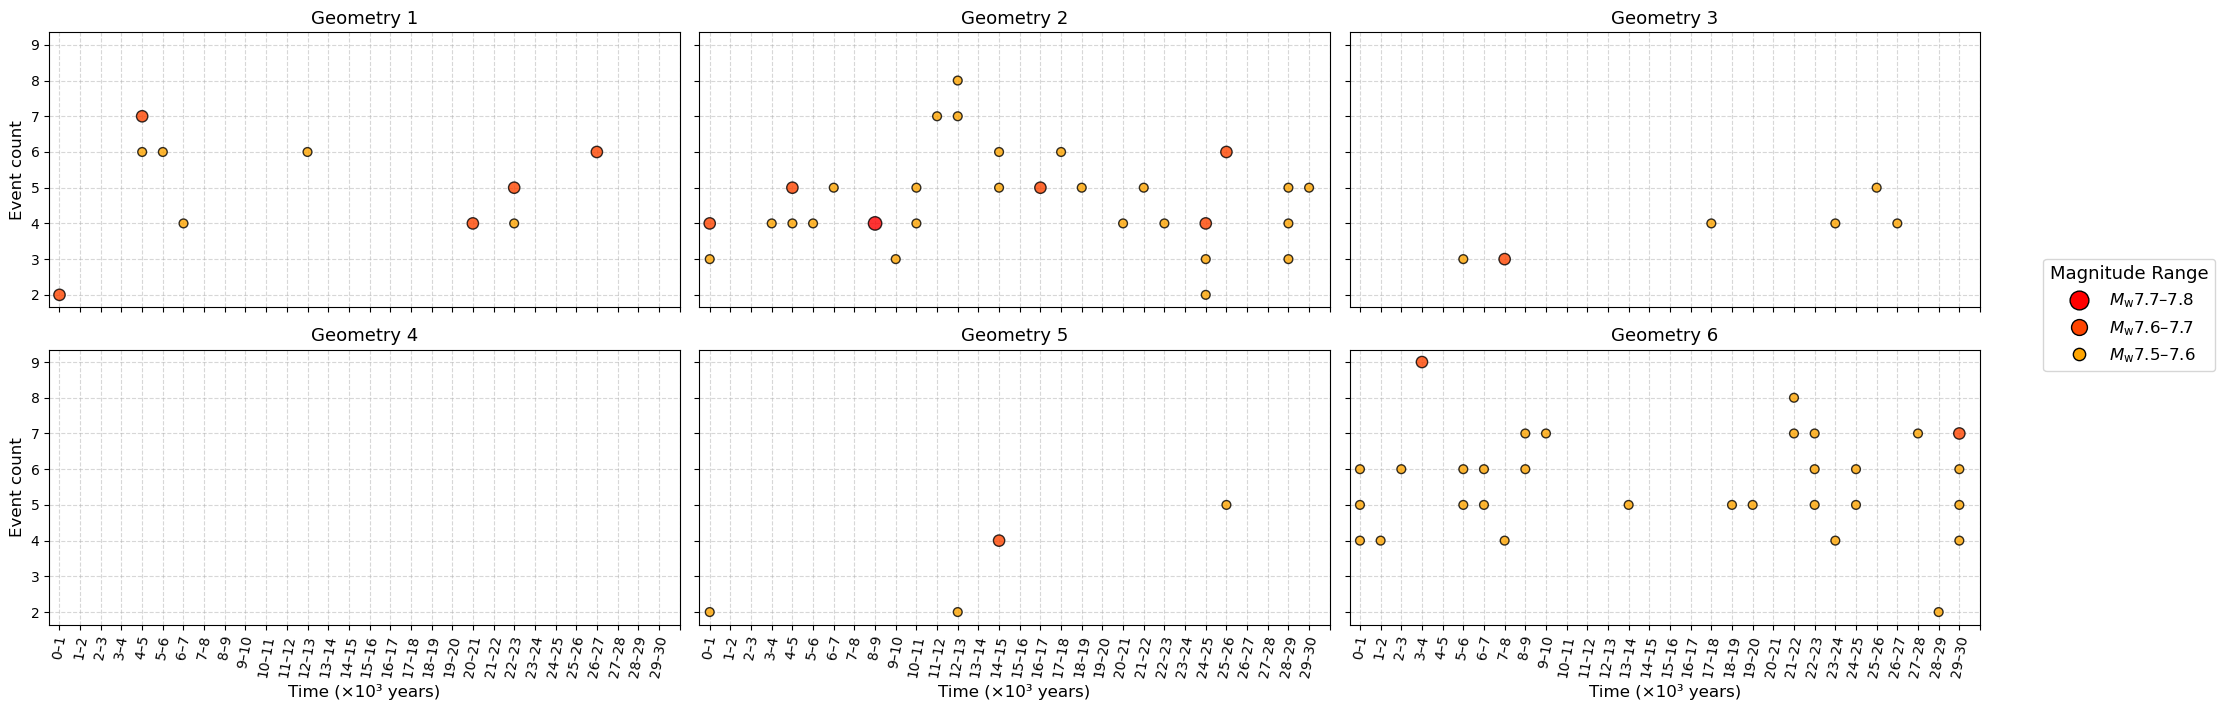

In [40]:
# === Datasets ===
datasets = [
    (cat_cntmags1_mdl1, "Geometry 1"),
    (cat_cntmags1_mdl2, "Geometry 2"),
    (cat_cntmags1_mdl3, "Geometry 3"),
    (cat_cntmags1_mdl4, "Geometry 4"),
    (cat_cntmags1_mdl5, "Geometry 5"),
    (cat_cntmags1_mdl6, "Geometry 6")
]

# === Set up figure ===
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# === X-ticks setup ===
full_periods = np.arange(0, 30000, 1000)
full_tick_labels = [f"{int(t//1000)}–{int(t//1000 + 1)}" for t in full_periods]

# === Custom color palette (for 7.5, 7.6, 7.7, 7.8, etc.)
color_palette = [
    "orange",     # 7.5
    "orangered",  # 7.6
    "red",        # 7.7
    "darkred"     # 7.8
]

# === Assign color map (only bins >= 7.5)
all_mag_bins = sorted(set().union(*[df['mag_bin'].unique() for df, _ in datasets]))
all_mag_bins = [bin_val for bin_val in all_mag_bins if bin_val >= 7.5]  # 📌 filter bins >= 7.5

color_map = {bin_val: color for bin_val, color in zip(all_mag_bins, color_palette)}

# === Dynamic size mapping function
def map_size(mag, mag_min=7.5, mag_max=7.8, size_min=40, size_max=120):
    """Maps magnitude to marker size."""
    return size_min + (mag - mag_min) / (mag_max - mag_min) * (size_max - size_min)

# === Plotting ===
for ax, (df, title) in zip(axes, datasets):
    # 📌 Filter df to only events ≥7.5
    df_filtered = df[df['mag_bin'] >= 7.5].copy()

    # Assign colors and sizes
    df_filtered['color'] = df_filtered['mag_bin'].map(color_map)
    sizes = map_size(df_filtered['mag_bin'])

    sc = ax.scatter(
        df_filtered['period_label'], df_filtered['y_stack'],
        c=df_filtered['color'].tolist(),
        s=sizes,
        edgecolor='black', alpha=0.8
    )

    # X-ticks
    ax.set_xticks(full_periods)
    ax.set_xticklabels(full_tick_labels, rotation=80)
    ax.set_xlim(full_periods[0] - 500, full_periods[-1] + 1000)
    ax.xaxis.set_major_locator(MultipleLocator(1000))

    if ax in axes[:3]:  # Top row
        ax.set_xticklabels([])
        ax.set_xlabel('')

    ax.set_title(title, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)

# === Axis labels ===
axes[0].set_ylabel("Event count", fontsize=12)
axes[3].set_ylabel("Event count", fontsize=12)

for ax in axes[3:]:
    ax.set_xlabel("Time (×10³ years)", fontsize=12)

# === Build manual legend with circles (Line2D) ===
import matplotlib.lines as mlines

legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color_map[bin_val],
        marker='o', linestyle='None',
        markersize=1.4 * np.sqrt(map_size(bin_val)),
        markeredgecolor='black',
        label=r"$M_{\mathrm{w}}$" + f"{bin_val:.1f}–{bin_val + 0.1:.1f}"
    )
    for bin_val in sorted(color_map.keys())
]

# Reverse so small magnitudes at bottom
legend_elements = legend_elements[::-1]

# === Add the common vertical legend ===
fig.legend(
    handles=legend_elements,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    title="Magnitude Range", fontsize=12, title_fontsize=13
)

# === Layout adjustment ===
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for side legend
plt.show()


In [41]:
def load_cat_mat_time_mag2(file_path, mag_min=7.0, mag_max=7.8):
    """
    Loads an earthquake catalog from a .mat file, filters it by magnitude,
    and directly computes statistics:
    - Mean events per 1000 years
    - Total number of events
    - Total catalog duration

    Parameters:
        file_path (str): Path to the .mat file.
        mag_min (float): Minimum magnitude to include.
        mag_max (float): Maximum magnitude to include.

    Returns:
        mean_events_per_1000yrs (float): Mean number of events per 1000 years.
        total_events (int): Total number of events.
        total_duration (float): Catalog duration in years.
    """
    # Load .mat file
    mat_data = mat.loadmat(file_path)
    catalog = mat_data['Catalog']
    labels = [entry[0][0] for entry in mat_data['CatalogInfo']]

    df = pd.DataFrame(catalog.T, columns=labels)

    # Filter by magnitude
    filtered = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)][['time', 'magnitude']].copy()

    if filtered.empty:
        return np.nan, np.nan, np.nan

    # Compute statistics
    total_events = len(filtered)
    total_duration = filtered['time'].max() - filtered['time'].min()
    number_of_1000yr_bins = total_duration / 1000
    mean_events_per_1000yrs = total_events / number_of_1000yr_bins if number_of_1000yr_bins != 0 else np.nan

    return mean_events_per_1000yrs, total_events, total_duration


In [81]:
cat_1k_mdl1= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof",  mag_min=7.3, mag_max=7.9)
cat_1k_mdl2= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof",  mag_min=7.3, mag_max=7.9)
cat_1k_mdl3= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof",  mag_min=7.3, mag_max=7.9)
cat_1k_mdl4= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof",  mag_min=7.3, mag_max=7.9)
cat_1k_mdl5= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof",  mag_min=7.3, mag_max=7.9)
cat_1k_mdl6= load_cat_mat_time_mag2("C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof",  mag_min=7.3, mag_max=7.9)

In [58]:
file_paths = [
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof",
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof",
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof",
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof",
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof",
    "C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof"
]

geometry_names = [
    "Geometry 1",
    "Geometry 2",
    "Geometry 3",
    "Geometry 4",
    "Geometry 5",
    "Geometry 6"
]

for path, name in zip(file_paths, geometry_names):
    mean_events, total_events, total_duration = load_cat_mat_time_mag(path)
    print(f"{name}: Mean = {mean_events:.3f} events/1000 yrs, Total Events = {total_events}, Catalog Duration = {total_duration:.1f} yrs")


Geometry 1: Mean = 4.847 events/1000 yrs, Total Events = 144, Catalog Duration = 29706.2 yrs
Geometry 2: Mean = 4.798 events/1000 yrs, Total Events = 143, Catalog Duration = 29805.0 yrs
Geometry 3: Mean = 3.262 events/1000 yrs, Total Events = 96, Catalog Duration = 29426.2 yrs
Geometry 4: Mean = 0.559 events/1000 yrs, Total Events = 16, Catalog Duration = 28642.5 yrs
Geometry 5: Mean = 3.224 events/1000 yrs, Total Events = 95, Catalog Duration = 29467.4 yrs
Geometry 6: Mean = 6.268 events/1000 yrs, Total Events = 186, Catalog Duration = 29676.9 yrs


In [82]:
all_cats = [cat_1k_mdl1, cat_1k_mdl2, cat_1k_mdl3, cat_1k_mdl4, cat_1k_mdl5, cat_1k_mdl6]
geometry_names = ["Geometry 1", "Geometry 2", "Geometry 3", "Geometry 4", "Geometry 5", "Geometry 6"]

for (mean_events, total_events, total_duration), name in zip(all_cats, geometry_names):
    print(f"{name}: Mean = {mean_events:.3f} events/1000 yrs, Total Events = {total_events}, Catalog Duration = {total_duration:.1f} yrs")


Geometry 1: Mean = 4.847 events/1000 yrs, Total Events = 144, Catalog Duration = 29706.2 yrs
Geometry 2: Mean = 4.798 events/1000 yrs, Total Events = 143, Catalog Duration = 29805.0 yrs
Geometry 3: Mean = 3.262 events/1000 yrs, Total Events = 96, Catalog Duration = 29426.2 yrs
Geometry 4: Mean = 0.559 events/1000 yrs, Total Events = 16, Catalog Duration = 28642.5 yrs
Geometry 5: Mean = 3.224 events/1000 yrs, Total Events = 95, Catalog Duration = 29467.4 yrs
Geometry 6: Mean = 6.268 events/1000 yrs, Total Events = 186, Catalog Duration = 29676.9 yrs


In [42]:
def load_rcrnc_tms_stats(file_path, mag_min=7.0, mag_max=10.0):
    """
    Loads a catalog from a .mat file and returns recurrence times and summary statistics.

    Parameters:
        file_path (str): Path to the .mat file.
        mag_min (float): Minimum magnitude to consider.
        mag_max (float): Maximum magnitude to consider.

    Returns:
        dict: {
            'recurrence_times': np.ndarray of Δt,
            'mean': float,
            'median': float,
            'std': float,
            'cv': float (coefficient of variation)
        }
    """
    # Load .mat file
    mat_data = mat.loadmat(file_path)
    catalog = mat_data['Catalog']
    labels = [entry[0][0] for entry in mat_data['CatalogInfo']]
    df = pd.DataFrame(catalog.T, columns=labels)

    # Filter by magnitude range
    filtered_df = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)].copy()
    filtered_df = filtered_df.sort_values(by='time').reset_index(drop=True)

    # Compute recurrence times
    filtered_df['recurrence_time'] = filtered_df['time'].diff()
    rec_times = filtered_df['recurrence_time'].dropna().values

    # Compute stats
    mean_rt = np.mean(rec_times)
#     median_rt = np.median(rec_times)
    std_rt = np.std(rec_times)
    cv_rt = std_rt / mean_rt if mean_rt != 0 else np.nan

    return {
        'recurrence_times': rec_times,
        'mean': mean_rt,
#         'median': median_rt,
        'std': std_rt,
        'cv': cv_rt
    }


In [43]:
cat_rcrnc1_mdl1= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl1_2cutof',  mag_min=7.0, mag_max=7.9)
cat_rcrnc1_mdl2= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl2_2cutof',  mag_min=7.0, mag_max=7.9)
cat_rcrnc1_mdl3= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl3_2cutof',  mag_min=7.0, mag_max=7.9)
cat_rcrnc1_mdl4= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl4_2cutof',  mag_min=7.0, mag_max=7.9)
cat_rcrnc1_mdl5= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl5_2cutof',  mag_min=7.0, mag_max=7.9)
cat_rcrnc1_mdl6= load_rcrnc_tms_stats('C:/Users/saram/MCQsim cat anlyss/results/fullcat_mdl6_2cutof',  mag_min=7.0, mag_max=7.9)

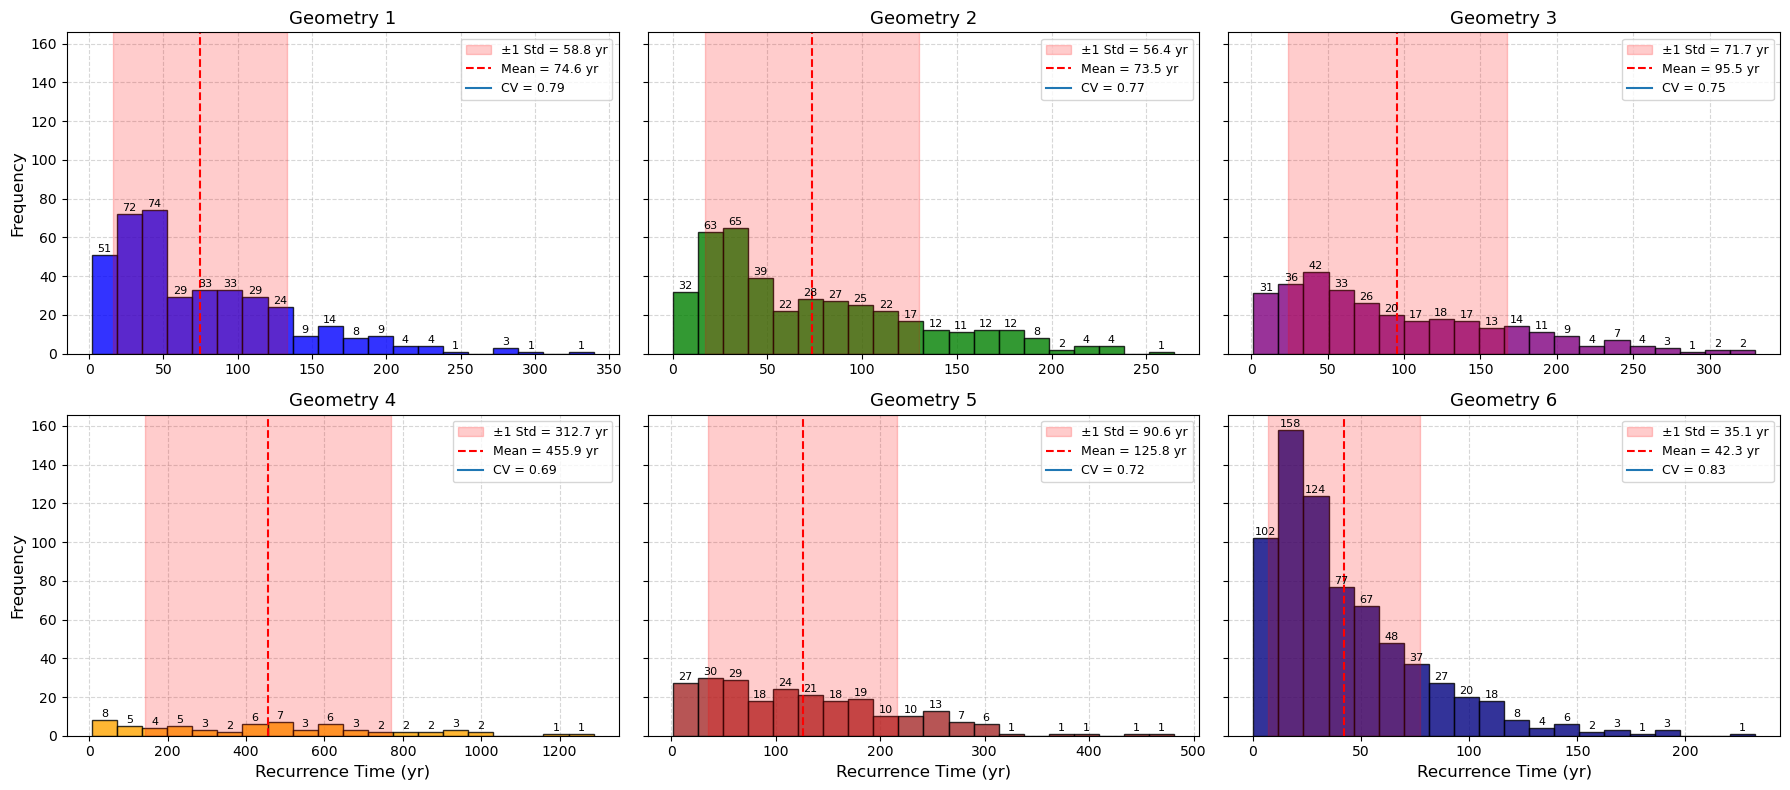

In [45]:
catalogs115 = [
    (cat_rcrnc1_mdl1, 'Geometry 1', 'blue'),
    (cat_rcrnc1_mdl2, 'Geometry 2', 'green'),
    (cat_rcrnc1_mdl3, 'Geometry 3', 'purple'),
    (cat_rcrnc1_mdl4, 'Geometry 4', 'orange'),
    (cat_rcrnc1_mdl5, 'Geometry 5', 'brown'),
    (cat_rcrnc1_mdl6, 'Geometry 6', 'navy'),
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs115):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)

# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


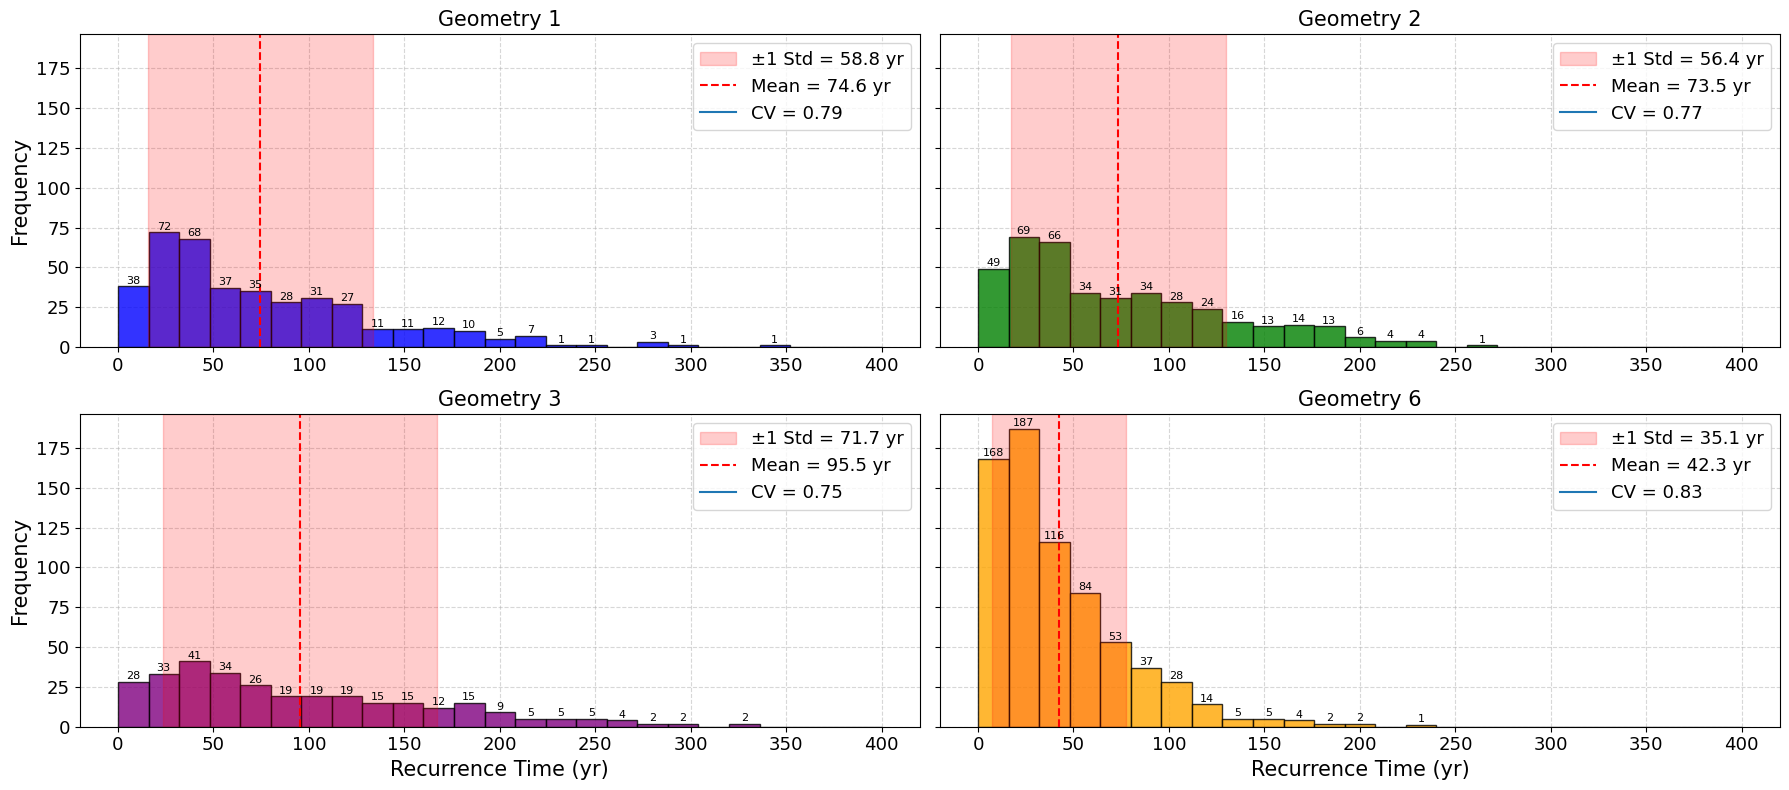

In [104]:
# Define bin settings
bin_min = 0    # For example
bin_max = 400 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs115 = [
    (cat_rcrnc1_mdl1, 'Geometry 1', 'blue'),
    (cat_rcrnc1_mdl2, 'Geometry 2', 'green'),
    (cat_rcrnc1_mdl3, 'Geometry 3', 'purple'),
#     (cat_rcrnc1_mdl4, 'Geometry 4', 'orange'),
#     (cat_rcrnc1_mdl5, 'Geometry 5', 'brown'),
    (cat_rcrnc1_mdl6, 'Geometry 6', 'orange'),
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs115):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=15)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=13)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)

# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
axes[2].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
# axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()



# <<<<<<<<<<<<<<<<<<for radius with 0.2 slip cut>>>>>>>>>>>>>>>>>>>>>

In [43]:
def load_cat_short(file_path):
    """
    Loads an earthquake catalog from a .mat file and returns time and magnitude arrays.

    Parameters:
        file_path (str): The path to the .mat file.

    Returns:
        time (np.ndarray): Array of event times.
        magnitude (np.ndarray): Array of event magnitudes.
    """
    # Load the .mat file
    mat_data = mat.loadmat(file_path)
    
    # Extract and flatten time and magnitude
    time = mat_data['time'].flatten()
    magnitude = mat_data['magnitude'].flatten()
    
    return time, magnitude


In [48]:
narli_time1, narli_mag1 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl1")
narli_time2, narli_mag2 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl2")
narli_time3, narli_mag3 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl3")
narli_time5, narli_mag5 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl5")
narli_time6, narli_mag6 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl6")

In [44]:
def load_rcrnc_tms_stats_short(file_path, mag_min=7.0, mag_max=10.0):
    """
    Loads a simple catalog from a .mat file with 'time' and 'magnitude' arrays,
    and returns recurrence times and summary statistics.

    Parameters:
        file_path (str): Path to the .mat file.
        mag_min (float): Minimum magnitude to consider.
        mag_max (float): Maximum magnitude to consider.

    Returns:
        dict: {
            'recurrence_times': np.ndarray of Δt,
            'mean': float,
            'std': float,
            'cv': float (coefficient of variation)
        }
    """
    # Load .mat file
    mat_data = mat.loadmat(file_path)
    time = mat_data['time'].flatten()
    magnitude = mat_data['magnitude'].flatten()
    
    # Make a DataFrame
    df = pd.DataFrame({'time': time, 'magnitude': magnitude})

    # Filter by magnitude range
    filtered_df = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)].copy()
    filtered_df = filtered_df.sort_values(by='time').reset_index(drop=True)

    # Compute recurrence times (Δt)
    filtered_df['recurrence_time'] = filtered_df['time'].diff()
    rec_times = filtered_df['recurrence_time'].dropna().values

    # Compute statistics
    mean_rt = np.mean(rec_times)
    std_rt = np.std(rec_times)
    cv_rt = std_rt / mean_rt if mean_rt != 0 else np.nan

    return rec_times

# {
#         'recurrence_times': rec_times,
#         'mean': mean_rt,
#         'std': std_rt,
#         'cv': cv_rt
#     }


In [45]:
def load_rcrnc_tms_stats_short(file_path, mag_min=7.0, mag_max=10.0):
    """
    Loads a simple catalog from a .mat file with 'time' and 'magnitude' arrays,
    and returns recurrence times and summary statistics.

    Parameters:
        file_path (str): Path to the .mat file.
        mag_min (float): Minimum magnitude to consider.
        mag_max (float): Maximum magnitude to consider.

    Returns:
        dict: {
            'recurrence_times': np.ndarray of Δt,
            'mean': float,
            'std': float,
            'cv': float (coefficient of variation)
        }
    """
    # Load .mat file
    mat_data = mat.loadmat(file_path)
    time = mat_data['time'].flatten()
    magnitude = mat_data['magnitude'].flatten()
    
    # Make a DataFrame
    df = pd.DataFrame({'time': time, 'magnitude': magnitude})

    # Filter by magnitude range
    filtered_df = df[(df['magnitude'] >= mag_min) & (df['magnitude'] < mag_max)].copy()
    filtered_df = filtered_df.sort_values(by='time').reset_index(drop=True)

    # Compute recurrence times (Δt)
    filtered_df['recurrence_time'] = filtered_df['time'].diff()
    rec_times = filtered_df['recurrence_time'].dropna().values

    # Compute statistics
    mean_rt = np.mean(rec_times)
    std_rt = np.std(rec_times)
    cv_rt = std_rt / mean_rt if mean_rt != 0 else np.nan

    return {
        'recurrence_times': rec_times,
        'mean': mean_rt,
        'std': std_rt,
        'cv': cv_rt
    }


geometry1 (A) → Bin center: 5.55, Count: 3
geometry1 (A) → Bin center: 5.64, Count: 4
geometry1 (A) → Bin center: 5.74, Count: 11
geometry1 (A) → Bin center: 5.84, Count: 22
geometry1 (A) → Bin center: 5.93, Count: 33
geometry1 (A) → Bin center: 6.03, Count: 32
geometry1 (A) → Bin center: 6.12, Count: 13
geometry1 (A) → Bin center: 6.22, Count: 17
geometry1 (A) → Bin center: 6.31, Count: 17
geometry1 (A) → Bin center: 6.41, Count: 24
geometry1 (A) → Bin center: 6.51, Count: 14
geometry1 (A) → Bin center: 6.60, Count: 14
geometry1 (A) → Bin center: 6.70, Count: 11
geometry1 (A) → Bin center: 6.79, Count: 16
geometry1 (A) → Bin center: 6.89, Count: 9
geometry1 (A) → Bin center: 6.99, Count: 3
geometry1 (A) → Bin center: 7.08, Count: 2
geometry1 (A) → Bin center: 7.18, Count: 3
geometry1 (A) → Bin center: 7.27, Count: 2
geometry1 (A) → Bin center: 7.37, Count: 2
geometry1 (A) → Bin center: 7.46, Count: 1
geometry1 (A) → Bin center: 7.56, Count: 1
geometry2 (A) → Bin center: 5.55, Count: 5

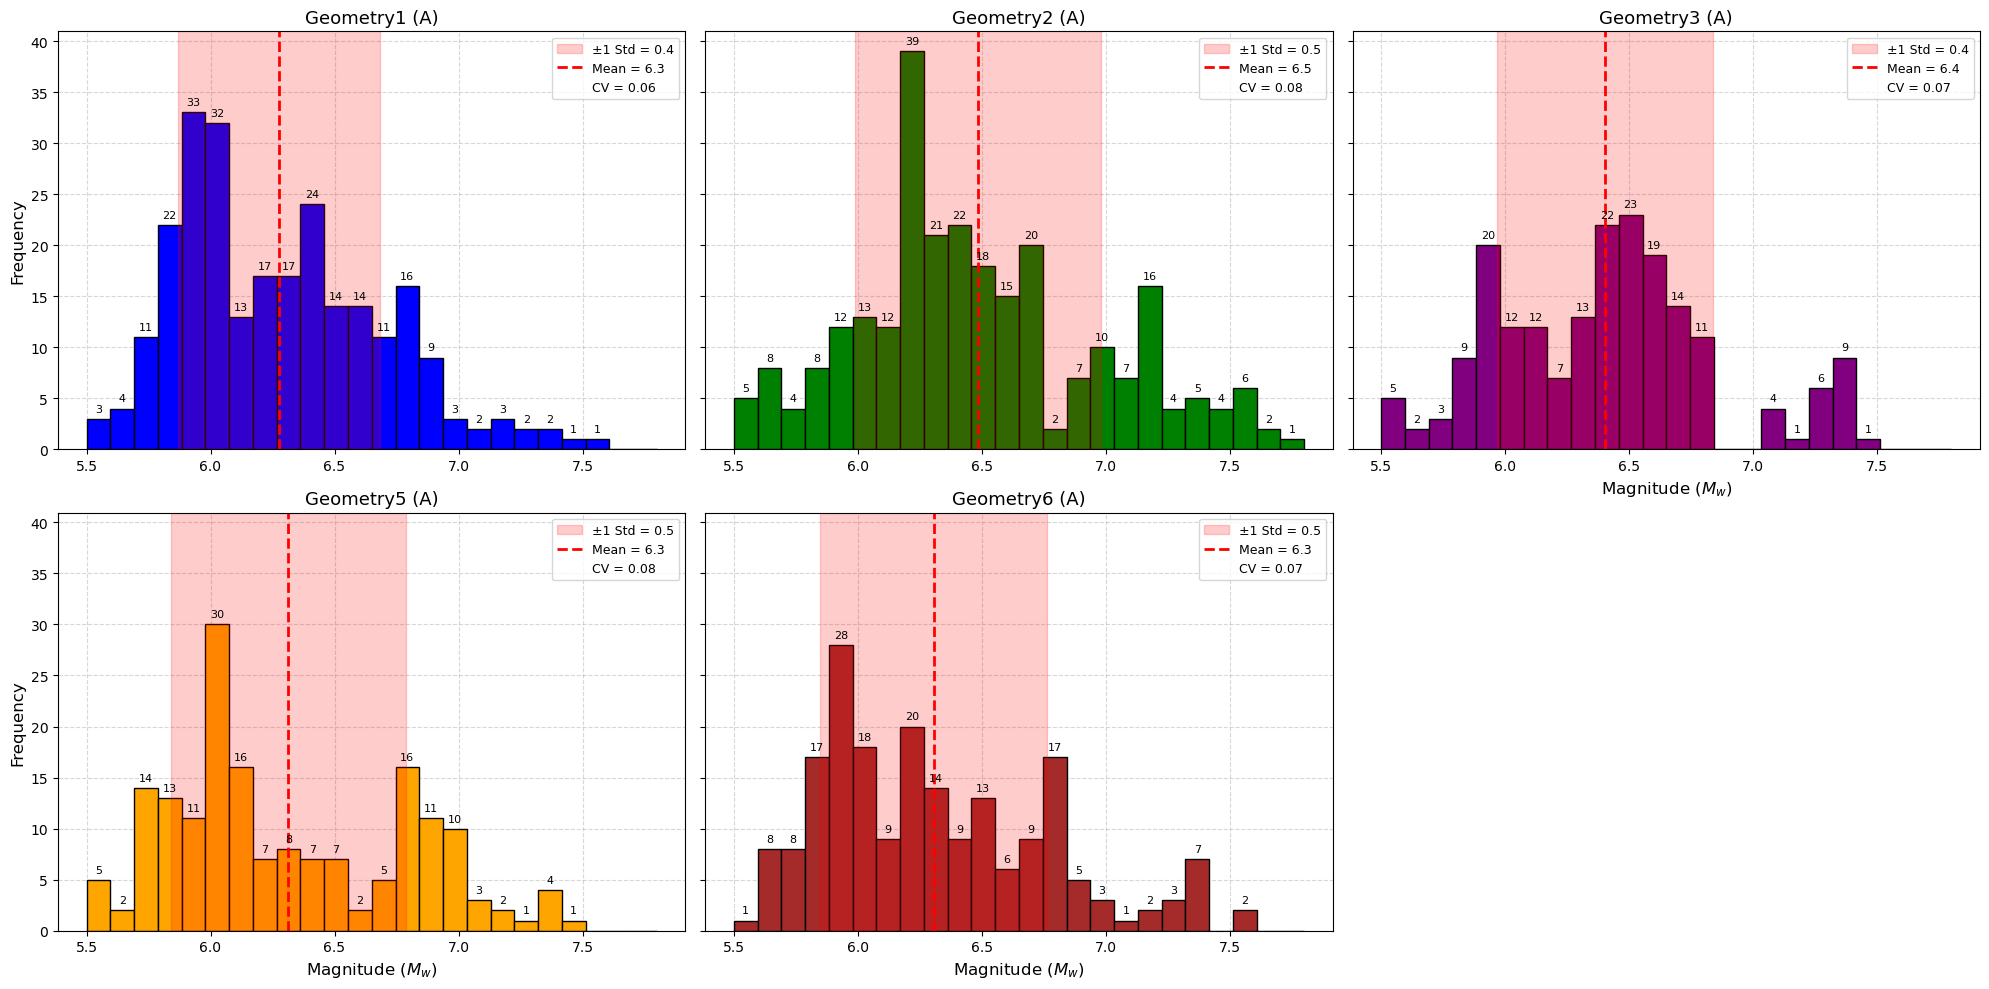

In [181]:
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs123 = [
    (narli_mag1, 'geometry1 (A)', 'blue'),
    (narli_mag2, 'geometry2 (A)', 'green'),
    (narli_mag3, 'geometry3 (A)', 'purple'),
    (narli_mag5, 'geometry5 (A)', 'orange'),
    (narli_mag6, 'geometry6 (A)', 'brown')
    
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs123):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
    ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=9)

if len(catalogs123) < len(axes):
    for i in range(len(catalogs123), len(axes)):
        fig.delaxes(axes[i]) 
        
axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[-3].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
narli_rcrnc1= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl1',  mag_min=5.5, mag_max=7.9)
narli_rcrnc2= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl2',  mag_min=5.5, mag_max=7.9)
narli_rcrnc3= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl3',  mag_min=5.5, mag_max=7.9)
narli_rcrnc5= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl5',  mag_min=5.5, mag_max=7.9)
narli_rcrnc6= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/narli_contrb_mdl6',  mag_min=5.5, mag_max=7.9)

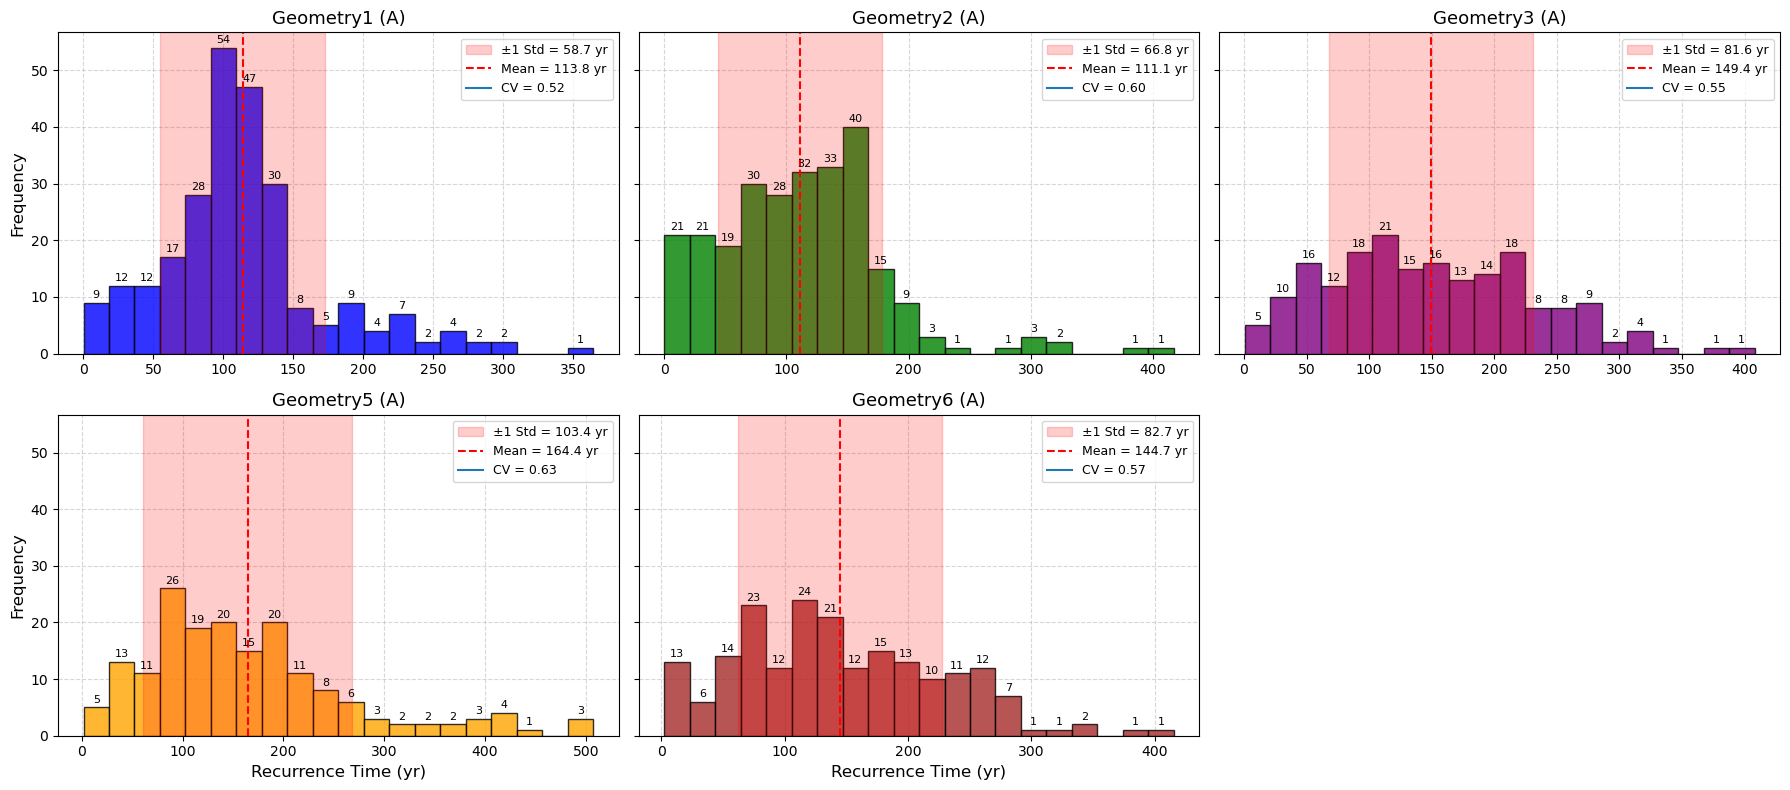

In [52]:
catalogs116 = [
    (narli_rcrnc1, 'Geometry1 (A)', 'blue'),
    (narli_rcrnc2, 'Geometry2 (A)', 'green'),
    (narli_rcrnc3, 'Geometry3 (A)', 'purple'),
    (narli_rcrnc5, 'Geometry5 (A)', 'orange'),
    (narli_rcrnc6, 'Geometry6 (A)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs116):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)

if len(catalogs116) < len(axes):
    for i in range(len(catalogs116), len(axes)):
        fig.delaxes(axes[i])
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


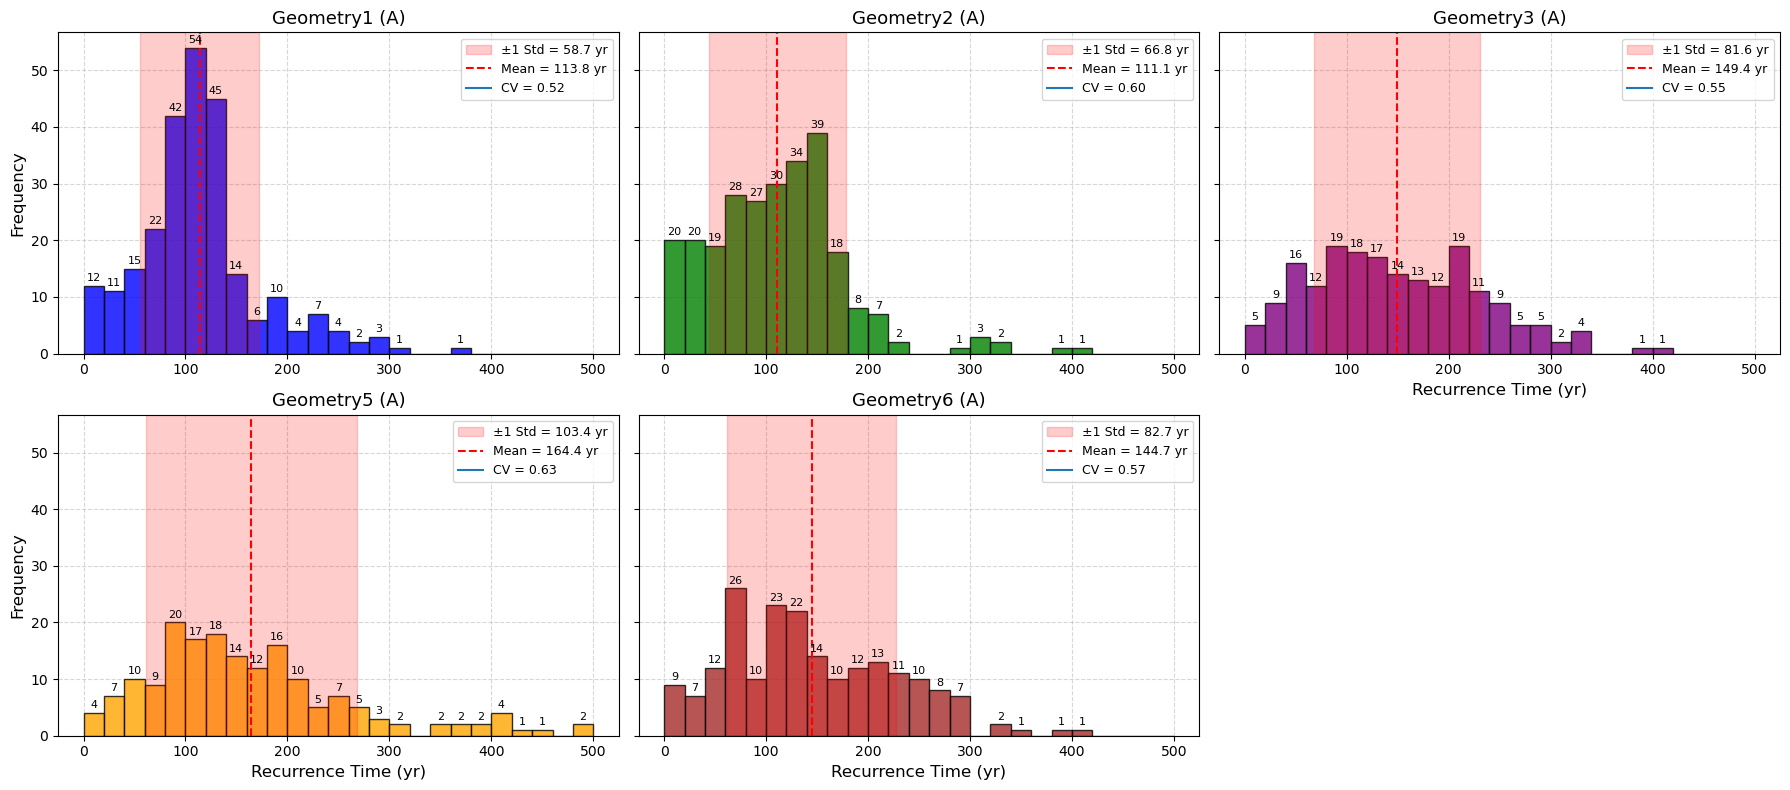

In [53]:
# Define bin settings
bin_min = 0    # For example
bin_max = 500 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs116 = [
    (narli_rcrnc1, 'Geometry1 (A)', 'blue'),
    (narli_rcrnc2, 'Geometry2 (A)', 'green'),
    (narli_rcrnc3, 'Geometry3 (A)', 'purple'),
    (narli_rcrnc5, 'Geometry5 (A)', 'orange'),
    (narli_rcrnc6, 'Geometry6 (A)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs116):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)
    
if len(catalogs116) < len(axes):
    for i in range(len(catalogs116), len(axes)):
        fig.delaxes(axes[i])
        
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


In [46]:
pazar_time1, pazar_mag1 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl1")
pazar_time2, pazar_mag2 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl2")
pazar_time3, pazar_mag3 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl3")
pazar_time5, pazar_mag5 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl5")
pazar_time6, pazar_mag6 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl6")

In [47]:
pazar_rcrnc1= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl1',  mag_min=5.5, mag_max=7.9)
pazar_rcrnc2= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl2',  mag_min=5.5, mag_max=7.9)
pazar_rcrnc3= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl3',  mag_min=5.5, mag_max=7.9)
pazar_rcrnc5= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl5',  mag_min=5.5, mag_max=7.9)
pazar_rcrnc6= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/pazar_contrb_mdl6',  mag_min=5.5, mag_max=7.9)

geometry1 (A) → Bin center: 5.64, Count: 3
geometry1 (A) → Bin center: 5.74, Count: 1
geometry1 (A) → Bin center: 5.84, Count: 1
geometry1 (A) → Bin center: 5.93, Count: 2
geometry1 (A) → Bin center: 6.03, Count: 7
geometry1 (A) → Bin center: 6.12, Count: 9
geometry1 (A) → Bin center: 6.22, Count: 9
geometry1 (A) → Bin center: 6.31, Count: 24
geometry1 (A) → Bin center: 6.41, Count: 40
geometry1 (A) → Bin center: 6.51, Count: 13
geometry1 (A) → Bin center: 6.60, Count: 18
geometry1 (A) → Bin center: 6.70, Count: 17
geometry1 (A) → Bin center: 6.79, Count: 5
geometry1 (A) → Bin center: 6.89, Count: 8
geometry1 (A) → Bin center: 6.99, Count: 13
geometry1 (A) → Bin center: 7.08, Count: 21
geometry1 (A) → Bin center: 7.18, Count: 19
geometry1 (A) → Bin center: 7.27, Count: 18
geometry1 (A) → Bin center: 7.37, Count: 34
geometry1 (A) → Bin center: 7.46, Count: 15
geometry1 (A) → Bin center: 7.56, Count: 5
geometry1 (A) → Bin center: 7.66, Count: 1
geometry2 (A) → Bin center: 5.55, Count: 5


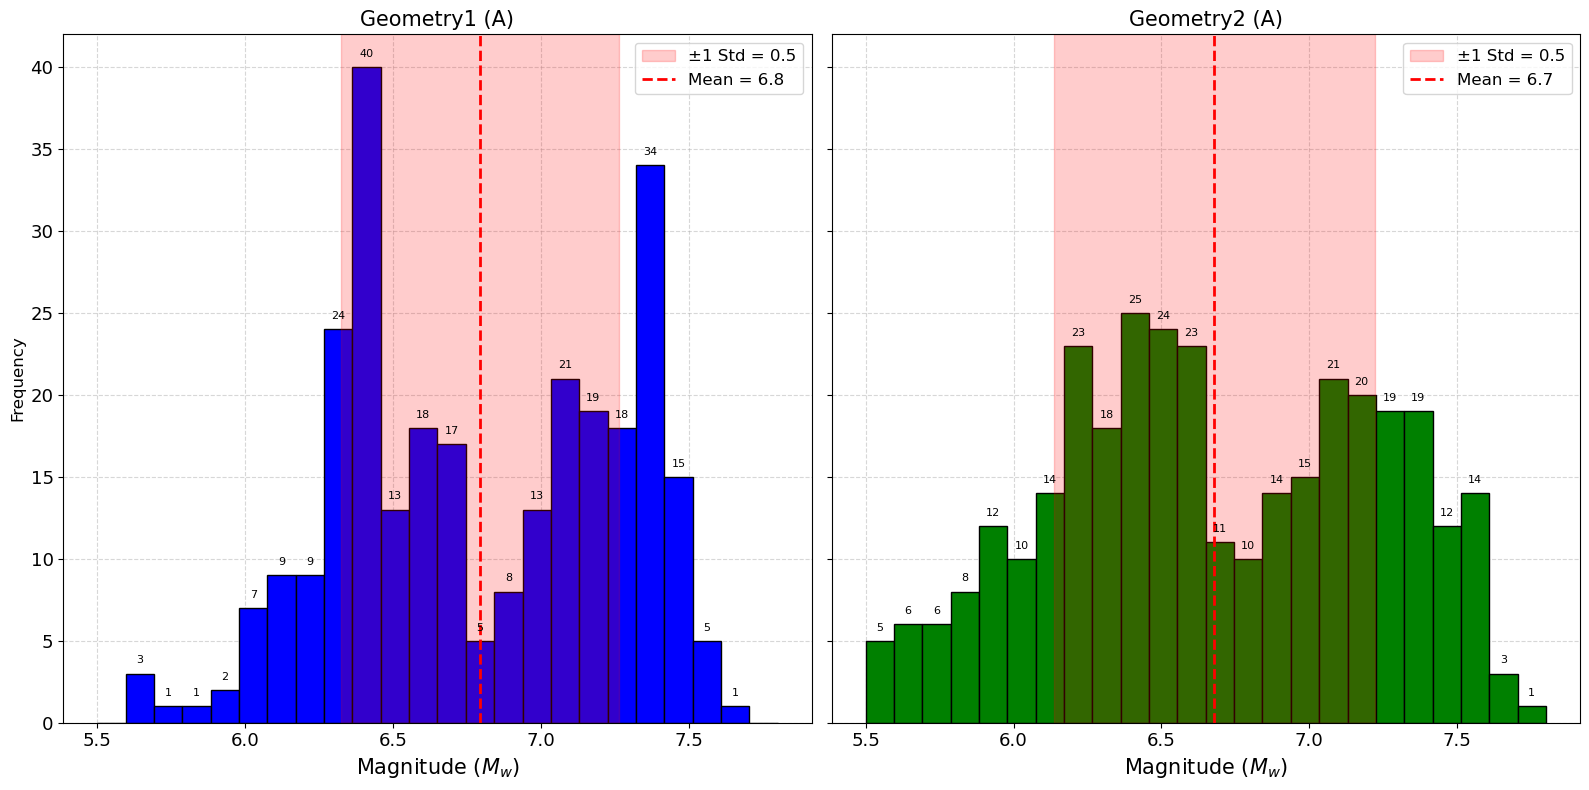

In [95]:
#################### the new A ############################################
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs122 = [
    (pazar_mag1, 'geometry1 (A)', 'blue'),
    (pazar_mag2, 'geometry2 (A)', 'green')
#     (pazar_mag3, 'geometry3 (A)', 'purple'),
#     (pazar_mag5, 'geometry5 (A)', 'orange'),
#     (pazar_mag6, 'geometry6 (A)', 'brown')
    
]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs122):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
#     cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
#     ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=12)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)

if len(catalogs122) < len(axes):
    for i in range(len(catalogs122), len(axes)):
        fig.delaxes(axes[i]) 
        
axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
# axes[2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
# axes[-3].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

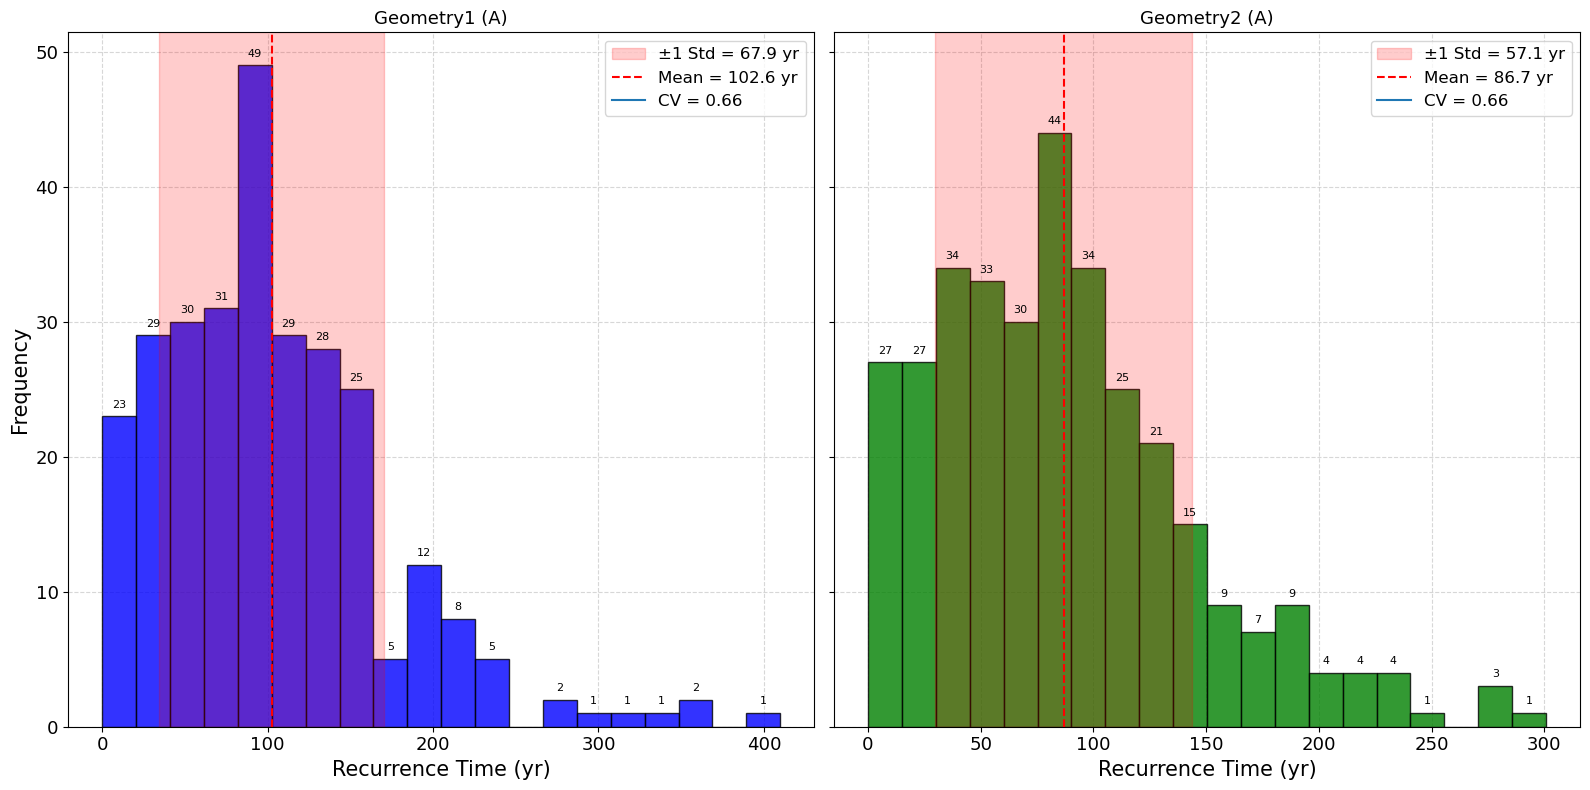

In [96]:
#################### the new A ############################################

catalogs119 = [
    (pazar_rcrnc1, 'Geometry1 (A)', 'blue'),
    (pazar_rcrnc2, 'Geometry2 (A)', 'green'),
#     (pazar_rcrnc3, 'Geometry3 (A)', 'purple'),
#     (pazar_rcrnc5, 'Geometry5 (A)', 'orange'),
#     (pazar_rcrnc6, 'Geometry6 (A)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs119):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)

if len(catalogs119) < len(axes):
    for i in range(len(catalogs119), len(axes)):
        fig.delaxes(axes[i])
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
# axes[3].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
# axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=15)
# axes[2].set_xlabel("Recurrence Time (yr)", fontsize=15)

plt.tight_layout()
plt.show()


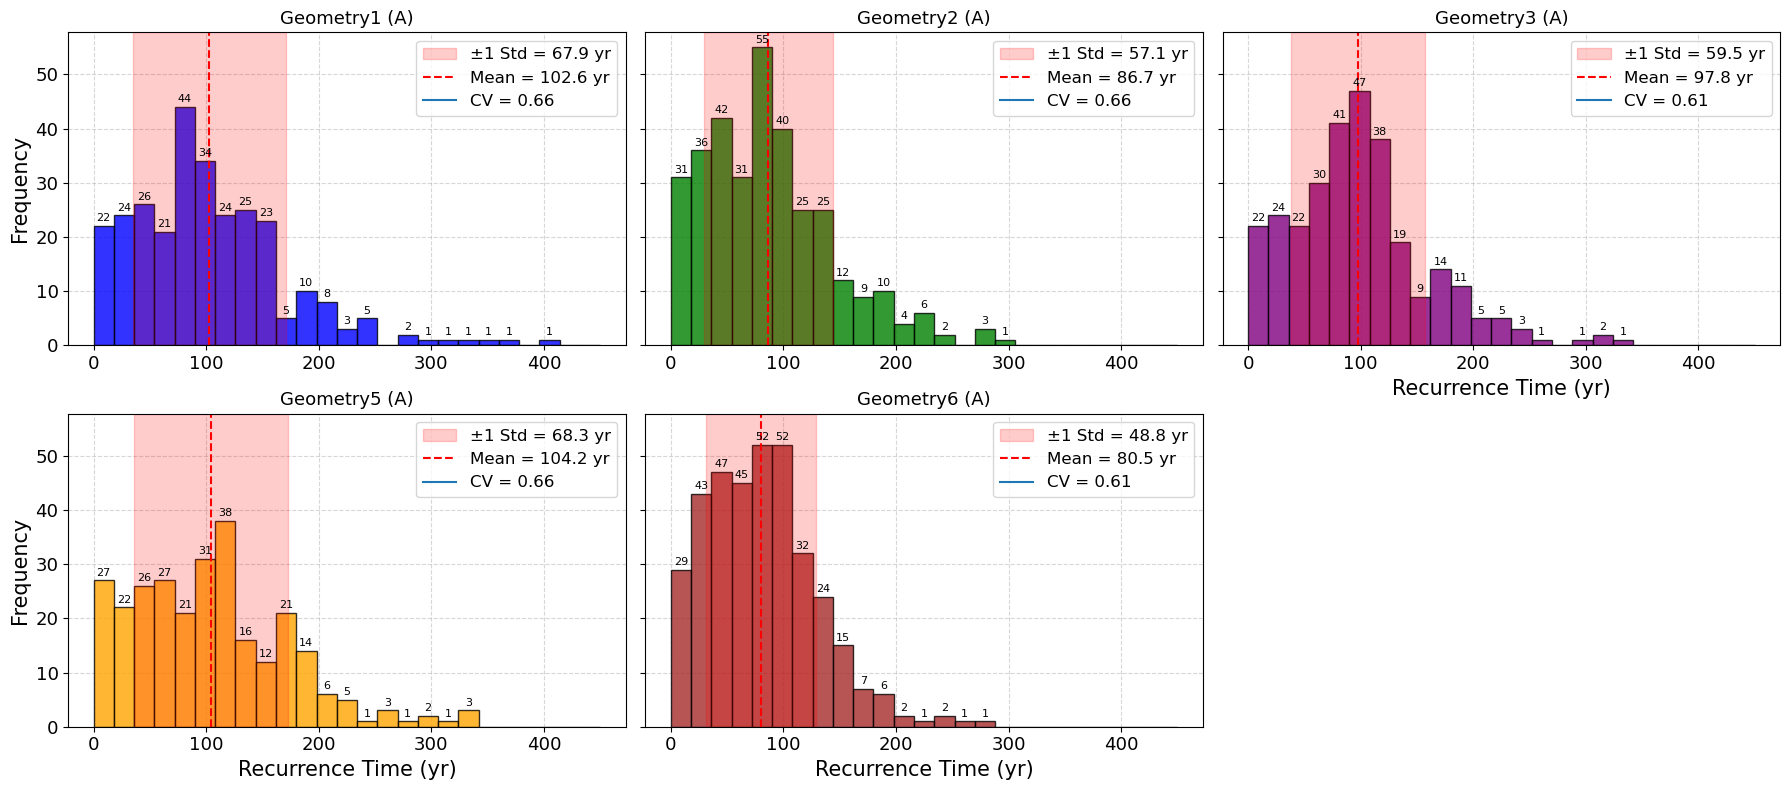

In [24]:
# Define bin settings
bin_min = 0    # For example
bin_max = 450 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs119 = [
    (pazar_rcrnc1, 'Geometry1 (A)', 'blue'),
    (pazar_rcrnc2, 'Geometry2 (A)', 'green'),
    (pazar_rcrnc3, 'Geometry3 (A)', 'purple'),
    (pazar_rcrnc5, 'Geometry5 (A)', 'orange'),
    (pazar_rcrnc6, 'Geometry6 (A)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs119):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    
    
if len(catalogs119) < len(axes):
    for i in range(len(catalogs119), len(axes)):
        fig.delaxes(axes[i])
        
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
axes[3].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=15)

plt.tight_layout()
plt.show()


In [64]:
erken_time1, erken_mag1 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl1")
erken_time2, erken_mag2 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl2")
erken_time3, erken_mag3 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl3")
erken_time5, erken_mag5 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl5")
erken_time6, erken_mag6 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl6")

In [65]:
erken_rcrnc1= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl1',  mag_min=5.5, mag_max=7.9)
erken_rcrnc2= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl2',  mag_min=5.5, mag_max=7.9)
erken_rcrnc3= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl3',  mag_min=5.5, mag_max=7.9)
erken_rcrnc5= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl5',  mag_min=5.5, mag_max=7.9)
erken_rcrnc6= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/erken_contrb_mdl6',  mag_min=5.5, mag_max=7.9)

geometry3 (B) → Bin center: 5.55, Count: 1
geometry3 (B) → Bin center: 5.74, Count: 3
geometry3 (B) → Bin center: 5.84, Count: 9
geometry3 (B) → Bin center: 5.93, Count: 20
geometry3 (B) → Bin center: 6.03, Count: 16
geometry3 (B) → Bin center: 6.12, Count: 9
geometry3 (B) → Bin center: 6.22, Count: 9
geometry3 (B) → Bin center: 6.31, Count: 15
geometry3 (B) → Bin center: 6.41, Count: 26
geometry3 (B) → Bin center: 6.51, Count: 33
geometry3 (B) → Bin center: 6.60, Count: 19
geometry3 (B) → Bin center: 6.70, Count: 14
geometry3 (B) → Bin center: 6.79, Count: 13
geometry3 (B) → Bin center: 6.89, Count: 11
geometry3 (B) → Bin center: 6.99, Count: 8
geometry3 (B) → Bin center: 7.08, Count: 17
geometry3 (B) → Bin center: 7.18, Count: 10
geometry3 (B) → Bin center: 7.27, Count: 22
geometry3 (B) → Bin center: 7.37, Count: 35
geometry3 (B) → Bin center: 7.46, Count: 7
geometry6 (B) → Bin center: 5.55, Count: 2
geometry6 (B) → Bin center: 5.64, Count: 4
geometry6 (B) → Bin center: 5.74, Count: 

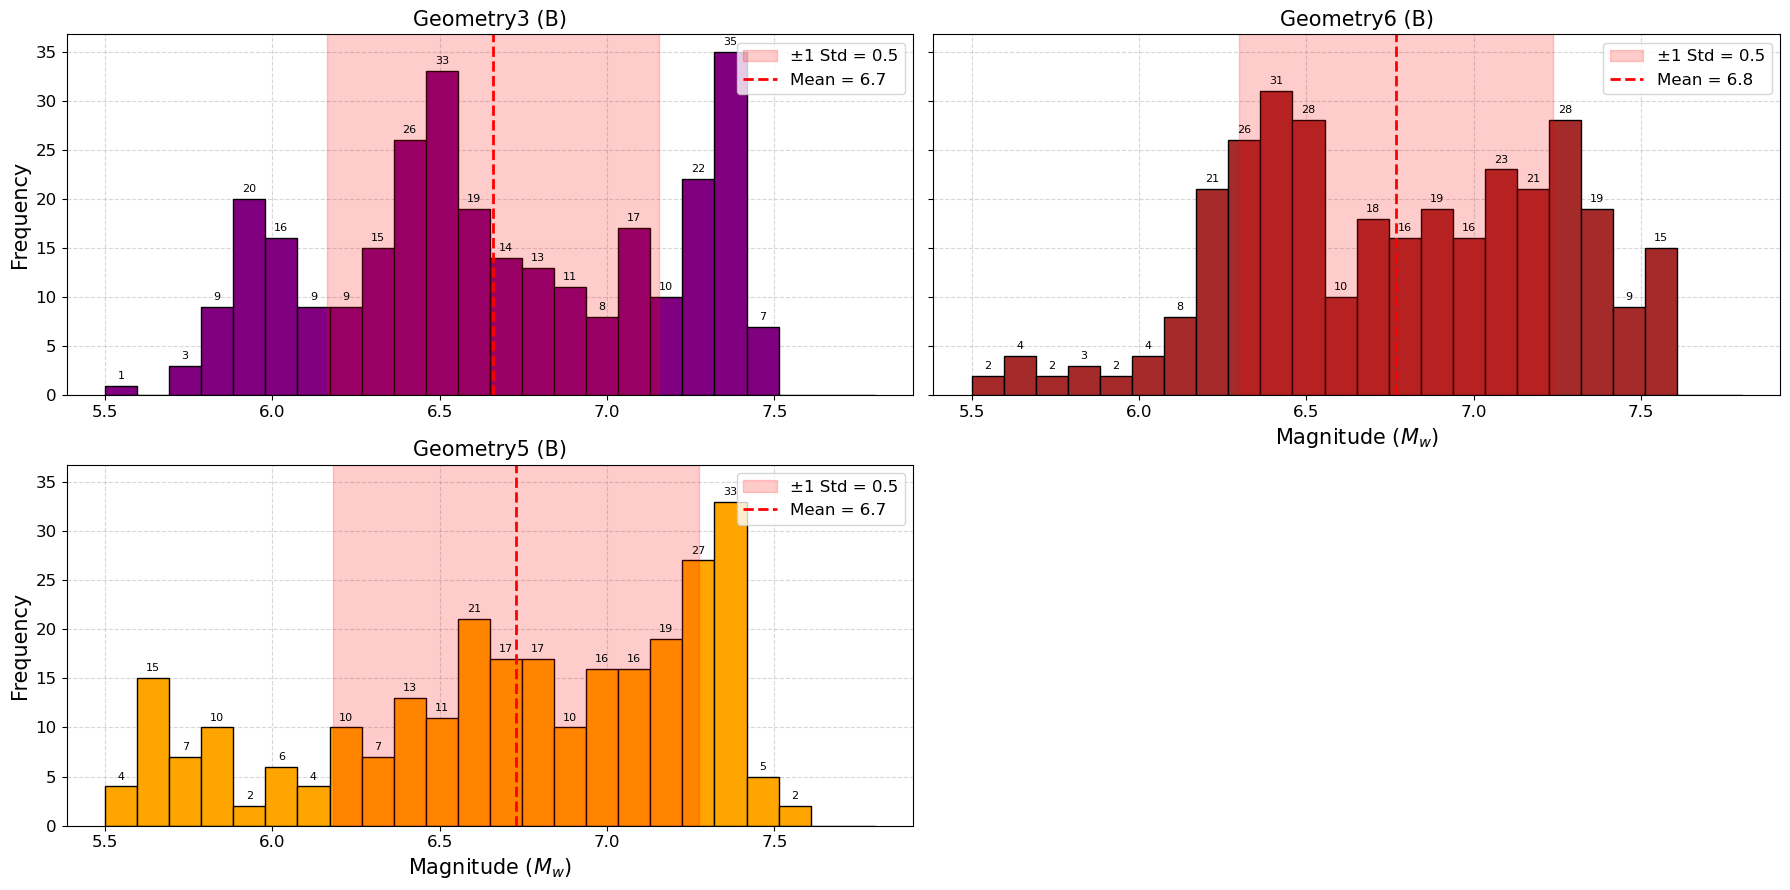

In [86]:
########################################the new B #################################################
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs123 = [
#     (erken_mag1, 'geometry1 (B)', 'blue'),
#     (erken_mag2, 'geometry2 (B)', 'green'),
    (erken_mag3, 'geometry3 (B)', 'purple'),
    (erken_mag6, 'geometry6 (B)', 'brown'),
    (erken_mag5, 'geometry5 (B)', 'orange')
    
    
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs123):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
#     ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

if len(catalogs123) < len(axes):
    for i in range(len(catalogs123), len(axes)):
        fig.delaxes(axes[i]) 
        
# axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)

# axes[0].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[1].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)
# axes[-3].set_ylabel('Frequency', fontsize=15)
axes[-2].set_ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.show()

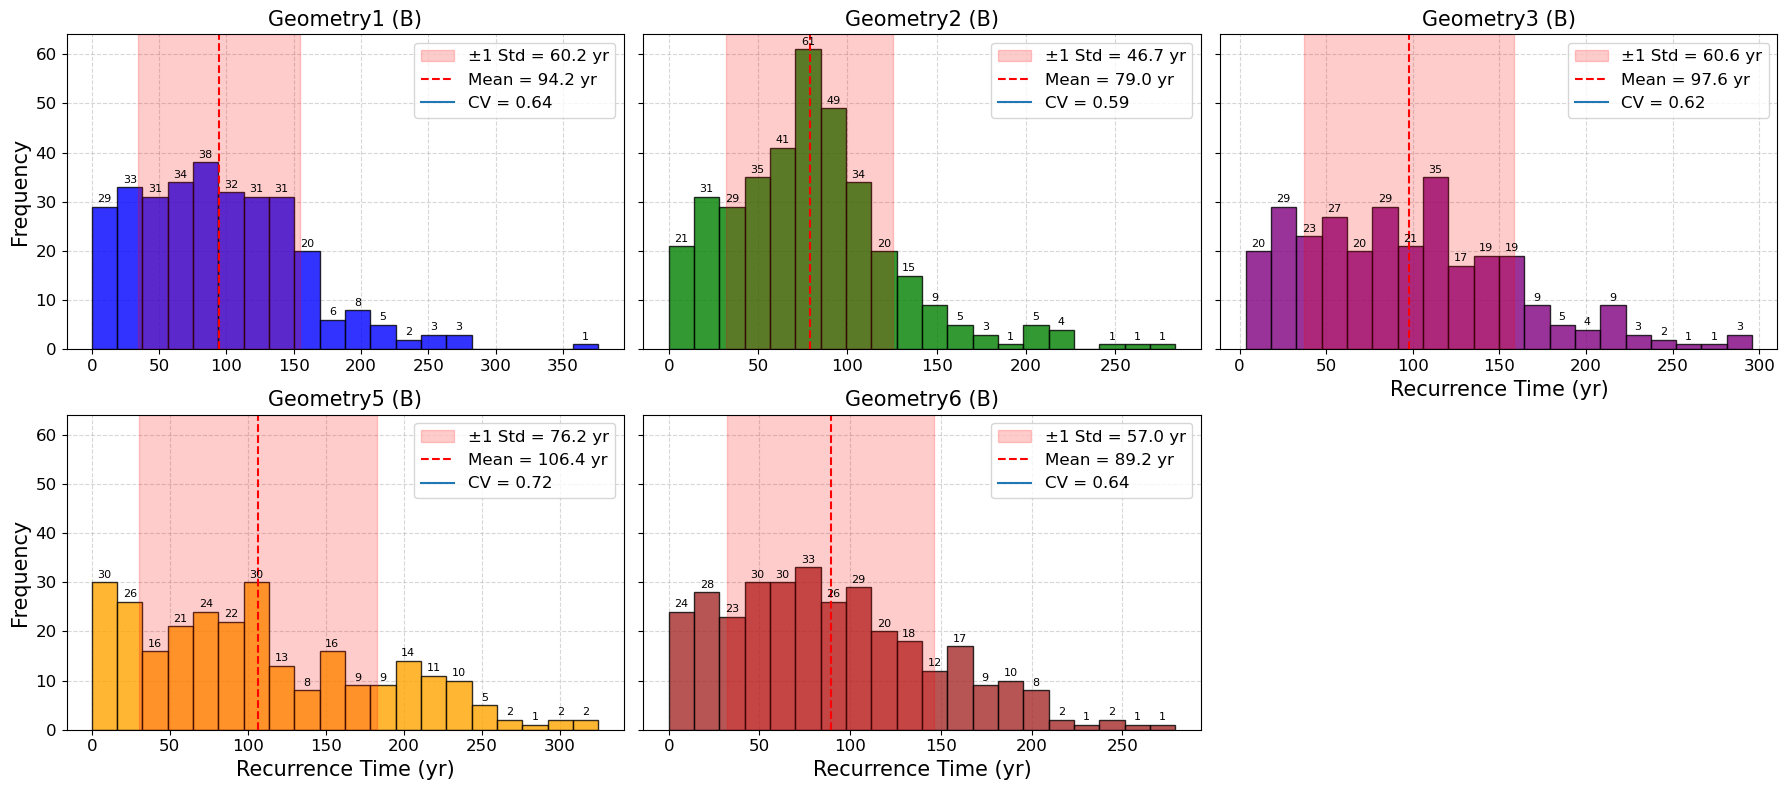

In [171]:
########################################the new B #################################################
catalogs234 = [
    (erken_rcrnc1, 'Geometry1 (B)', 'blue'),
    (erken_rcrnc2, 'Geometry2 (B)', 'green'),
    (erken_rcrnc3, 'Geometry3 (B)', 'purple'),
    (erken_rcrnc5, 'Geometry5 (B)', 'orange'),
    (erken_rcrnc6, 'Geometry6 (B)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs234):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=15)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

if len(catalogs234) < len(axes):
    for i in range(len(catalogs234), len(axes)):
        fig.delaxes(axes[i])
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
axes[3].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=15)

plt.tight_layout()
plt.show()


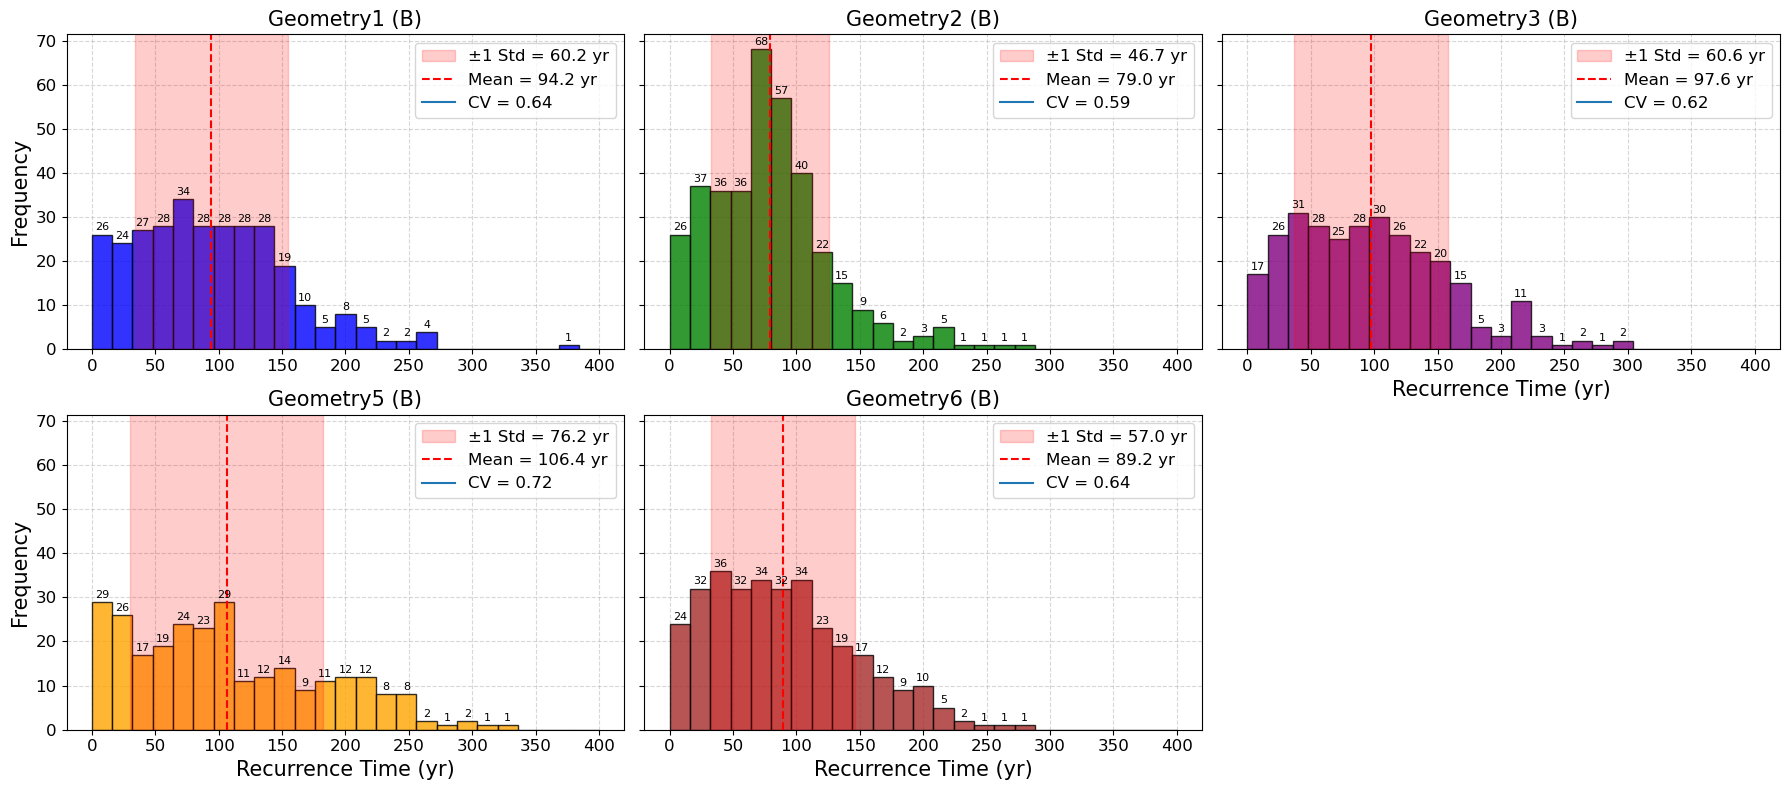

In [173]:
# Define bin settings
bin_min = 0    # For example
bin_max = 400 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs234 = [
    (erken_rcrnc1, 'Geometry1 (B)', 'blue'),
    (erken_rcrnc2, 'Geometry2 (B)', 'green'),
    (erken_rcrnc3, 'Geometry3 (B)', 'purple'),
    (erken_rcrnc5, 'Geometry5 (B)', 'orange'),
    (erken_rcrnc6, 'Geometry6 (B)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs234):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=15)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
if len(catalogs234) < len(axes):
    for i in range(len(catalogs234), len(axes)):
        fig.delaxes(axes[i])
        
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
axes[3].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=15)

plt.tight_layout()
plt.show()


In [87]:
bend_time1, bend_mag1 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl1")
bend_time2, bend_mag2 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl2")
bend_time3, bend_mag3 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl3")
bend_time4, bend_mag4 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl4")
bend_time6, bend_mag6 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl6")

In [88]:
bend_rcrnc1= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl1',  mag_min=5.5, mag_max=7.9)
bend_rcrnc2= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl2',  mag_min=5.5, mag_max=7.9)
bend_rcrnc3= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl3',  mag_min=5.5, mag_max=7.9)
bend_rcrnc4= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl4',  mag_min=5.5, mag_max=7.9)
bend_rcrnc6= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/bend_contrb_mdl6',  mag_min=5.5, mag_max=7.9)

geometry3 (C) → Bin center: 5.55, Count: 3
geometry3 (C) → Bin center: 5.64, Count: 4
geometry3 (C) → Bin center: 5.74, Count: 8
geometry3 (C) → Bin center: 5.84, Count: 5
geometry3 (C) → Bin center: 5.93, Count: 4
geometry3 (C) → Bin center: 6.03, Count: 5
geometry3 (C) → Bin center: 6.12, Count: 5
geometry3 (C) → Bin center: 6.22, Count: 3
geometry3 (C) → Bin center: 6.31, Count: 2
geometry3 (C) → Bin center: 6.41, Count: 4
geometry3 (C) → Bin center: 6.51, Count: 3
geometry3 (C) → Bin center: 6.60, Count: 2
geometry3 (C) → Bin center: 6.70, Count: 3
geometry3 (C) → Bin center: 6.79, Count: 4
geometry3 (C) → Bin center: 6.89, Count: 6
geometry3 (C) → Bin center: 6.99, Count: 4
geometry3 (C) → Bin center: 7.08, Count: 1
geometry3 (C) → Bin center: 7.37, Count: 1
geometry3 (C) → Bin center: 7.46, Count: 1
geometry4 (C) → Bin center: 5.55, Count: 4
geometry4 (C) → Bin center: 5.64, Count: 10
geometry4 (C) → Bin center: 5.74, Count: 12
geometry4 (C) → Bin center: 5.84, Count: 6
geometry4

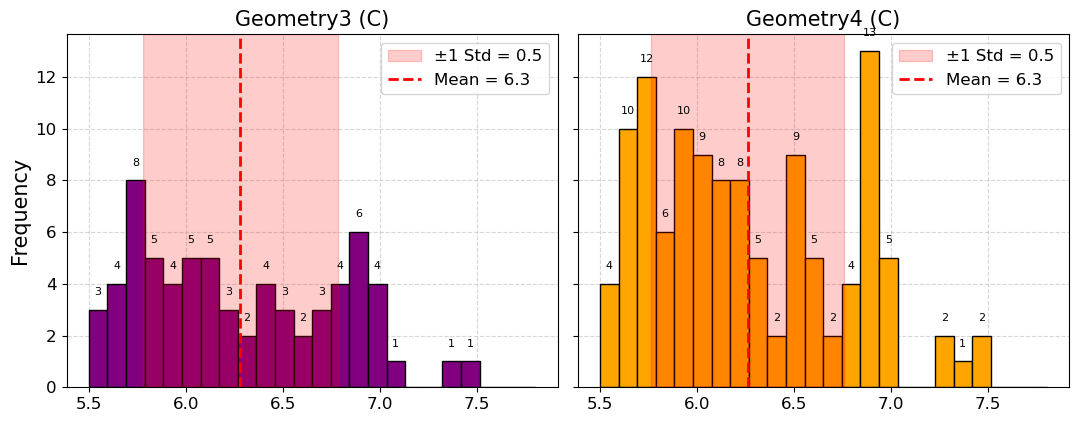

In [93]:
##############################the new c#########################################################
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs124 = [
#     (bend_mag1, 'geometry1 (C)', 'blue'),
#     (bend_mag2, 'geometry2 (C)', 'green'),
    (bend_mag3, 'geometry3 (C)', 'purple'),
    (bend_mag4, 'geometry4 (C)', 'orange')
#     (bend_mag6, 'geometry6 (C)', 'brown')
    
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs124):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
#     ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=15)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

if len(catalogs124) < len(axes):
    for i in range(len(catalogs124), len(axes)):
        fig.delaxes(axes[i]) 
        
axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
# axes[2].set_xlabel('Magnitude ($M_{w}$)', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)
# axes[-3].set_ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.show()

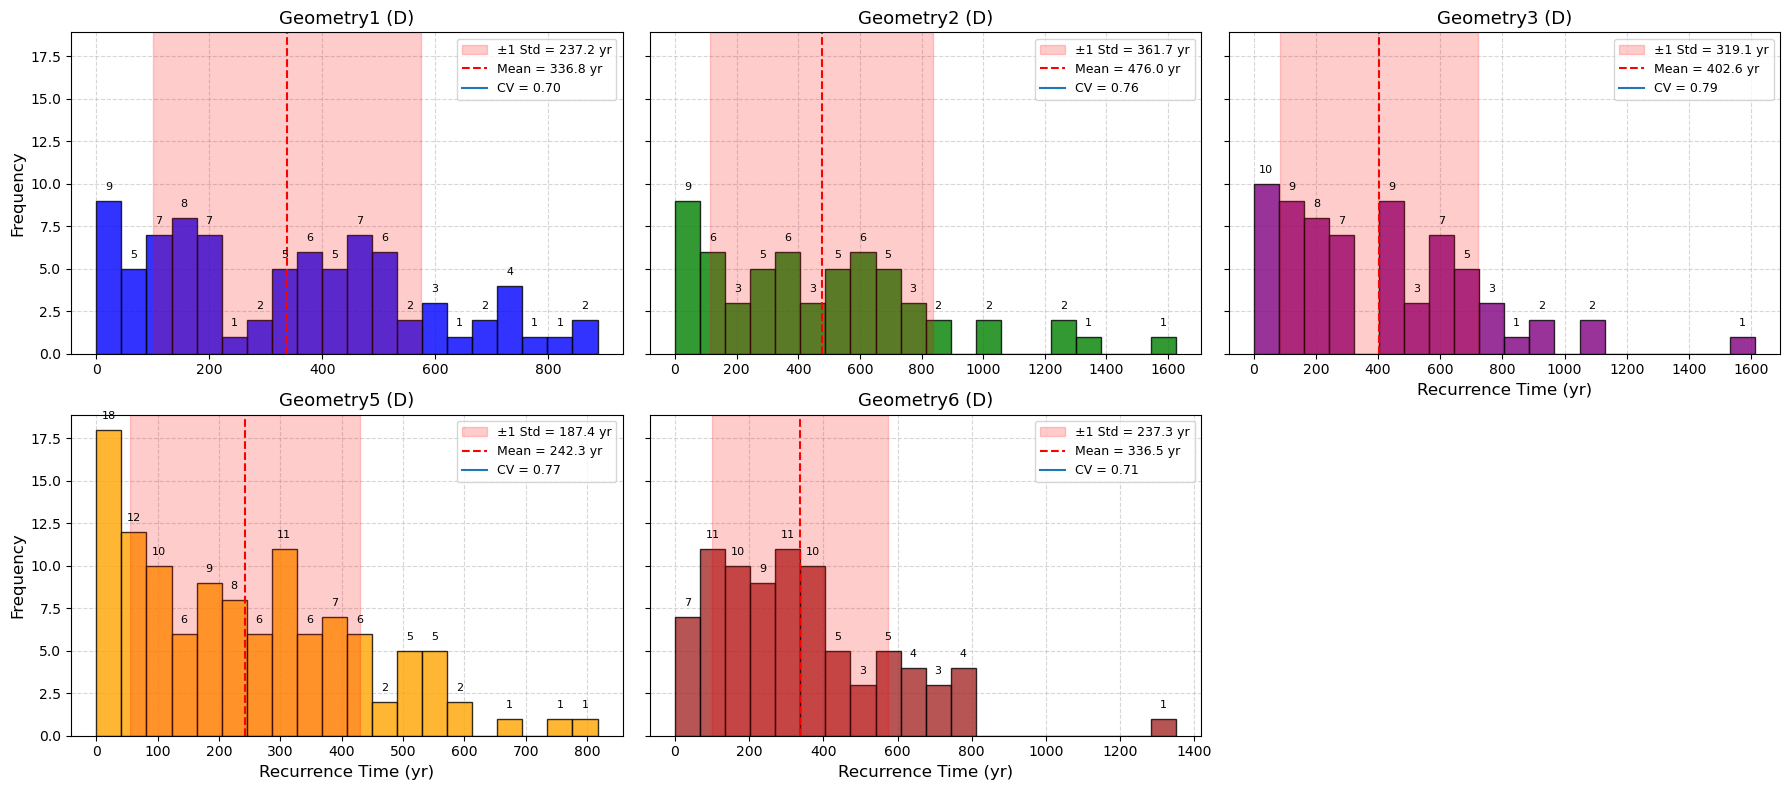

In [67]:
catalogs126 = [
    (bend_rcrnc1, 'Geometry1 (D)', 'blue'),
    (bend_rcrnc2, 'Geometry2 (D)', 'green'),
    (bend_rcrnc3, 'Geometry3 (D)', 'purple'),
    (bend_rcrnc4, 'Geometry5 (D)', 'orange'),
    (bend_rcrnc6, 'Geometry6 (D)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs126):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)

if len(catalogs126) < len(axes):
    for i in range(len(catalogs126), len(axes)):
        fig.delaxes(axes[i])
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


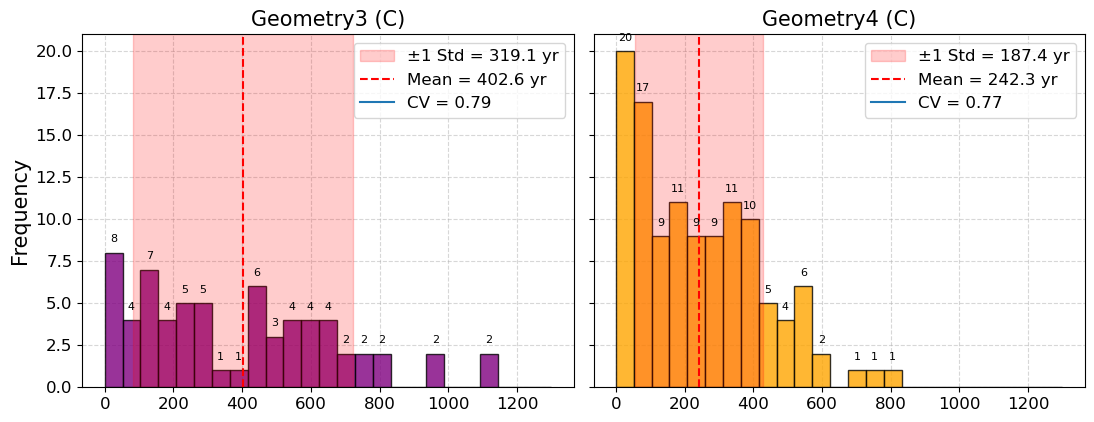

In [94]:
# Define bin settings
bin_min = 0    # For example
bin_max = 1300 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs126 = [
#     (bend_rcrnc1, 'Geometry1 (C)', 'blue'),
#     (bend_rcrnc2, 'Geometry2 (C)', 'green'),
    (bend_rcrnc3, 'Geometry3 (C)', 'purple'),
    (bend_rcrnc4, 'Geometry4 (C)', 'orange')
#     (bend_rcrnc6, 'Geometry6 (C)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs126):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=15)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
if len(catalogs126) < len(axes):
    for i in range(len(catalogs126), len(axes)):
        fig.delaxes(axes[i])
        
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=15)
# axes[3].set_ylabel("Frequency", fontsize=15)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=15)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=15)
# axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=15)
# axes[2].set_xlabel("Recurrence Time (yr)", fontsize=15)

plt.tight_layout()
plt.show()


In [69]:
card_time1, card_mag1 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl1")
card_time2, card_mag2 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl2")
card_time3, card_mag3 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl3")
card_time4, card_mag4 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl4")
card_time6, card_mag6 = load_cat_short("C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl6")

In [70]:
card_rcrnc1= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl1',  mag_min=5.5, mag_max=7.9)
card_rcrnc2= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl2',  mag_min=5.5, mag_max=7.9)
card_rcrnc3= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl3',  mag_min=5.5, mag_max=7.9)
card_rcrnc4= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl4',  mag_min=5.5, mag_max=7.9)
card_rcrnc6= load_rcrnc_tms_stats_short('C:/Users/saram/MCQsim cat anlyss/results/card_contrb_mdl6',  mag_min=5.5, mag_max=7.9)

geometry1 (E) → Bin center: 5.55, Count: 4
geometry1 (E) → Bin center: 5.64, Count: 4
geometry1 (E) → Bin center: 5.74, Count: 3
geometry1 (E) → Bin center: 5.84, Count: 1
geometry1 (E) → Bin center: 5.93, Count: 1
geometry1 (E) → Bin center: 6.03, Count: 2
geometry1 (E) → Bin center: 6.12, Count: 5
geometry1 (E) → Bin center: 6.22, Count: 5
geometry1 (E) → Bin center: 6.31, Count: 10
geometry1 (E) → Bin center: 6.41, Count: 9
geometry1 (E) → Bin center: 6.51, Count: 7
geometry1 (E) → Bin center: 6.60, Count: 10
geometry1 (E) → Bin center: 6.70, Count: 7
geometry1 (E) → Bin center: 6.79, Count: 5
geometry1 (E) → Bin center: 6.89, Count: 3
geometry1 (E) → Bin center: 6.99, Count: 2
geometry1 (E) → Bin center: 7.08, Count: 4
geometry1 (E) → Bin center: 7.18, Count: 7
geometry1 (E) → Bin center: 7.27, Count: 8
geometry1 (E) → Bin center: 7.37, Count: 8
geometry1 (E) → Bin center: 7.46, Count: 2
geometry1 (E) → Bin center: 7.56, Count: 1
geometry1 (E) → Bin center: 7.66, Count: 2
geometry2

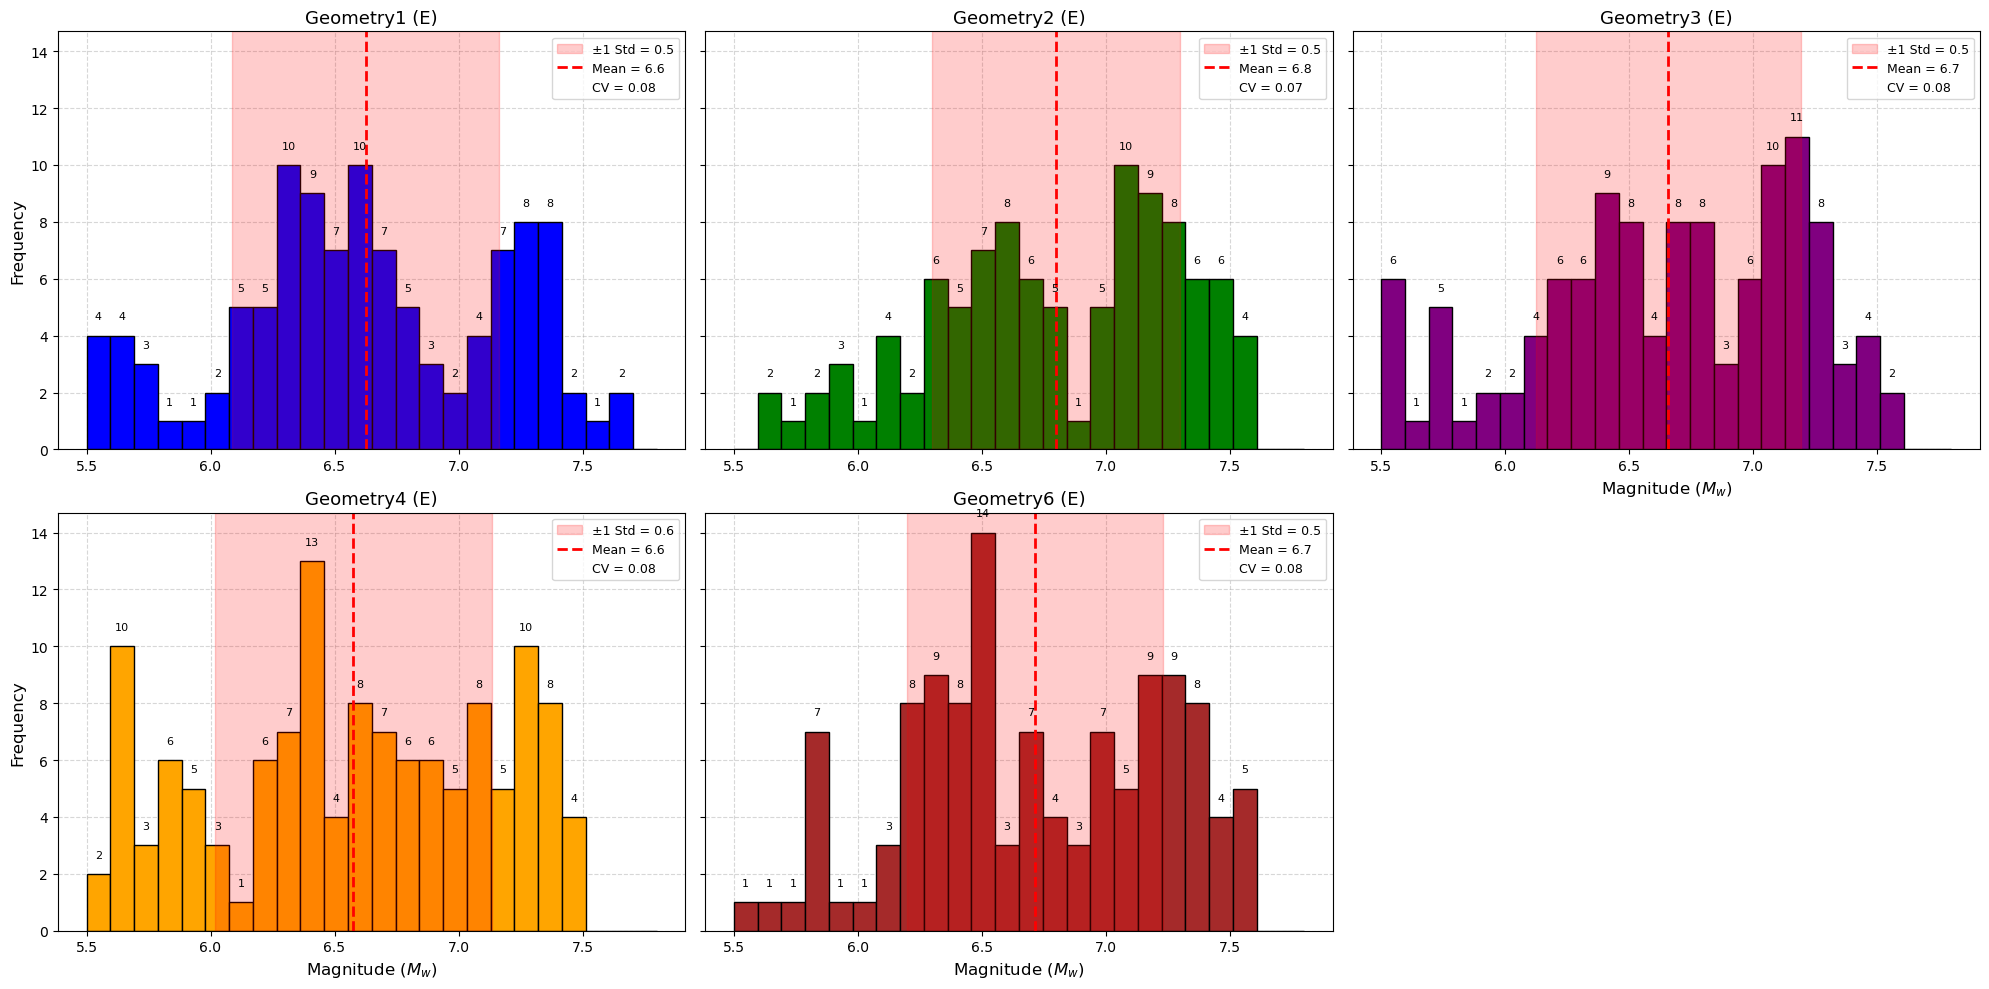

In [71]:
bin_min = 5.5
bin_max = 7.8
bin_count = 25
bins = np.linspace(bin_min, bin_max, bin_count)

catalogs223 = [
    (card_mag1, 'geometry1 (E)', 'blue'),
    (card_mag2, 'geometry2 (E)', 'green'),
    (card_mag3, 'geometry3 (E)', 'purple'),
    (card_mag4, 'geometry4 (E)', 'orange'),
    (card_mag6, 'geometry6 (E)', 'brown')
    
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs223):
    # Filter data based on bin range
    data_filtered = data[(data >= bin_min) & (data <= bin_max)]

    # Plot histogram and get bin data
    counts, edges, _ = ax.hist(data_filtered, bins=bins, edgecolor='black', color=color)

    # Compute bin centers
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Annotate non-zero bars
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)
            print(f"{label} → Bin center: {x:.2f}, Count: {int(y)}")

    # Calculate stats on filtered data
    mean_val = np.mean(data_filtered)
    std_val = np.std(data_filtered)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    # Plot stats
    ax.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2,
               label=f'±1 Std = {std_val:.1f}')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
               label=f'Mean = {mean_val:.1f}')
    ax.plot([], [], color='none', label=f'CV = {cv_val:.2f}')

    # Axis and label styling
    ax.set_title(label.title(), fontsize=13)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', fontsize=9)

if len(catalogs223) < len(axes):
    for i in range(len(catalogs223), len(axes)):
        fig.delaxes(axes[i]) 
        
axes[-1].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[-3].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[2].set_xlabel('Magnitude ($M_{w}$)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[-3].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

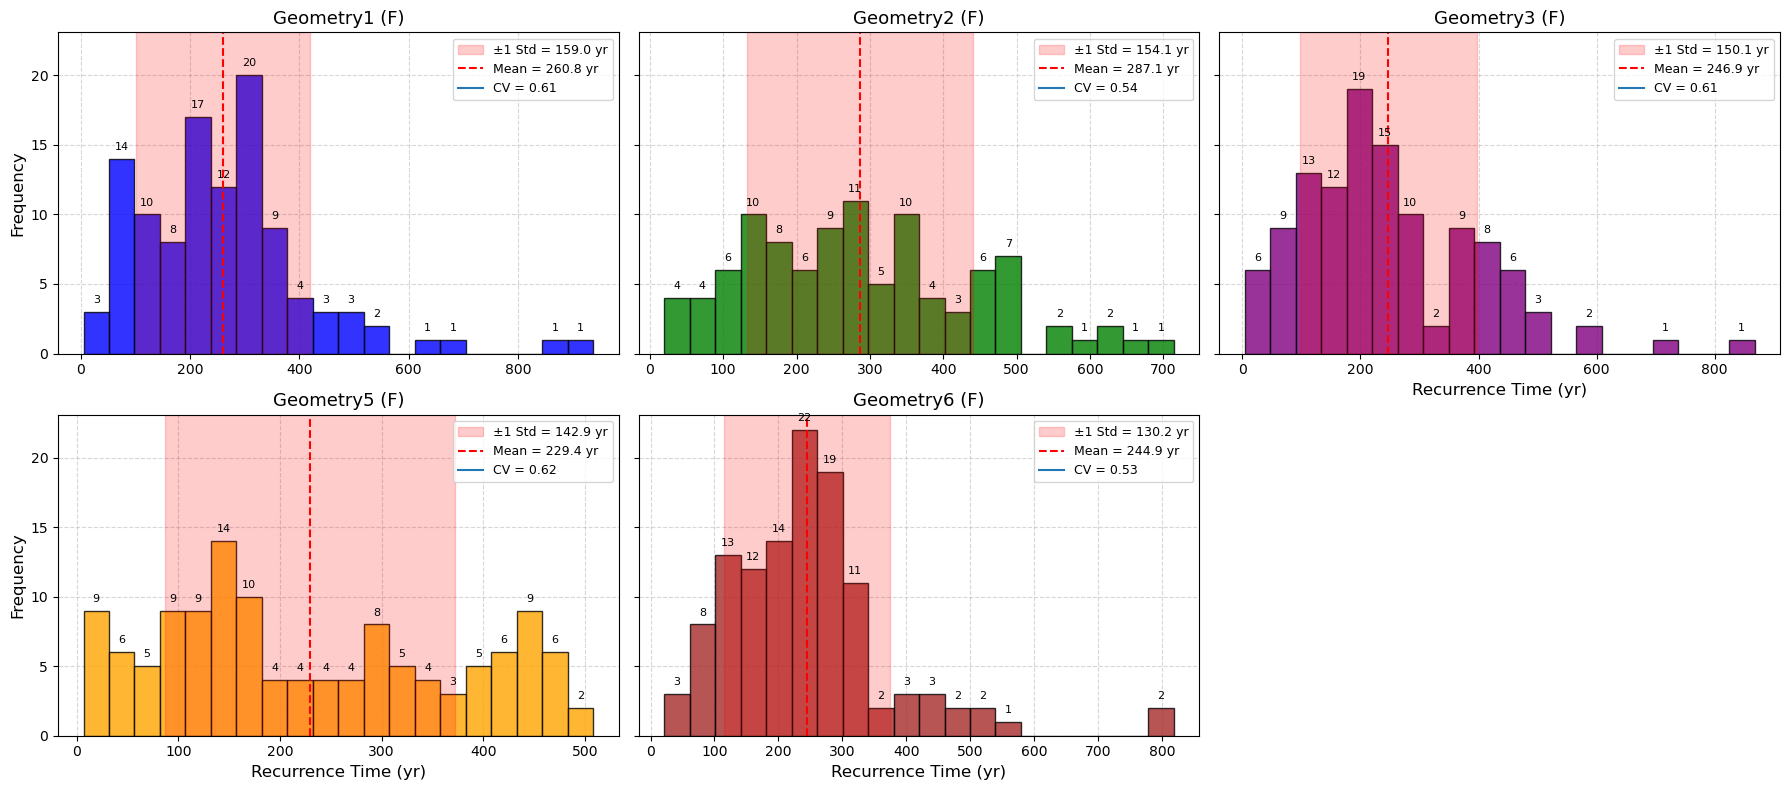

In [72]:
catalogs166 = [
    (card_rcrnc1, 'Geometry1 (F)', 'blue'),
    (card_rcrnc2, 'Geometry2 (F)', 'green'),
    (card_rcrnc3, 'Geometry3 (F)', 'purple'),
    (card_rcrnc4, 'Geometry5 (F)', 'orange'),
    (card_rcrnc6, 'Geometry6 (F)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs166):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram
    counts, bins, bars = ax.hist(rec_time, bins=20, edgecolor='black', color=color, alpha=0.8)

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)

if len(catalogs166) < len(axes):
    for i in range(len(catalogs166), len(axes)):
        fig.delaxes(axes[i])
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


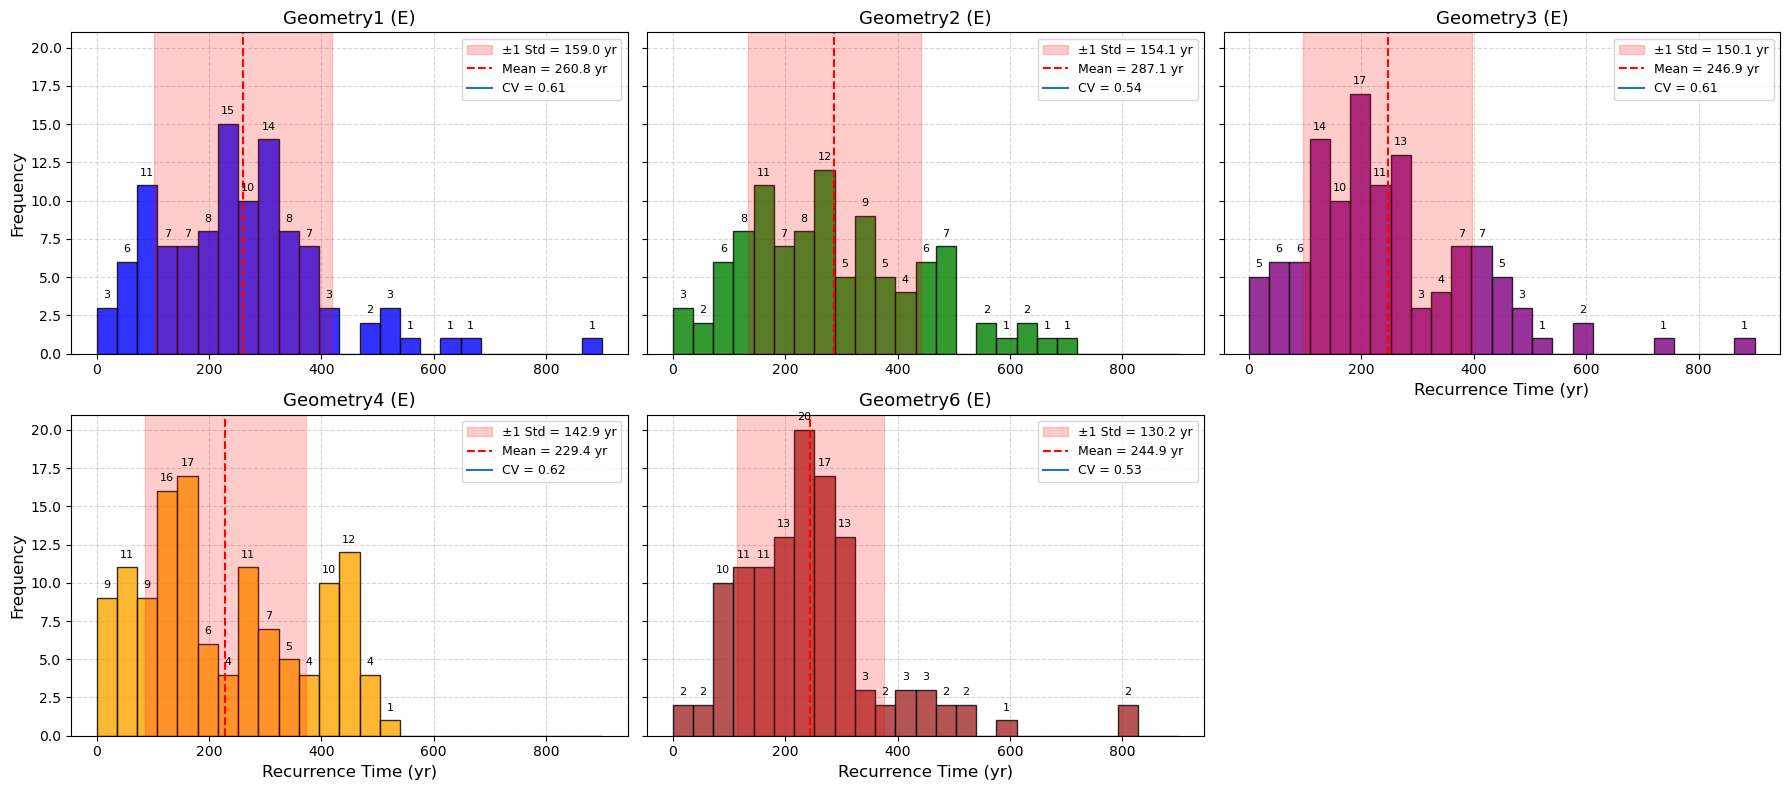

In [73]:
# Define bin settings
bin_min = 0    # For example
bin_max = 900 # For example
bin_count = 25 # Number of bins

# Build bin edges manually
bin_edges = np.linspace(bin_min, bin_max, bin_count + 1)


catalogs166 = [
    (card_rcrnc1, 'Geometry1 (E)', 'blue'),
    (card_rcrnc2, 'Geometry2 (E)', 'green'),
    (card_rcrnc3, 'Geometry3 (E)', 'purple'),
    (card_rcrnc4, 'Geometry4 (E)', 'orange'),
    (card_rcrnc6, 'Geometry6 (E)', 'brown')
    
]

# Subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for ax, (data, label, color) in zip(axes, catalogs166):
    rec_time = data['recurrence_times']
    mean = data['mean']
    std = data['std']
    cv = data['cv']

    # Plot histogram with manual bins
    counts, bins, bars = ax.hist(
        rec_time, 
        bins=bin_edges, 
        edgecolor='black', 
        color=color, 
        alpha=0.8
    )

    # Annotate frequencies above bars
    bin_centers = (bins[:-1] + bins[1:]) / 2
    for x, y in zip(bin_centers, counts):
        if y > 0:
            ax.text(x, y + 0.5, f"{int(y)}", ha='center', va='bottom', fontsize=8)

    # Plot statistical annotations
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1 Std = {std:.1f} yr')
    ax.axvline(mean, color='red', linestyle='--', label=f"Mean = {mean:.1f} yr")
    ax.plot([], [], label=f"CV = {cv:.2f}")  # Dummy plot for CV

    # Labels and grid
    ax.set_title(label, fontsize=13)
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9)
    
if len(catalogs166) < len(axes):
    for i in range(len(catalogs166), len(axes)):
        fig.delaxes(axes[i])
        
# Shared axis labels
axes[0].set_ylabel("Frequency", fontsize=12)
axes[3].set_ylabel("Frequency", fontsize=12)
axes[-1].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-2].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[-3].set_xlabel("Recurrence Time (yr)", fontsize=12)
axes[2].set_xlabel("Recurrence Time (yr)", fontsize=12)

plt.tight_layout()
plt.show()


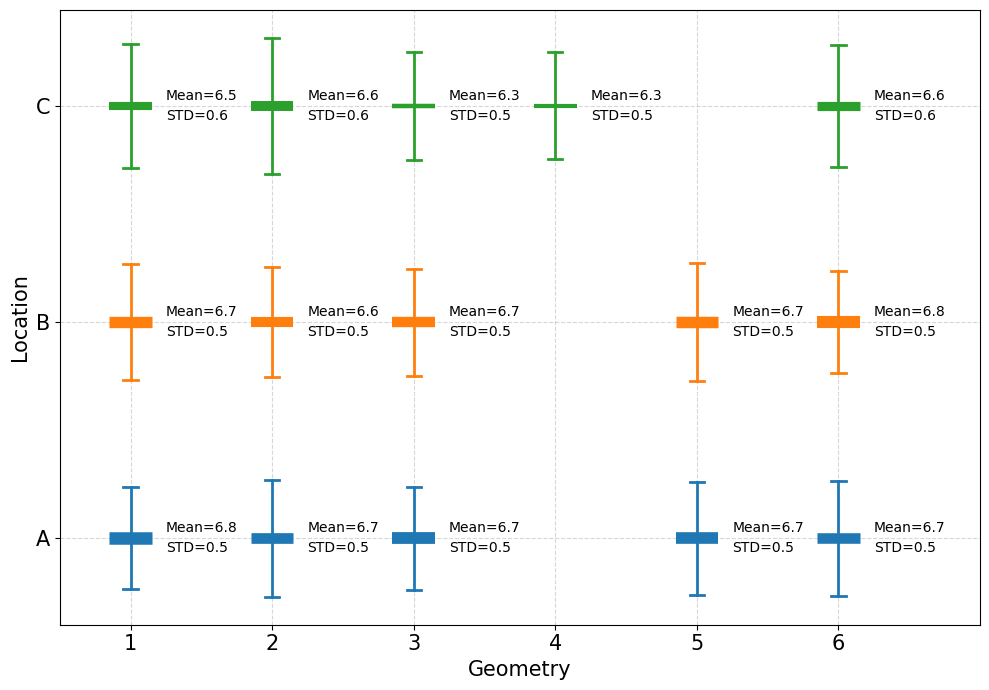

In [155]:
# now A is Pazarcik, B is Erkenek, C is the bend 

catalogs = {
    ("A", 1): pazar_mag1,
    ("A", 2): pazar_mag2,
    ("A", 3): pazar_mag3,
    ("A", 5): pazar_mag5,
    ("A", 6): pazar_mag6,
    
    ("B", 1): erken_mag1,
    ("B", 2): erken_mag2,
    ("B", 3): erken_mag3,
    ("B", 5): erken_mag5,
    ("B", 6): erken_mag6,
    
    ("C", 1): bend_mag1,
    ("C", 2): bend_mag2,
    ("C", 3): bend_mag3,
    ("C", 4): bend_mag4,
    ("C", 6): bend_mag6,
}

# Location mapping
location_map = {"A": 1, "B": 3, "C": 5}

# Prepare lists for plotting
geom_list = []
loc_list = []
mean_list = []
std_list = []
cv_list = []

# Calculate mean, std, cv
for (loc_label, geom), mags in catalogs.items():
    mean_mag = np.mean(mags)
    std_mag = np.std(mags)
    cv_mag = std_mag / mean_mag if mean_mag != 0 else np.nan

    geom_list.append(geom)
    loc_list.append(location_map[loc_label])
    mean_list.append(mean_mag)
    std_list.append(std_mag)
    cv_list.append(cv_mag)

# Convert to arrays
geom_list = np.array(geom_list)
loc_list = np.array(loc_list)
mean_list = np.array(mean_list)
std_list = np.array(std_list)
cv_list = np.array(cv_list)

# Normalize mean values for horizontal line width scaling
mean_min = np.min(mean_list)
mean_max = np.max(mean_list)
mean_norm = (mean_list - mean_min) / (mean_max - mean_min)  # 0 to 1
line_widths = 3 + mean_norm * 6  # Scale between 3 and 9 (a bit thicker)


fig, ax = plt.subplots(figsize=(10, 7))

# Color map for locations
colors = {1: "tab:blue", 3: "tab:orange", 5: "tab:green"}

# Plot short horizontal lines (mean scaled by value) + T error bars
for geom, loc, mean_mag, std_mag, cv_mag, lw in zip(geom_list, loc_list, mean_list, std_list, cv_list, line_widths):
    color = colors[loc]
    
    # Draw horizontal line with thickness based on mean value
    ax.hlines(loc, geom - 0.15, geom + 0.15, color=color, linewidth=lw)
    
    # Draw T-style error bars
    # Upper T
    ax.plot([geom - 0.05, geom + 0.05], [loc + std_mag, loc + std_mag], color=color, linewidth=2)
    ax.plot([geom, geom], [loc, loc + std_mag], color=color, linewidth=2)
    # Lower T
    ax.plot([geom - 0.05, geom + 0.05], [loc - std_mag, loc - std_mag], color=color, linewidth=2)
    ax.plot([geom, geom], [loc, loc - std_mag], color=color, linewidth=2)
    
    # Add text for Mean, Std and CV stacked vertically
    ax.text(geom + 0.25, loc, f"Mean={mean_mag:.1f}\nSTD={std_mag:.1f}", 
        fontsize=10, va='center', ha='left', linespacing=1.6)

# Set axis labels (no title as you requested)
ax.set_xlabel("Geometry", fontsize=15)
ax.set_ylabel("Location", fontsize=15)

# Set ticks
ax.set_xticks(np.arange(1, 7))
ax.set_yticks([1, 3, 5])
ax.set_yticklabels(["A", "B", "C"], fontsize=15)
ax.tick_params(axis='x', labelsize=15)


ax.grid(True, linestyle='--', alpha=0.5)

# Add margin to the right of geometry 6
ax.set_xlim(0.5, 7.0)

plt.tight_layout()
plt.show()

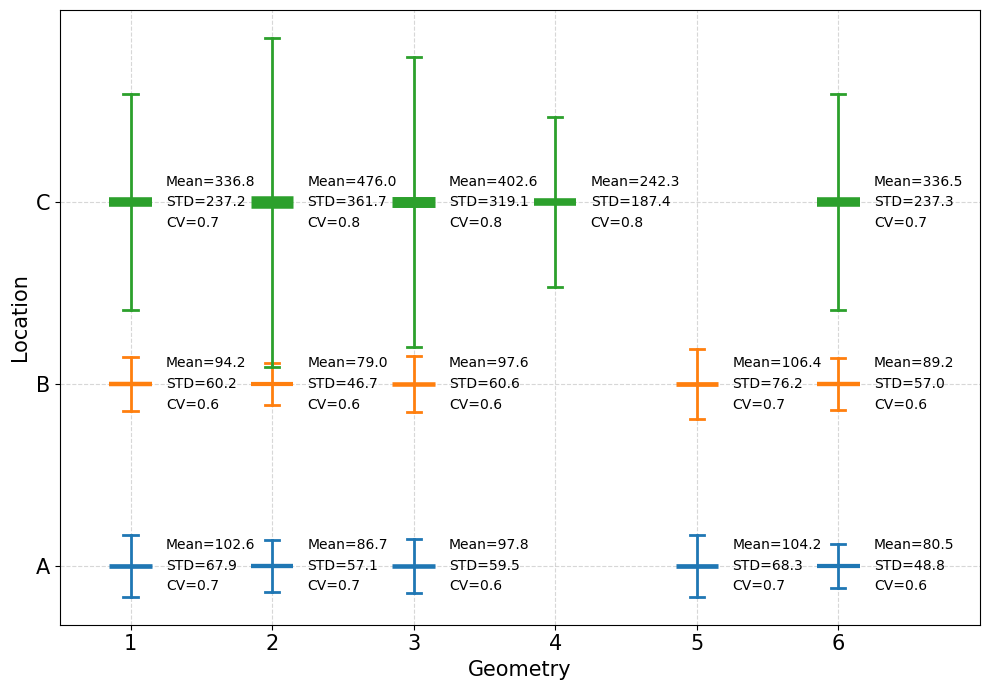

In [193]:

catalogs = {
    ("A", 1): pazar_rcrnc1,
    ("A", 2): pazar_rcrnc2,
    ("A", 3): pazar_rcrnc3,
    ("A", 5): pazar_rcrnc5,
    ("A", 6): pazar_rcrnc6,

    ("B", 1): erken_rcrnc1,
    ("B", 2): erken_rcrnc2,
    ("B", 3): erken_rcrnc3,
    ("B", 5): erken_rcrnc5,
    ("B", 6): erken_rcrnc6,

    ("C", 1): bend_rcrnc1,
    ("C", 2): bend_rcrnc2,
    ("C", 3): bend_rcrnc3,
    ("C", 4): bend_rcrnc4,
    ("C", 6): bend_rcrnc6,
}


location_map = {"A": 1, "B": 3, "C": 5}

# Prepare lists for plotting
geom_list = []
loc_list = []
mean_list = []
std_list = []
cv_list = []

# Calculate stats from arrays
for (loc_label, geom), rec_times in catalogs.items():
    mean_val = np.mean(rec_times)
    std_val = np.std(rec_times)
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    geom_list.append(geom)
    loc_list.append(location_map[loc_label])
    mean_list.append(mean_val)
    std_list.append(std_val)
    cv_list.append(cv_val)

geom_list = np.array(geom_list)
loc_list = np.array(loc_list)
mean_list = np.array(mean_list)
std_list = np.array(std_list)
cv_list = np.array(cv_list)

# Normalize mean values for horizontal line width scaling
mean_min = np.min(mean_list)
mean_max = np.max(mean_list)
mean_norm = (mean_list - mean_min) / (mean_max - mean_min)
line_widths = 3 + mean_norm * 6  # Scale between 3 and 9


fig, ax = plt.subplots(figsize=(10, 7))

# Color map for locations
colors = {1: "tab:blue", 3: "tab:orange", 5: "tab:green"}

for geom, loc, mean_val, std_val, cv_val, lw in zip(geom_list, loc_list, mean_list, std_list, cv_list, line_widths):
    color = colors[loc]
    
    # Horizontal line → mean (thickness based on mean value)
    ax.hlines(loc, geom - 0.15, geom + 0.15, color=color, linewidth=lw)
    
    # T-style error bars (std → scaled for visual purposes)
    scaled_std = std_val / 200  # Scale std to make error bars visually nice
    ax.plot([geom - 0.05, geom + 0.05], [loc + scaled_std, loc + scaled_std], color=color, linewidth=2)
    ax.plot([geom, geom], [loc, loc + scaled_std], color=color, linewidth=2)
    ax.plot([geom - 0.05, geom + 0.05], [loc - scaled_std, loc - scaled_std], color=color, linewidth=2)
    ax.plot([geom, geom], [loc, loc - scaled_std], color=color, linewidth=2)

    # Text → Mean, Std, CV stacked vertically
    ax.text(geom + 0.25, loc, f"Mean={mean_val:.1f}\nSTD={std_val:.1f}\nCV={cv_val:.1f}", 
            fontsize=10, va='center', ha='left', linespacing=1.6)

# Axis settings (no title)
ax.set_xlabel("Geometry", fontsize=15)
ax.set_ylabel("Location", fontsize=15)
ax.set_xticks(np.arange(1, 7))
ax.set_yticks([1, 3, 5])
ax.set_yticklabels(["A", "B", "C"], fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(0.5, 7.0)

plt.tight_layout()
plt.show()
